---

### ${Analisando\ o\ desastre\ natural\ de\ Petrópolis\ com\ os\ dados\ das\ estações\ meteorológicas\ do\ CEMADEN}$

---

**OBJETIVO:** Analisar a precipitação mensal, diária e horária para 2022 para o [Desastre Natural](https://pt.wikipedia.org/wiki/Enchentes_e_deslizamentos_de_terra_em_Petr%C3%B3polis_em_2022) ocorrido em Petrópolis no dia 15 de fevereiro de 2022. Usaremos os dados das estações meteorológicas do CEMADEN.

---


**DADOS DE ENTRADA**: Arquivos mensais de pecipitação registradas pelas estações do Cemaden na cidade de Petrópolis.

- **Tipo do dado:** tabela
- **Formato do dado:** arquivo CSV
- **Nome do arquivo:** data_2022-01.csv
- **Fonte dos dados:** [CEMADEN](http://www2.cemaden.gov.br/mapainterativo/)

---

**DADOS DE SAÍDA:** Mapas e figuras.
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos PNG
- **Imagens geradas:**
    1. Fig1_chuva_por_estacao.png
    2. Fig2_localizacao_estacoes.png
    3. Fig3_localizacao_estacoes_escolhidas.png
    4. Fig4_diario_01_Quitandinha - Geo
    5. Fig5_horario_01_Quitandinha - Geo.png
    6. Fig6_chuvapor_mes_dia_hora.jpg
    7. Fig7_chuvapor_mes_dia_hora_climatologia.jpg



---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação das bibliotecas
1.   Importação das biblotecas
2.   Montando drive
3.   Define o caminho do diretório
4.   Download dos shapefiles
5.   Declara funções
6.   Leitura dos dados
7.   Exploração dos dados
8.   Quantidade de precipitação por estação
9.   Mapa das estações
10.  Precipitação diária para fev/2022 para cada estação
10.  Precipitação horária para 15/02/2022 para cada estação
10.  Precipitação mensal + diária + horária para as estações escolhidas
10.  Precipitação mensal + diária + horária para as estações escolhidas + normal climatológica do INMET (1991-2020)

---
**OBSERVAÇÕES IMPORTANTES**:
1. Inserir o caminho do seu drive

---
**DESENVOLVIDO POR**:
- **Realizado por:** Enrique V. Mattos - 28/01/2022
- **Atualizado por:** Enrique V. Mattos - 18/06/2023


---

# **1° Passo:** Instalando bibliotecas

In [1]:
!pip install -q proplot

!pip uninstall shapely --yes
!pip install shapely cartopy --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached shapely-2.0.1-cp310-cp310-linux_x86_64.whl
--2023-06-18 22:45:50--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6.2K) [text/plain]
Saving to: ‘cartopy_feature_download.py.1’

cartopy_feature_dow 100%[===================>]   6.18K  --.-KB/s    in 0s      

2023-06-18 22:45:50 (54.9 MB/s) - ‘cartopy_feature_download.py.1’ saved [6332/6332]

Feature physical, coastline, 110m length: 134
Feature physical, coastline, 50m length: 1428
Feature

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual do curso.

In [2]:
# Instalando o Salem (usado para mascarar regiões)
!pip install -q rasterio
!pip install -q pyproj
!pip install -q geopandas
!pip install -q salem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.3 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [3]:
import proplot as plot
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import rasterio as rio
import salem
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopy
from geopy import distance

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **3° Passo:** Montando drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório

In [54]:
# diretório da pasta atual
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/'

In [30]:
# cria a pasta de saída com o nome "output", com as subpastas
import os
os.makedirs(f'{dir}output/1_chuva_por_estacao', exist_ok=True)
os.makedirs(f'{dir}output/2_relevo_e_estacoes', exist_ok=True)
os.makedirs(f'{dir}output/3_chuva_por_dia', exist_ok=True)
os.makedirs(f'{dir}output/4_chuva_por_hora', exist_ok=True)
os.makedirs(f'{dir}output/5_chuvapor_mes_dia_hora', exist_ok=True)

# **5° Passo:** Download de informações auxiliares

In [31]:
# Baixando o arquivo shapefile do Brasil
# Os dados de shapefile aqui: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15774-malhas.html?=&t=downloads
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip

# Descomprimindo o arquivo
!unzip -o /content/br_unidades_da_federacao.zip

--2023-06-18 22:50:15--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


# **6° Passo:** Declara função

In [32]:
#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile, cor, espessura_linha):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import matplotlib.pyplot as plt

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor=cor,facecolor='none', linewidth=espessura_linha)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
#aneis = [190]
def evm_plt_aneis_em_geral(aneis, lon_r, lat_r, color):
    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color)

# **PARTE 1:** Leitura e organização do arquivo

##**Leitura da planilha apenas de fevereiro de 2022**

In [33]:
# leitura do arquivo
df = pd.read_csv(f'{dir}input/data_2022-02.csv',
                 delimiter=';',
                 decimal=',')

# elimina colunas desnecessárias
df.drop(columns=['codEstacao'], inplace=True)

# renomeia os nomes das colunas
df = df.rename(columns={'valorMedida': 'chuva',
                        'datahora': 'data',
                        'nomeEstacao':'nome_estacao',
                        'latitude': 'lat',
                        'longitude':'lon'})

# insere a coluna data como DateTime no DataFrame
df['data'] = pd.to_datetime(df['data'])

# seta a coluna data com o index do dataframe
df.set_index('data', inplace=True)

# exibe o novo dataframe na tela
display(df)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 02:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 03:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 04:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
...                         ...  ..                ...        ...        ...   
2022-02-28 19:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 20:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 21:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 22:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 23:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0  
2022-02-01 02:10:00    0.0  
2022-02-01 03:10:00    0.0  
2022-02-01 04:10:00    0.0  
...                    ...  
2022-02-28 19:00:00    0.0  
2022-02-28 20:00:00    0.0  
2022-02-28 21:00:00    0.0  
2022-02-28 22:00:00    0.0  
2022-02-28 23:00:00    0.0  

[20244 rows x 6 columns]

##**Leitura das planilhas do ano de 2022 completo**

In [34]:
# loop dos arquivos mensais
df_list = []
for file in sorted(glob.glob(f'{dir}input/data*.csv')):

    print('PROCESSANDO--->', file)

    # leitura do arquivo
    df1 = pd.read_csv(file, delimiter=';', decimal=',')

    # insere a tabela numa lista
    df_list.append(df1)

# junta todas as tabelas em uma única tabela
df_2022 = pd.concat(df_list, ignore_index=True)

# elimina colunas desnecessárias
df_2022.drop(columns=['codEstacao'], inplace=True)

# renomeia os nomes das colunas
df_2022 = df_2022.rename(columns={'valorMedida': 'chuva',
                                  'datahora': 'data',
                                  'nomeEstacao':'nome_estacao',
                                  'latitude': 'lat',
                                  'longitude':'lon'})

# insere a coluna data como DateTime no DataFrame
df_2022['data'] = pd.to_datetime(df_2022['data'])

# seta a coluna data com o index do dataframe
df_2022.set_index('data', inplace=True)

# exibe o novo dataframe na tela
display(df_2022)

PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-01.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-02.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-03.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-04.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-05.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-06.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-07.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-08.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB/3_ESTACOES_METEOROLOGICAS/input/data_2022-09.csv
PROCESSANDO---> /content/drive/MyDrive/PYHTON/00_GITHUB

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-01-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 00:20:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:00:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:40:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
...                         ...  ..                ...        ...        ...   
2022-12-31 19:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 20:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 21:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 22:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 23:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   

                     chuva  
data                        
2022-01-01 00:10:00    0.0  
2022-01-01 00:20:00    0.2  
2022-01-01 01:00:00    0.2  
2022-01-01 01:10:00    0.2  
2022-01-01 01:40:00    0.2  
...                    ...  
2022-12-31 19:00:00    0.0  
2022-12-31 20:00:00    0.0  
2022-12-31 21:00:00    0.0  
2022-12-31 22:00:00    0.0  
2022-12-31 23:00:00    0.0  

[239176 rows x 6 columns]

# **PARTE 2:** Explorando os dados

In [35]:
df

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 02:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 03:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 04:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
...                         ...  ..                ...        ...        ...   
2022-02-28 19:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 20:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 21:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 22:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-02-28 23:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0  
2022-02-01 02:10:00    0.0  
2022-02-01 03:10:00    0.0  
2022-02-01 04:10:00    0.0  
...                    ...  
2022-02-28 19:00:00    0.0  
2022-02-28 20:00:00    0.0  
2022-02-28 21:00:00    0.0  
2022-02-28 22:00:00    0.0  
2022-02-28 23:00:00    0.0  

[20244 rows x 6 columns]

In [36]:
df['municipio'].unique()

array(['PETRÓPOLIS'], dtype=object)

In [37]:
df['nome_estacao'].unique()

array(['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo',
       'Araras', 'Bingen - Geo', 'Estrada do Cantagalo',
       'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava',
       'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137',
       'Vale do Cuiabá', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio',
       'Estrada da Cachoeira', 'Mosela', 'Vila Rica'], dtype=object)

In [38]:
len(df['nome_estacao'].unique())

21

In [39]:
df['nome_estacao'].value_counts(ascending=False)

CIEP Brizolão 281                 1382
Vale do Cuiabá                    1291
Estrada do Cantagalo              1147
Vila Constância                   1108
Bingen - Geo                      1084
Quitandinha - Geo                 1065
Pedro do Rio                      1059
CIEP Brizolão137                  1049
São Sebastião - Geo               1045
Independência2                    1022
Rua Amazonas/Quitandinha           990
Itaipava                           982
Rua Araruama/Quitandinha           976
Vila Rica                          974
Estrada da Cachoeira               964
Dr. Thouzet - Geo                  743
Araras                             690
Itaipava2                          672
Estrada Petrópolis/Teresópolis     670
Morin                              670
Mosela                             661
Name: nome_estacao, dtype: int64

In [40]:
df.head()

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 02:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 03:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 04:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0  
2022-02-01 02:10:00    0.0  
2022-02-01 03:10:00    0.0  
2022-02-01 04:10:00    0.0

<AxesSubplot:xlabel='nome_estacao'>

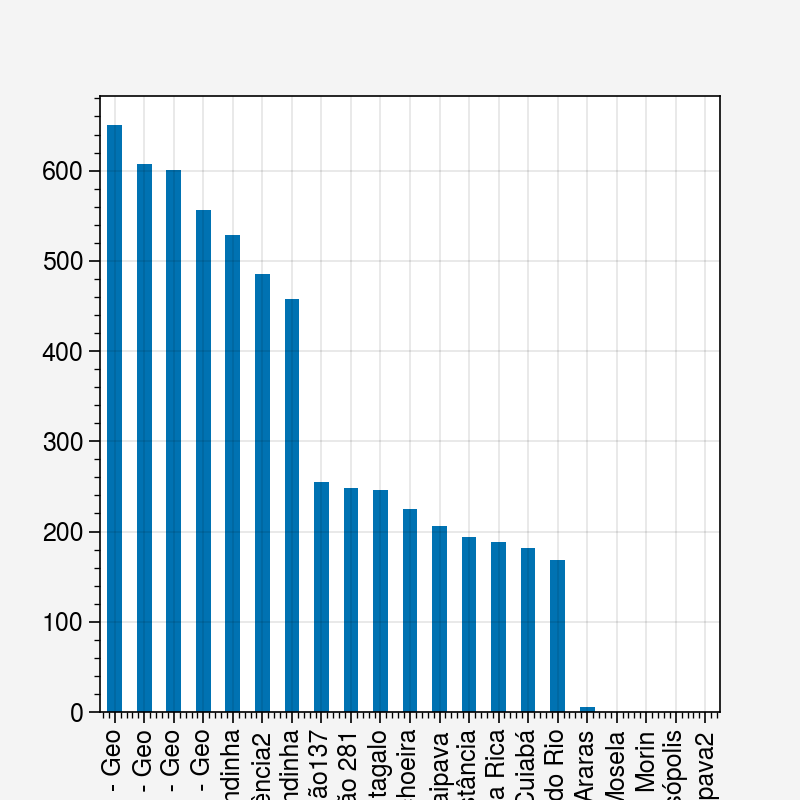

In [41]:
df.groupby('nome_estacao').sum()['chuva'].sort_values(ascending=False).plot.bar(figsize=(4,4))

In [42]:
df.head()

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 02:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 03:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 04:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0  
2022-02-01 02:10:00    0.0  
2022-02-01 03:10:00    0.0  
2022-02-01 04:10:00    0.0

In [43]:
# nome das estações
estacoes = df['nome_estacao'].unique()
estacoes

array(['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo',
       'Araras', 'Bingen - Geo', 'Estrada do Cantagalo',
       'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava',
       'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137',
       'Vale do Cuiabá', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio',
       'Estrada da Cachoeira', 'Mosela', 'Vila Rica'], dtype=object)

In [44]:
# quantidade de estações em funcionamento
qte_estacoes = len(df['nome_estacao'].unique())
qte_estacoes

21

In [45]:
estacoes

array(['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo',
       'Araras', 'Bingen - Geo', 'Estrada do Cantagalo',
       'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava',
       'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137',
       'Vale do Cuiabá', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio',
       'Estrada da Cachoeira', 'Mosela', 'Vila Rica'], dtype=object)

In [46]:
df.head(2)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [47]:
# coloca numa variável as informações das latitudes e longitudes das estações
lat_estacoes, lon_estacoes, nome_estacoes = [], [], []

for estacao in estacoes:

    nome_estacoes.append(estacao)
    lat_estacoes.append( df[df['nome_estacao'] == estacao].iloc[1,3] )
    lon_estacoes.append( df[df['nome_estacao'] == estacao].iloc[1,4] )

print(nome_estacoes)
print(lat_estacoes)
print(lon_estacoes)

['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo', 'Araras', 'Bingen - Geo', 'Estrada do Cantagalo', 'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava', 'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137', 'Vale do Cuiabá', 'Rua Araruama/Quitandinha', 'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio', 'Estrada da Cachoeira', 'Mosela', 'Vila Rica']
[-22.524907, -22.528328, -22.536909, -22.427, -22.51221, -22.374, -22.428, -22.401, -22.388, -22.548, -22.258, -22.454, -22.402, -22.52, -22.529, -22.527, -22.369, -22.335, -22.353, -22.481, -22.349]
[-43.223916, -43.202885, -43.19324, -43.249, -43.209475, -43.046, -43.058, -43.097, -43.132, -43.209, -43.076, -43.143, -43.047, -43.22, -43.223, -43.161, -43.112, -43.134, -43.095, -43.219, -43.132]


# **PARTE 3:** Quantidade de chuva por estação

In [48]:
qte_estacoes = len(df['nome_estacao'].unique())
qte_estacoes

21

In [49]:
df.head(2)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

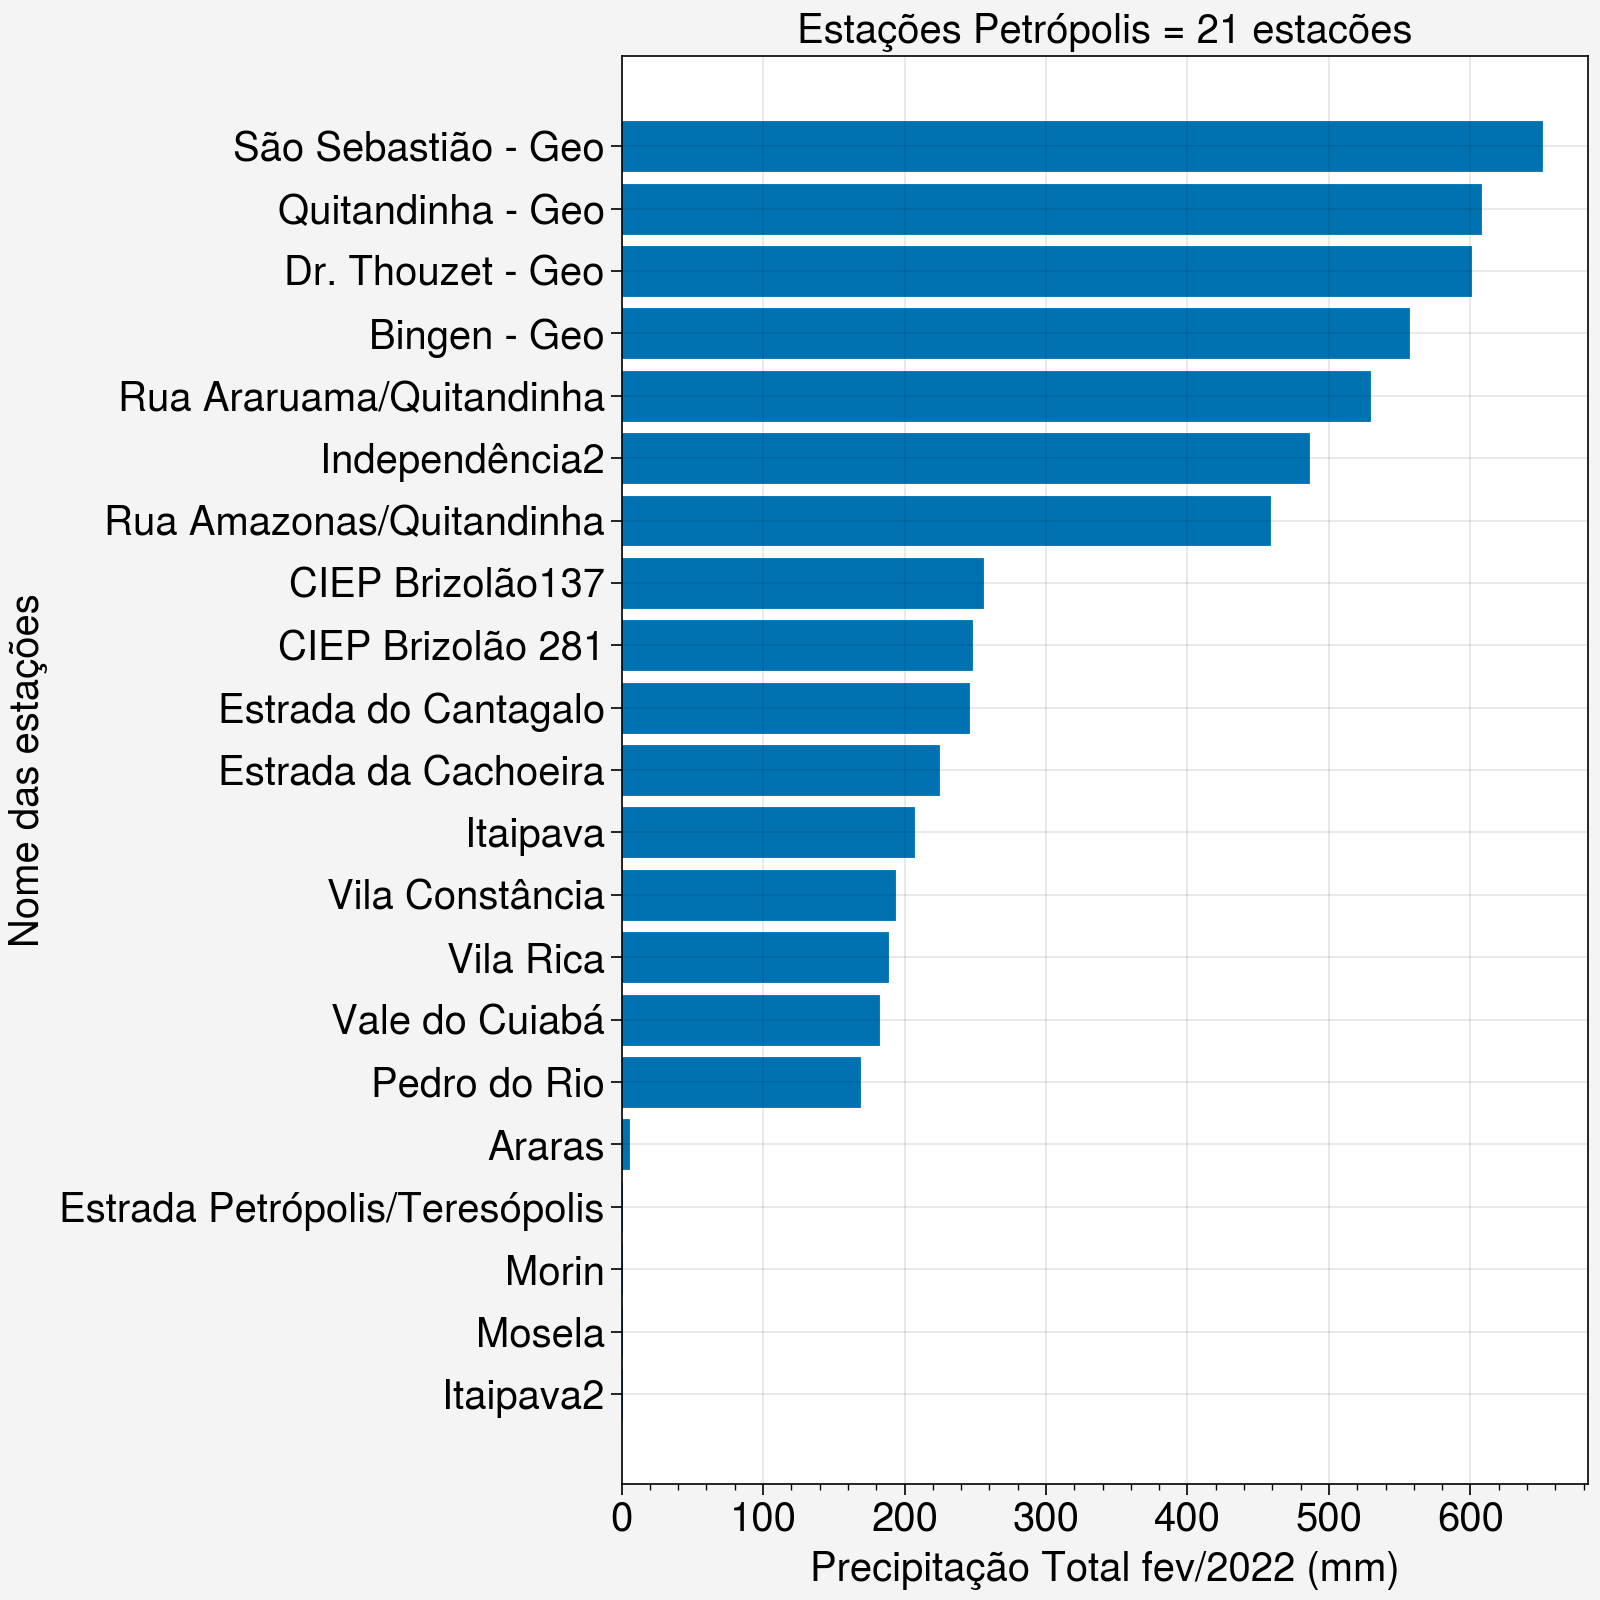

In [50]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(8,8), tight=True)

# plota gráfico de barras
ax.barh(df.groupby('nome_estacao').sum()['chuva'].sort_values(ascending=True))

# formatações
ax.format(title=f'Estações Petrópolis = {qte_estacoes} estacões',
          xrotation=0,
          small='20px',
          large='20px',
          ylabel='Nome das estações',
          xlabel=f'Precipitação Total fev/2022 (mm)')

# salva figura
fig.save(f'{dir}output/1_chuva_por_estacao/Fig1_chuva_por_estacao.png', dpi=300)

# exibe figura na tela
plot.show()

# **PARTE 4:** Mapas das estações

##**Leitura do dado de relevo**

In [79]:
# leitura do dado
filename = f'{dir}input/gebco_2021_n-22.2_s-22.6_w-43.4_e-42.95.tif'

with rio.open(filename) as tif:

    # Limites da imagem
    lonmin, latmin, lonmax, latmax = tif.bounds

    # Informações do arquivo no formato de dicionario dê um print(meta) para ver mais coisas
    meta = tif.meta

    # Resolução do arquivo
    res = tif.res

    #data = tif.indexes
    # Lê a matriz
    data = tif.read(1)

# Mascarando os dados Undef
data = np.where(data < 0, -32767.0, data)
data = np.ma.masked_equal(data, meta['nodata'])

print(lonmin, latmin, lonmax, latmax)

-43.400000000000006 -22.599999999999994 -42.95000000000001 -22.2


##**Plota mapa**: com todas as 21 estações

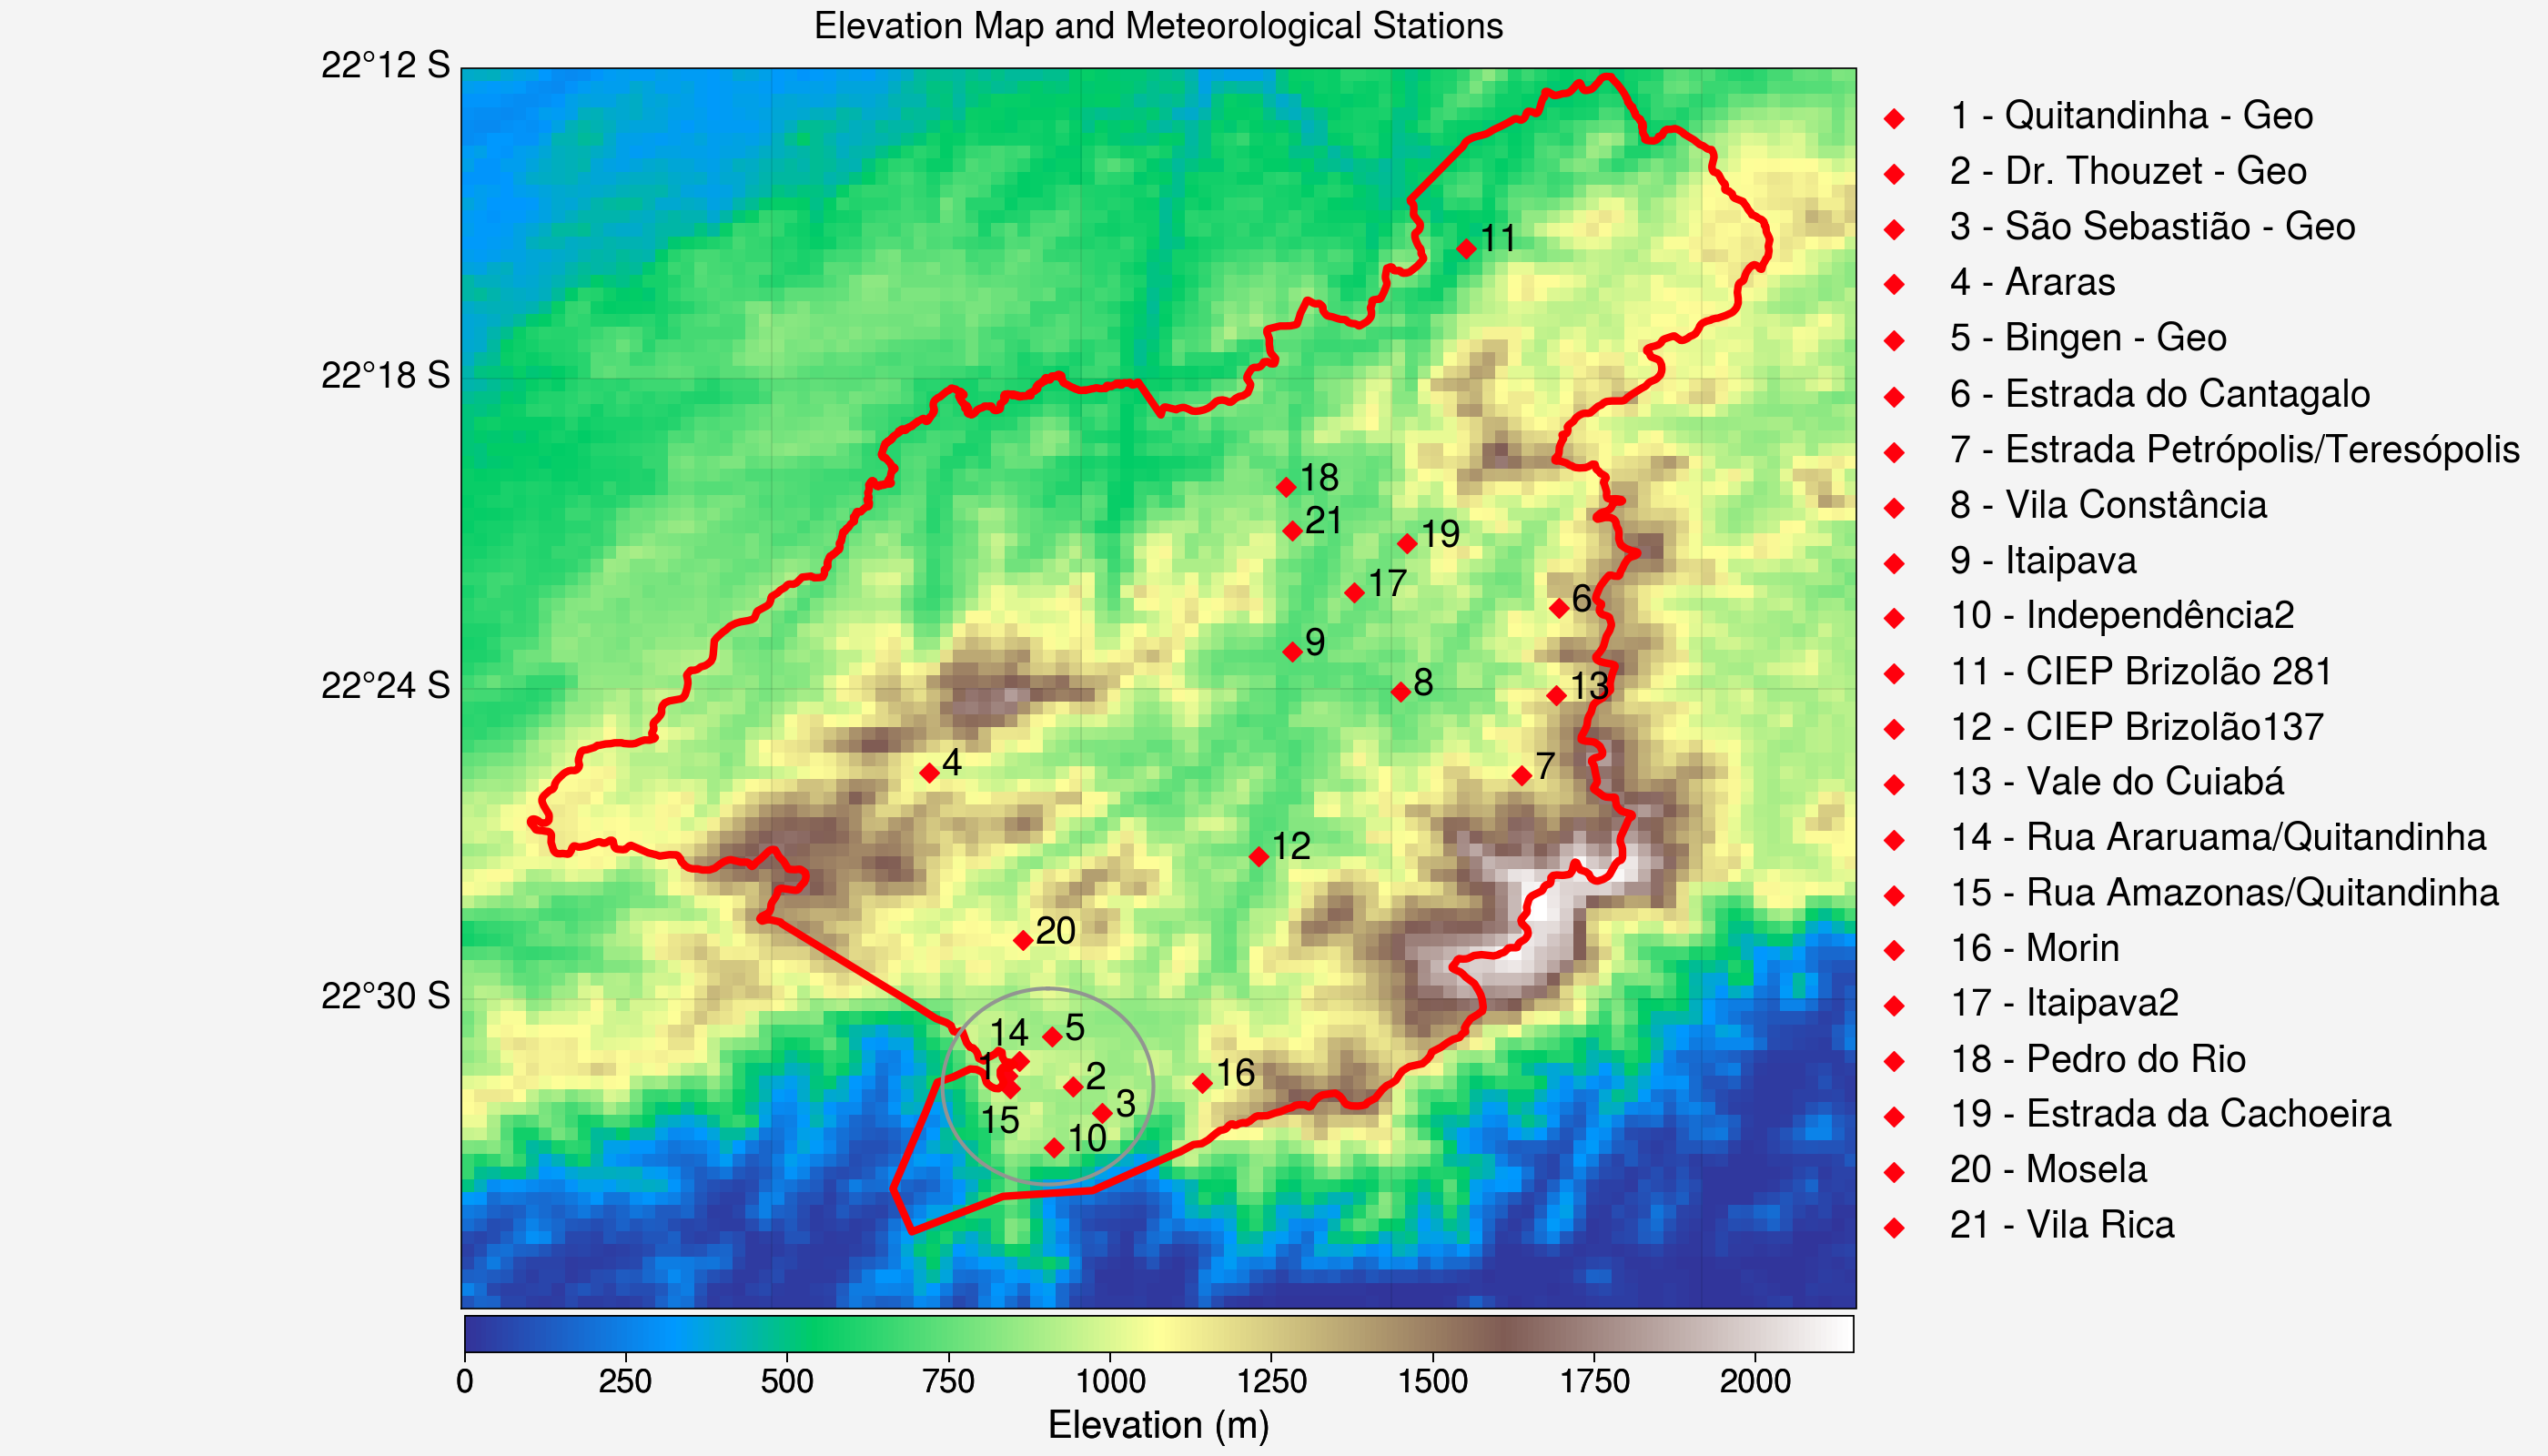

In [80]:
# moldura da figura
fig, ax = plot.subplots(figsize=(14,8), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=0.1, lonlines=0.1,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title=f'Elevation Map and Meteorological Stations',
          small='20px', large='20px')

# plota figura
map1 = ax.imshow(data, extent=[lonmin, lonmax, latmin, latmax], cmap='terrain', vmin=0)

# plota contorno de Petrópolis
evm_plot_states(f'{dir}input/Petrópolis.shp', 'red', 3.0)

# plota localização das estações
i=1
for nome, lat, lon in zip(nome_estacoes, lat_estacoes, lon_estacoes):

    # plota o símbolo da estação
    ax.scatter(lon, lat, transform=ccrs.PlateCarree(), marker='D', s=30, color='bright red', label=f'{i} - {nome}')

    # plota o texto da estação
    if i==1:
       plt.text(lon-0.010, lat-0.001, f'{str(i)}', size=15)
    elif i==14:
       plt.text(lon-0.010, lat+0.005, f'{str(i)}', size=15)
    elif i==15:
       plt.text(lon-0.010, lat-0.014, f'{str(i)}', size=15)
    else:
        plt.text(lon+0.004, lat-0.001, f'{str(i)}', size=15)
    i+=1

# plota circulo nas estacoes com maiores acumulados de chuva (Região Sul de Petrópolis)
latx, lonx = -22.5283, -43.2108
evm_plt_aneis_em_geral([3.5], lonx, latx, 'gray')

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Elevation (m)', ticklabelsize=13, labelsize=15, length=0.605, space=0.3)

# legenda
ax.legend(bbox_to_anchor=(1.49, 0.99), ncols=1, frameon=False, prop={'size': 15})

# salva figura
fig.save(f'{dir}output/2_relevo_e_estacoes/Fig2_localizacao_estacoes.png', dpi=300)

# exibe na tela
plot.show()

##**Plota mapa**: com apenas as 7 melhores estações

In [81]:
df_15 = df['2022-02-15 00:00:00' :'2022-02-15 23:00:00']
df_15.head()

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-15 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-15 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-15 02:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-15 03:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-15 04:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-15 00:10:00    0.0  
2022-02-15 01:10:00    0.0  
2022-02-15 02:10:00    0.0  
2022-02-15 03:10:00    0.0  
2022-02-15 04:10:00    0.0

In [82]:
df_15.tail()

municipio  uf nome_estacao     lat     lon  chuva
data                                                                   
2022-02-15 19:00:00  PETRÓPOLIS  RJ    Vila Rica -22.349 -43.132    0.0
2022-02-15 20:00:00  PETRÓPOLIS  RJ    Vila Rica -22.349 -43.132    0.0
2022-02-15 21:00:00  PETRÓPOLIS  RJ    Vila Rica -22.349 -43.132    0.0
2022-02-15 22:00:00  PETRÓPOLIS  RJ    Vila Rica -22.349 -43.132    0.0
2022-02-15 23:00:00  PETRÓPOLIS  RJ    Vila Rica -22.349 -43.132    0.0

In [83]:
df.head(2)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [84]:
# quantidade de chuva para as 7 estações no dia 15/fev/2022
chuva_dia_15 = df_15.groupby('nome_estacao').sum()['chuva'].sort_values(ascending=False)[0:7]

In [85]:
chuva_dia_15.index

Index(['São Sebastião - Geo', 'Dr. Thouzet - Geo', 'Independência2',
       'Quitandinha - Geo', 'Bingen - Geo', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha'],
      dtype='object', name='nome_estacao')

In [86]:
lista_chuva_dia_15 = list(chuva_dia_15.values)
lista_chuva_dia_15

[260.0, 220.6, 148.03, 142.8, 141.6, 133.9, 111.2]

In [87]:
nome_estacoes

['Quitandinha - Geo',
 'Dr. Thouzet - Geo',
 'São Sebastião - Geo',
 'Araras',
 'Bingen - Geo',
 'Estrada do Cantagalo',
 'Estrada Petrópolis/Teresópolis',
 'Vila Constância',
 'Itaipava',
 'Independência2',
 'CIEP Brizolão 281',
 'CIEP Brizolão137',
 'Vale do Cuiabá',
 'Rua Araruama/Quitandinha',
 'Rua Amazonas/Quitandinha',
 'Morin',
 'Itaipava2',
 'Pedro do Rio',
 'Estrada da Cachoeira',
 'Mosela',
 'Vila Rica']

In [88]:
len(nome_estacoes)

21

In [89]:
# coloca numa variável as latitudes e longitudes das estações escolhidas
# são as 7 estações que tiveram mais chuva
nome_estacoes_escolhidas = ['São Sebastião - Geo',
                            'Quitandinha - Geo',
                            'Dr. Thouzet - Geo',
                            'Bingen - Geo',
                            'Rua Araruama/Quitandinha',
                            'Independência2',
                            'Rua Amazonas/Quitandinha']

lat_estacoes_escolhidas, lon_estacoes_escolhidas = [],[]
for estacao_escolhida in nome_estacoes_escolhidas:
    posicao = nome_estacoes.index(estacao_escolhida)
    lat_estacoes_escolhidas.append(lat_estacoes[posicao])
    lon_estacoes_escolhidas.append(lon_estacoes[posicao])

# exibe na tela
print(nome_estacoes_escolhidas)
print(lat_estacoes_escolhidas)
print(lon_estacoes_escolhidas)

['São Sebastião - Geo', 'Quitandinha - Geo', 'Dr. Thouzet - Geo', 'Bingen - Geo', 'Rua Araruama/Quitandinha', 'Independência2', 'Rua Amazonas/Quitandinha']
[-22.536909, -22.524907, -22.528328, -22.51221, -22.52, -22.548, -22.529]
[-43.19324, -43.223916, -43.202885, -43.209475, -43.22, -43.209, -43.223]


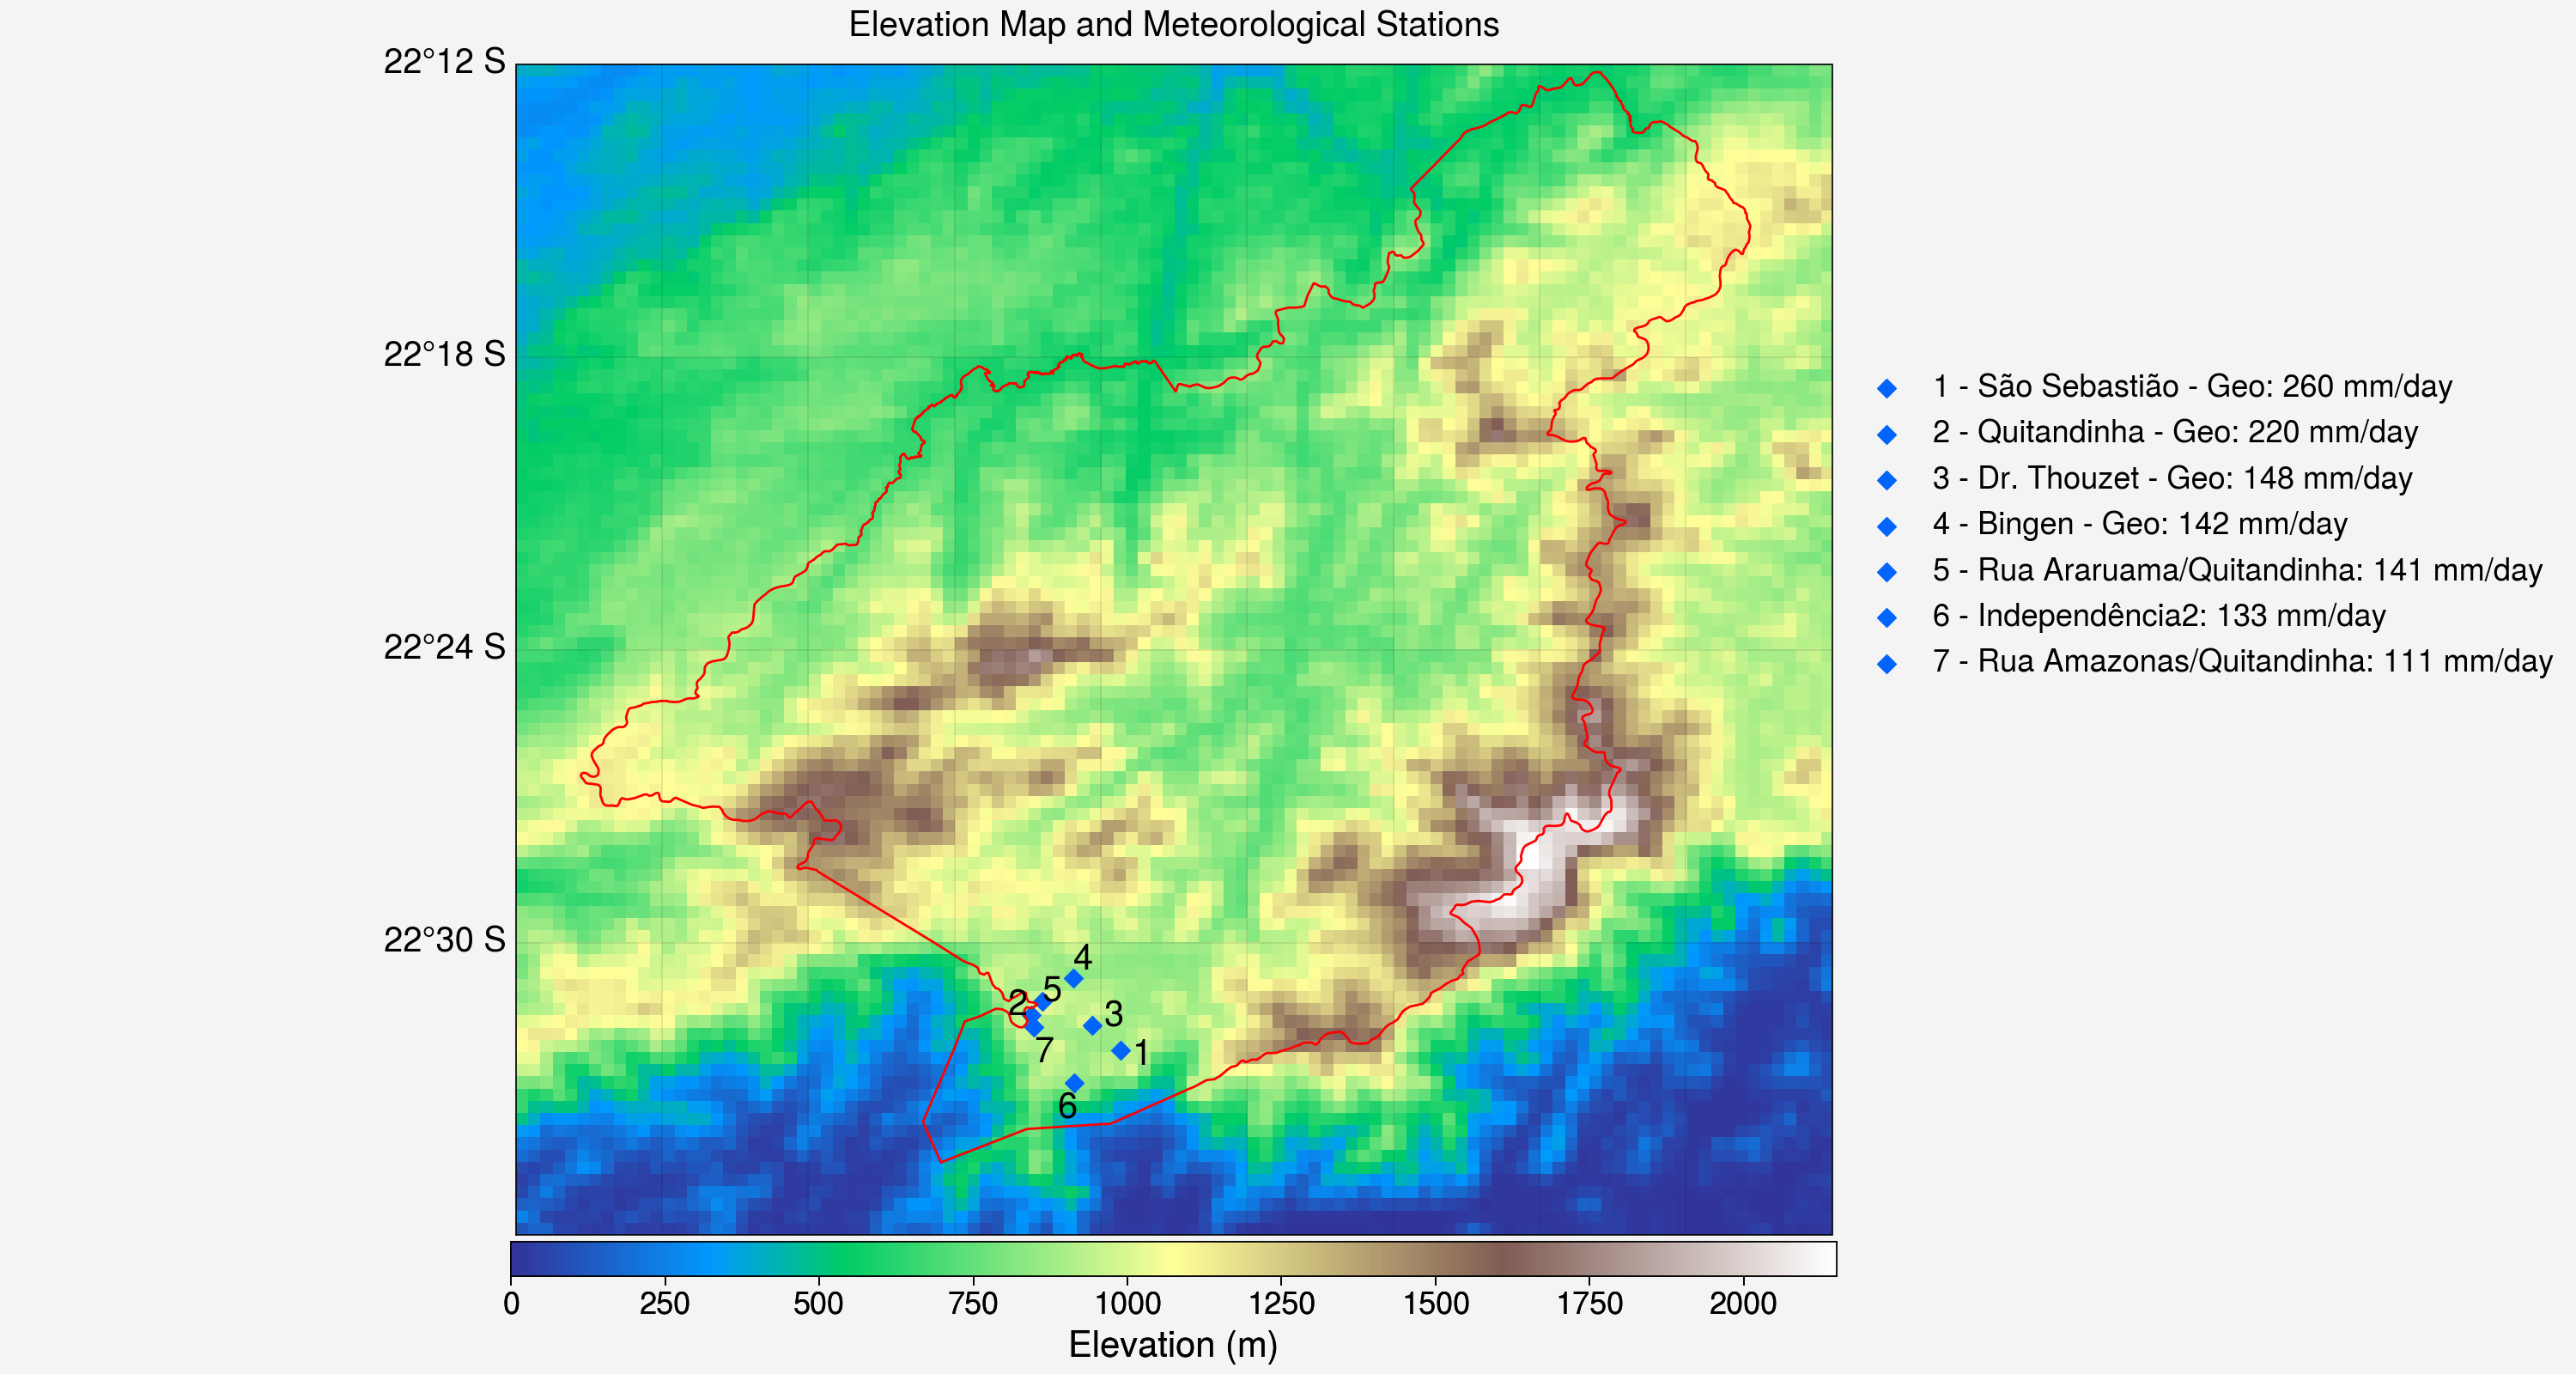

In [90]:
# moldura da figura
fig, ax = plot.subplots(figsize=(15,8), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=0.1,
          lonlines=0.05,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          title=f'Elevation Map and Meteorological Stations',
          small='20px',
          large='20px')

# plota figura
map1 = ax.imshow(data, extent=[lonmin, lonmax, latmin, latmax], cmap='terrain', vmin=0)

# plota contornos de Petrópolis
evm_plot_states(f'{dir}input/Petrópolis.shp', 'red', 1.0)

# plota localização das estações
i=1
for nome, lat, lon, chuva_15 in zip(nome_estacoes_escolhidas, lat_estacoes_escolhidas, lon_estacoes_escolhidas, lista_chuva_dia_15):

    # plota o símbolo da estação
    ax.scatter(lon, lat, transform=ccrs.PlateCarree(), marker='D', s=30, color='bright blue', label=f'{i} - {nome}: {int(chuva_15)} mm/day')

    # plota o texto da estação
    if i==1:
       plt.text(lon+0.004, lat-0.005, f'{str(i)}', size=15)
    elif i==2:
       plt.text(lon-0.008, lat+0.00, f'{str(i)}', size=15)
    elif i==3:
       plt.text(lon+0.004, lat+0.00, f'{str(i)}', size=15)
    elif i==4:
       plt.text(lon-0.000, lat+0.003, f'{str(i)}', size=15)
    elif i==5:
       plt.text(lon-0.000, lat+0.000, f'{str(i)}', size=15)
    elif i==6:
       plt.text(lon-0.006, lat-0.012, f'{str(i)}', size=15)
    elif i==7:
       plt.text(lon+0.000, lat-0.012, f'{str(i)}', size=15)
    i+=1

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Elevation (m)', ticklabelsize=13, labelsize=15, length=0.57, space=0.3)

# legenda
ax.legend(bbox_to_anchor=(1.56, 0.75), ncols=1, frameon=False, prop={'size': 13})

# salva figura
fig.save(f'{dir}output/2_relevo_e_estacoes/Fig3_localizacao_estacoes_escolhidas.png', dpi=300)

# exibe na tela
plot.show()

# **PARTE 5:** Gráfico diário

In [91]:
df.head(2)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [92]:
df['nome_estacao'].unique()

array(['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo',
       'Araras', 'Bingen - Geo', 'Estrada do Cantagalo',
       'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava',
       'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137',
       'Vale do Cuiabá', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio',
       'Estrada da Cachoeira', 'Mosela', 'Vila Rica'], dtype=object)

In [93]:
df_estacao = df[ df['nome_estacao'] == 'São Sebastião - Geo']
df_estacao.head(2)

municipio  uf         nome_estacao        lat       lon  \
data                                                                            
2022-02-01 00:10:00  PETRÓPOLIS  RJ  São Sebastião - Geo -22.536909 -43.19324   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  São Sebastião - Geo -22.536909 -43.19324   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [94]:
df_estacao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1045 entries, 2022-02-01 00:10:00 to 2022-02-28 23:10:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   municipio     1045 non-null   object 
 1   uf            1045 non-null   object 
 2   nome_estacao  1045 non-null   object 
 3   lat           1045 non-null   float64
 4   lon           1045 non-null   float64
 5   chuva         1045 non-null   float64
dtypes: float64(3), object(3)
memory usage: 57.1+ KB


In [95]:
df_estacao.head(2)

municipio  uf         nome_estacao        lat       lon  \
data                                                                            
2022-02-01 00:10:00  PETRÓPOLIS  RJ  São Sebastião - Geo -22.536909 -43.19324   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  São Sebastião - Geo -22.536909 -43.19324   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [96]:
df_estacao['chuva'].groupby(pd.Grouper(freq='1D')).sum()

data
2022-02-01     33.0
2022-02-02     43.2
2022-02-03     37.6
2022-02-04      0.0
2022-02-05     18.6
2022-02-06     38.4
2022-02-07     31.8
2022-02-08     42.4
2022-02-09     19.6
2022-02-10     23.0
2022-02-11      4.0
2022-02-12     11.0
2022-02-13      0.8
2022-02-14      1.8
2022-02-15    260.0
2022-02-16      0.2
2022-02-17     38.2
2022-02-18     18.0
2022-02-19     14.6
2022-02-20      4.8
2022-02-21      5.8
2022-02-22      0.4
2022-02-23      3.0
2022-02-24      0.0
2022-02-25      0.0
2022-02-26      0.0
2022-02-27      0.0
2022-02-28      0.0
Freq: D, Name: chuva, dtype: float64

In [97]:
df.head(2)

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-02-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-02-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   

                     chuva  
data                        
2022-02-01 00:10:00    0.0  
2022-02-01 01:10:00    0.0

In [98]:
estacoes

array(['Quitandinha - Geo', 'Dr. Thouzet - Geo', 'São Sebastião - Geo',
       'Araras', 'Bingen - Geo', 'Estrada do Cantagalo',
       'Estrada Petrópolis/Teresópolis', 'Vila Constância', 'Itaipava',
       'Independência2', 'CIEP Brizolão 281', 'CIEP Brizolão137',
       'Vale do Cuiabá', 'Rua Araruama/Quitandinha',
       'Rua Amazonas/Quitandinha', 'Morin', 'Itaipava2', 'Pedro do Rio',
       'Estrada da Cachoeira', 'Mosela', 'Vila Rica'], dtype=object)

PROCESSANDO--> Quitandinha - Geo


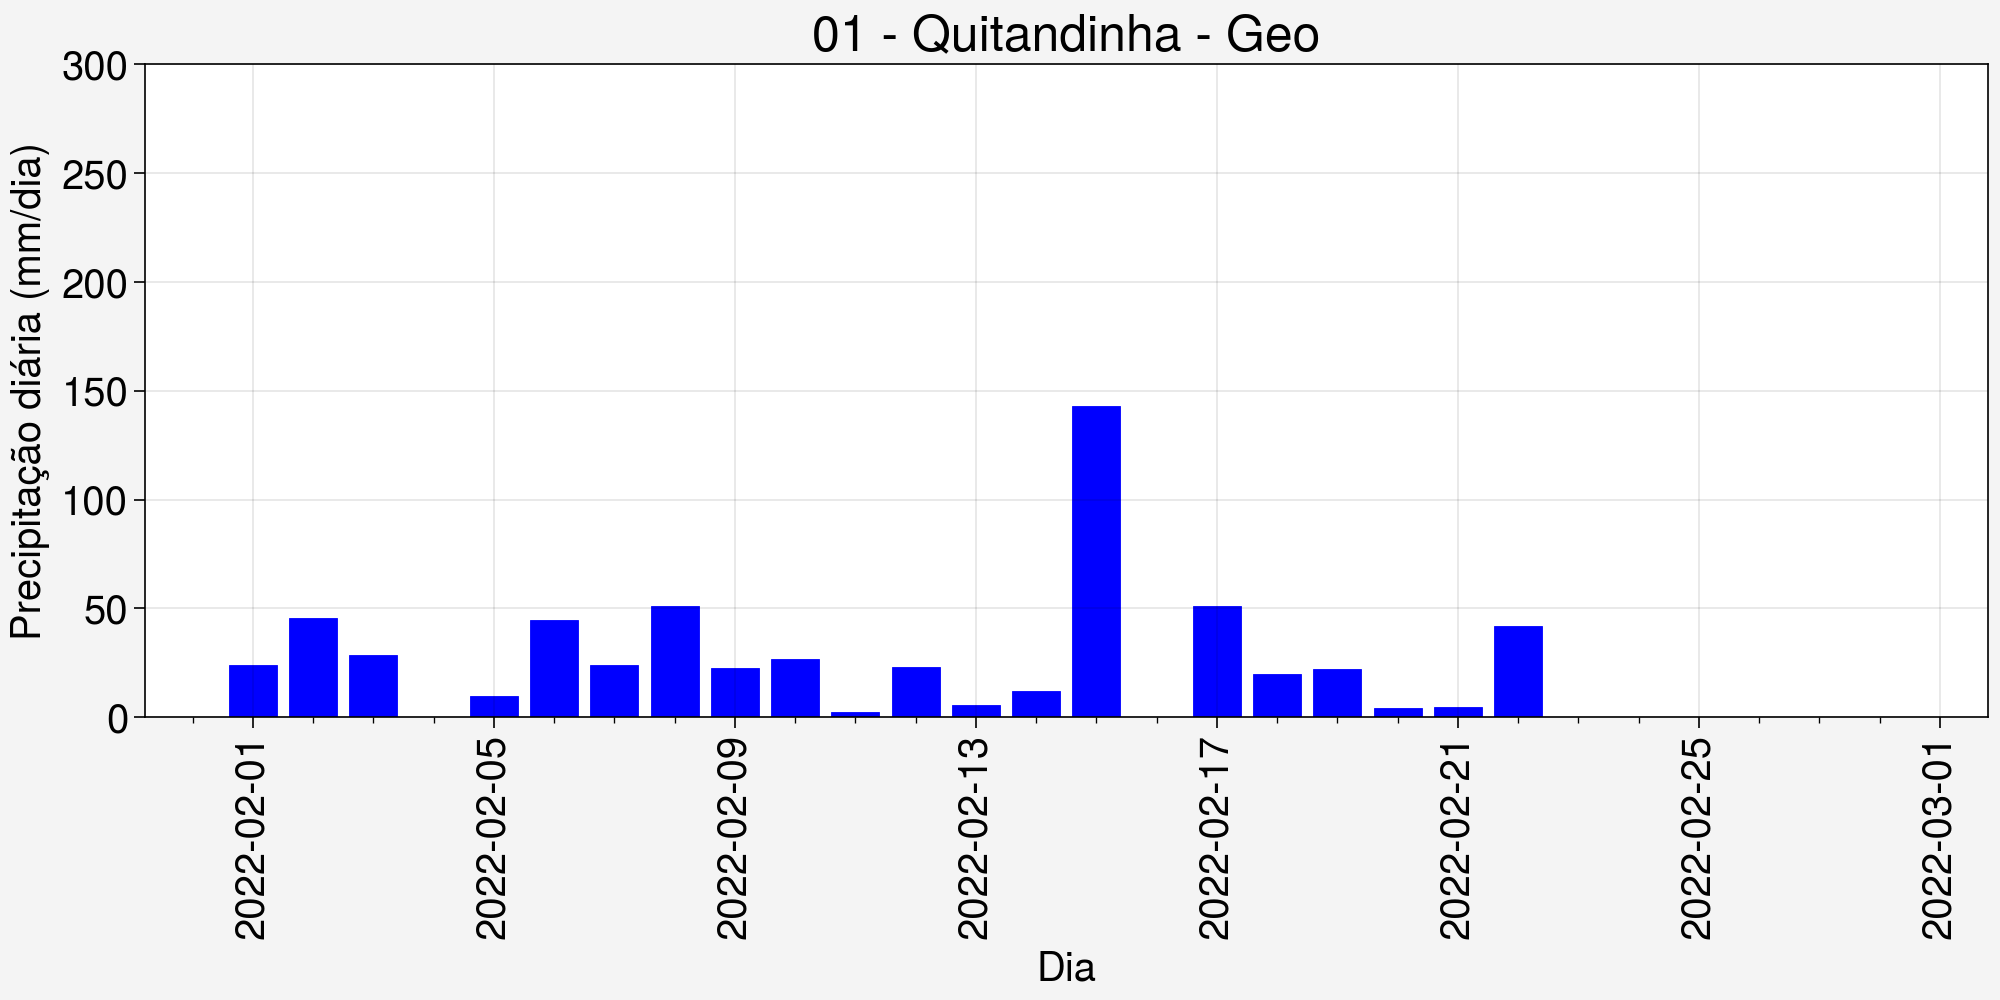

PROCESSANDO--> Dr. Thouzet - Geo


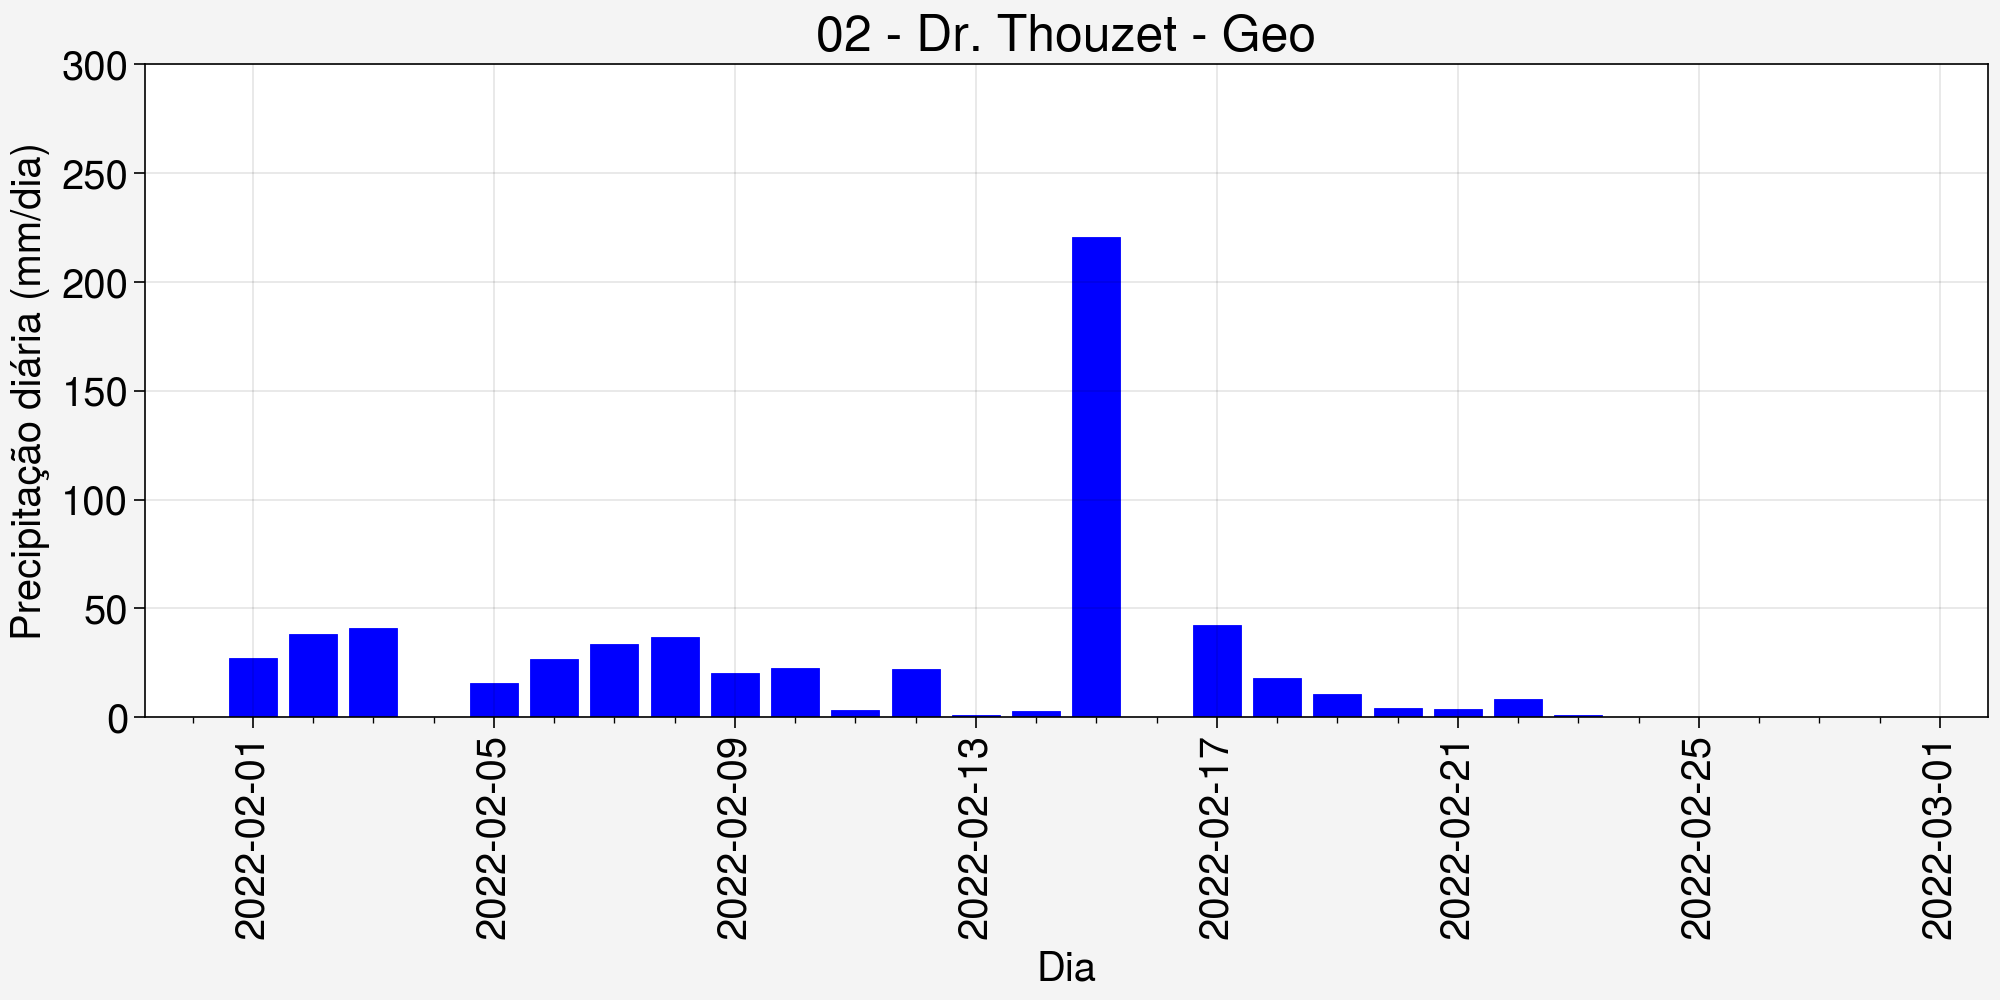

PROCESSANDO--> São Sebastião - Geo


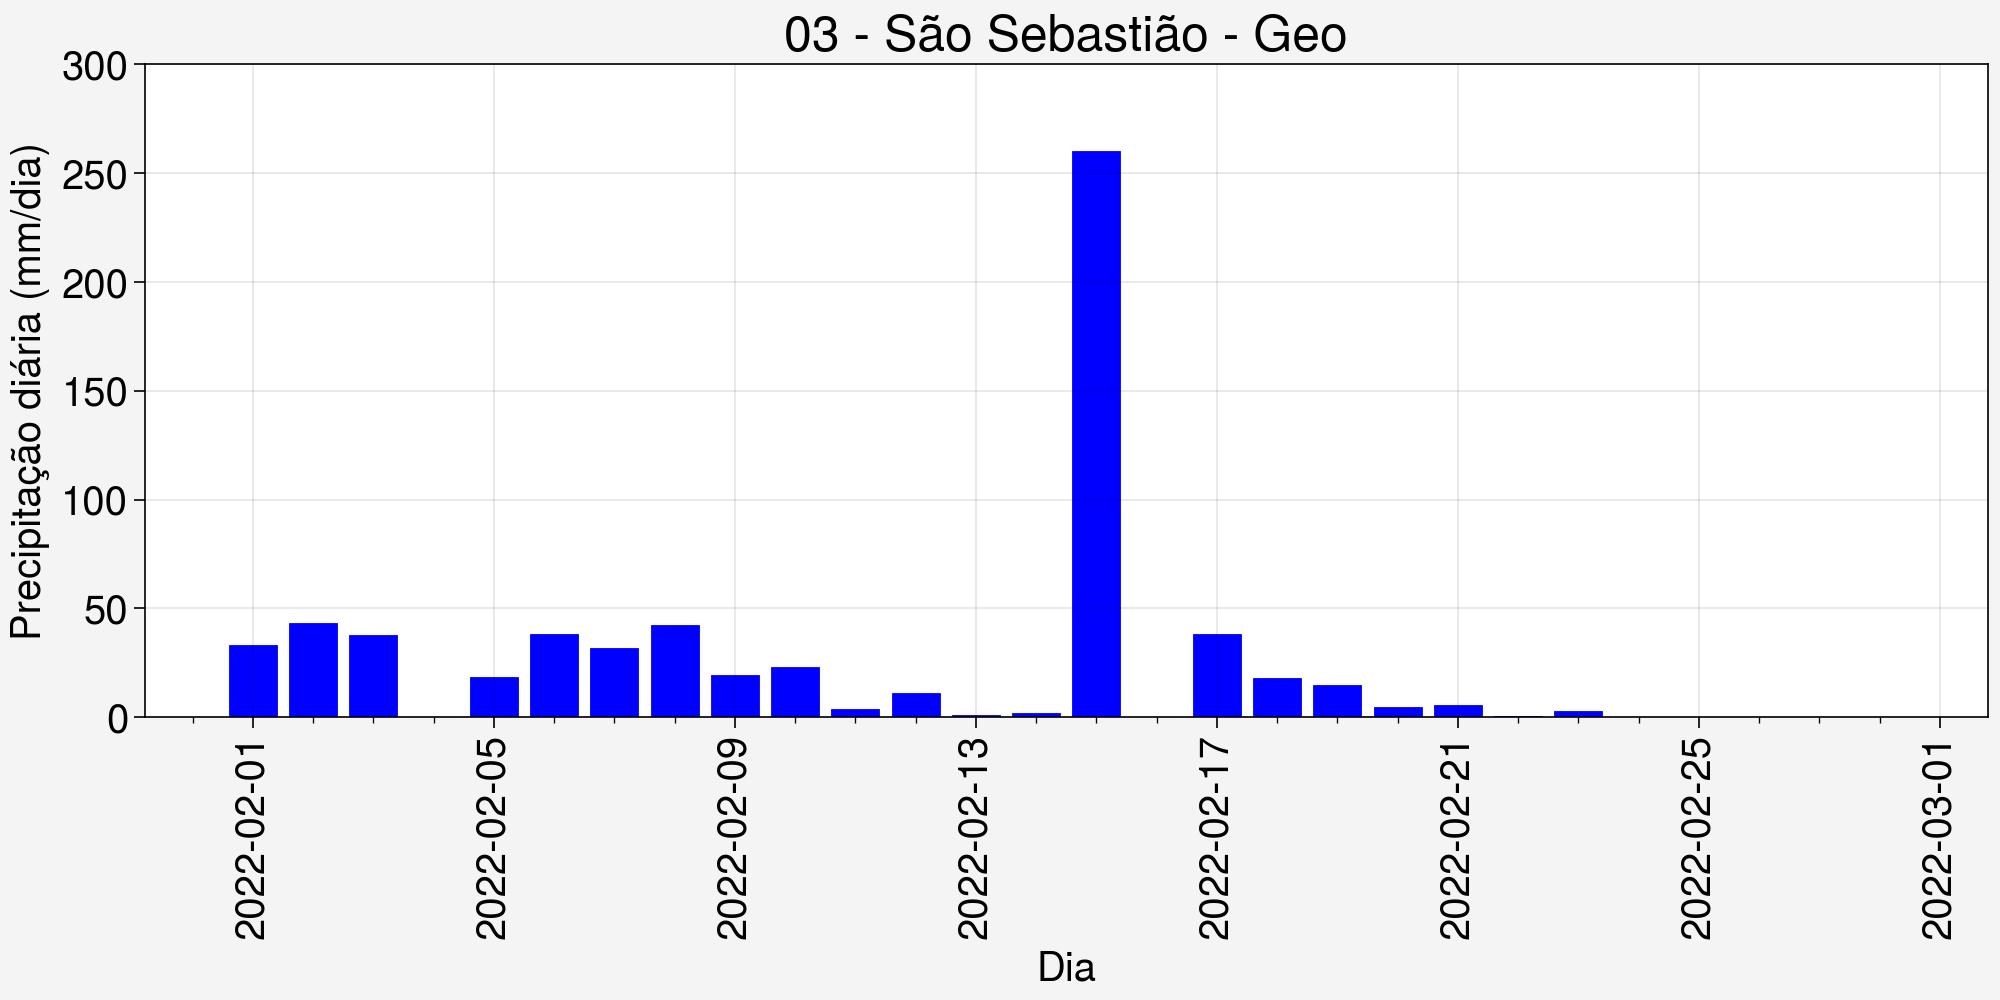

PROCESSANDO--> Araras


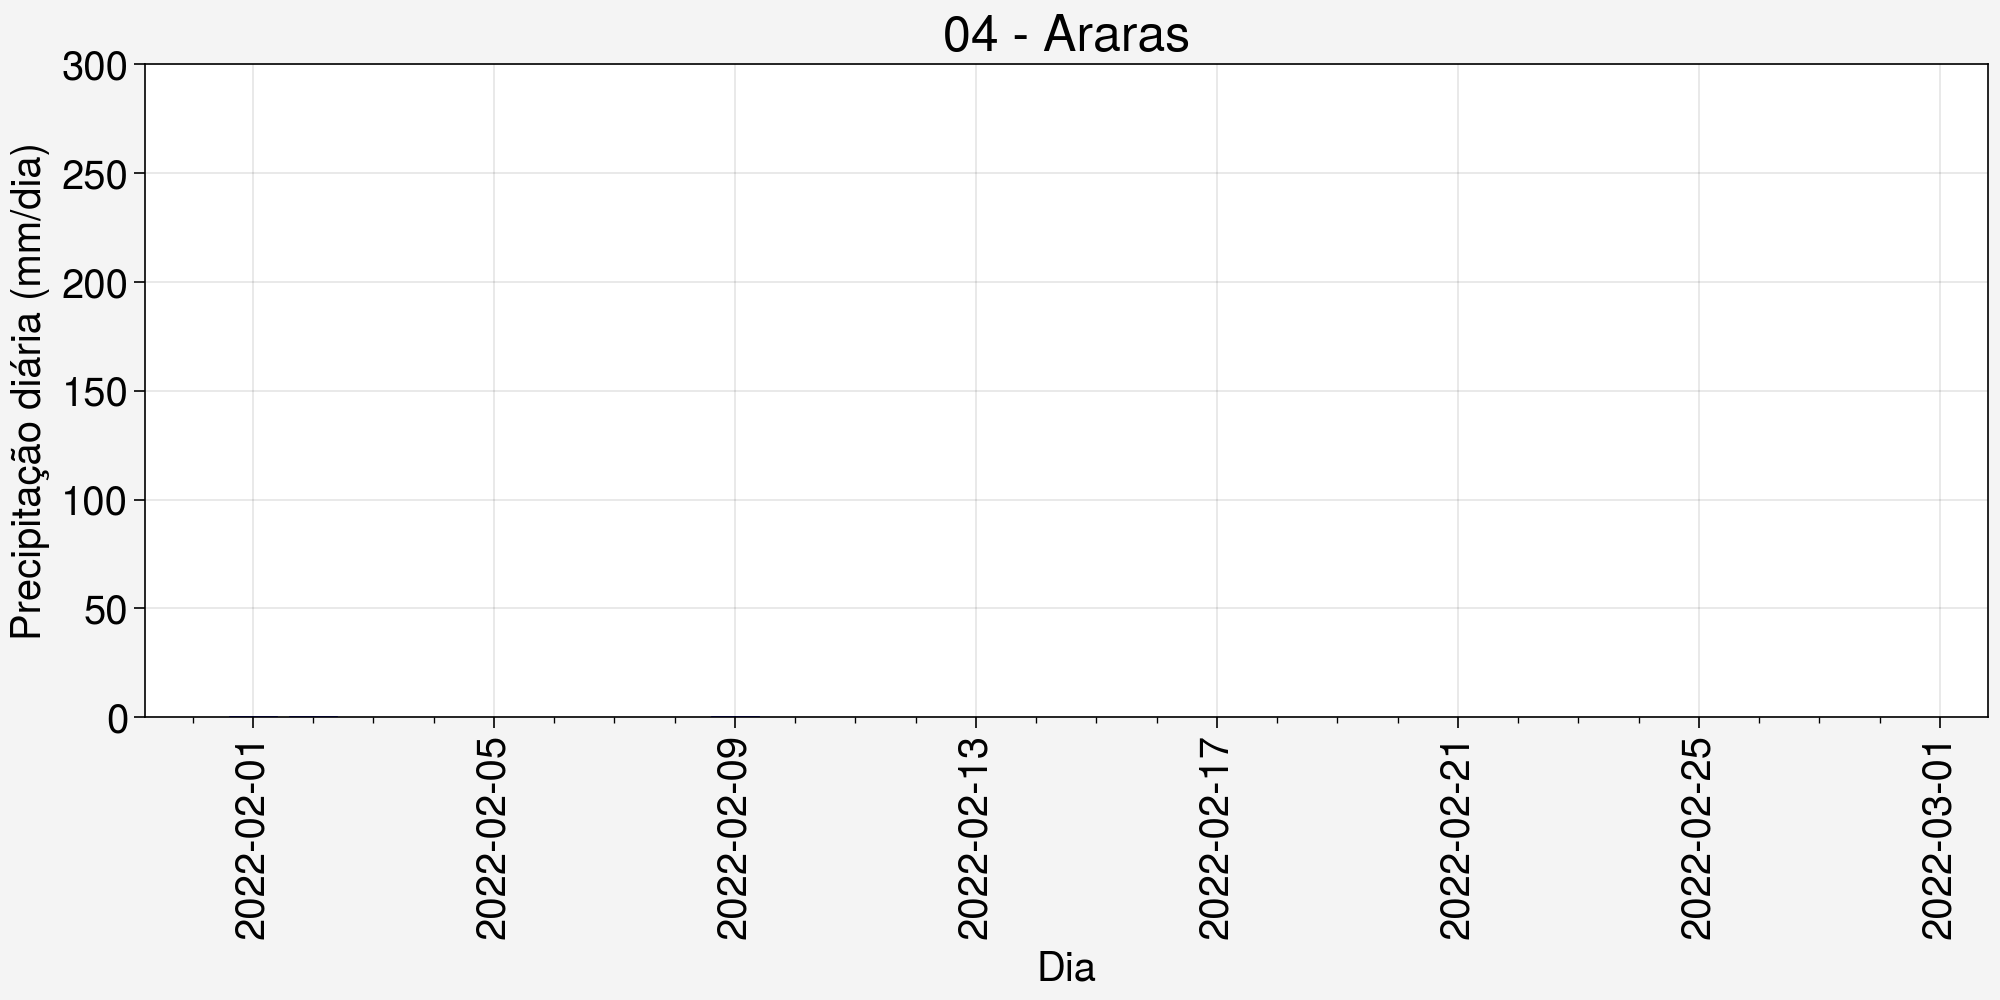

PROCESSANDO--> Bingen - Geo


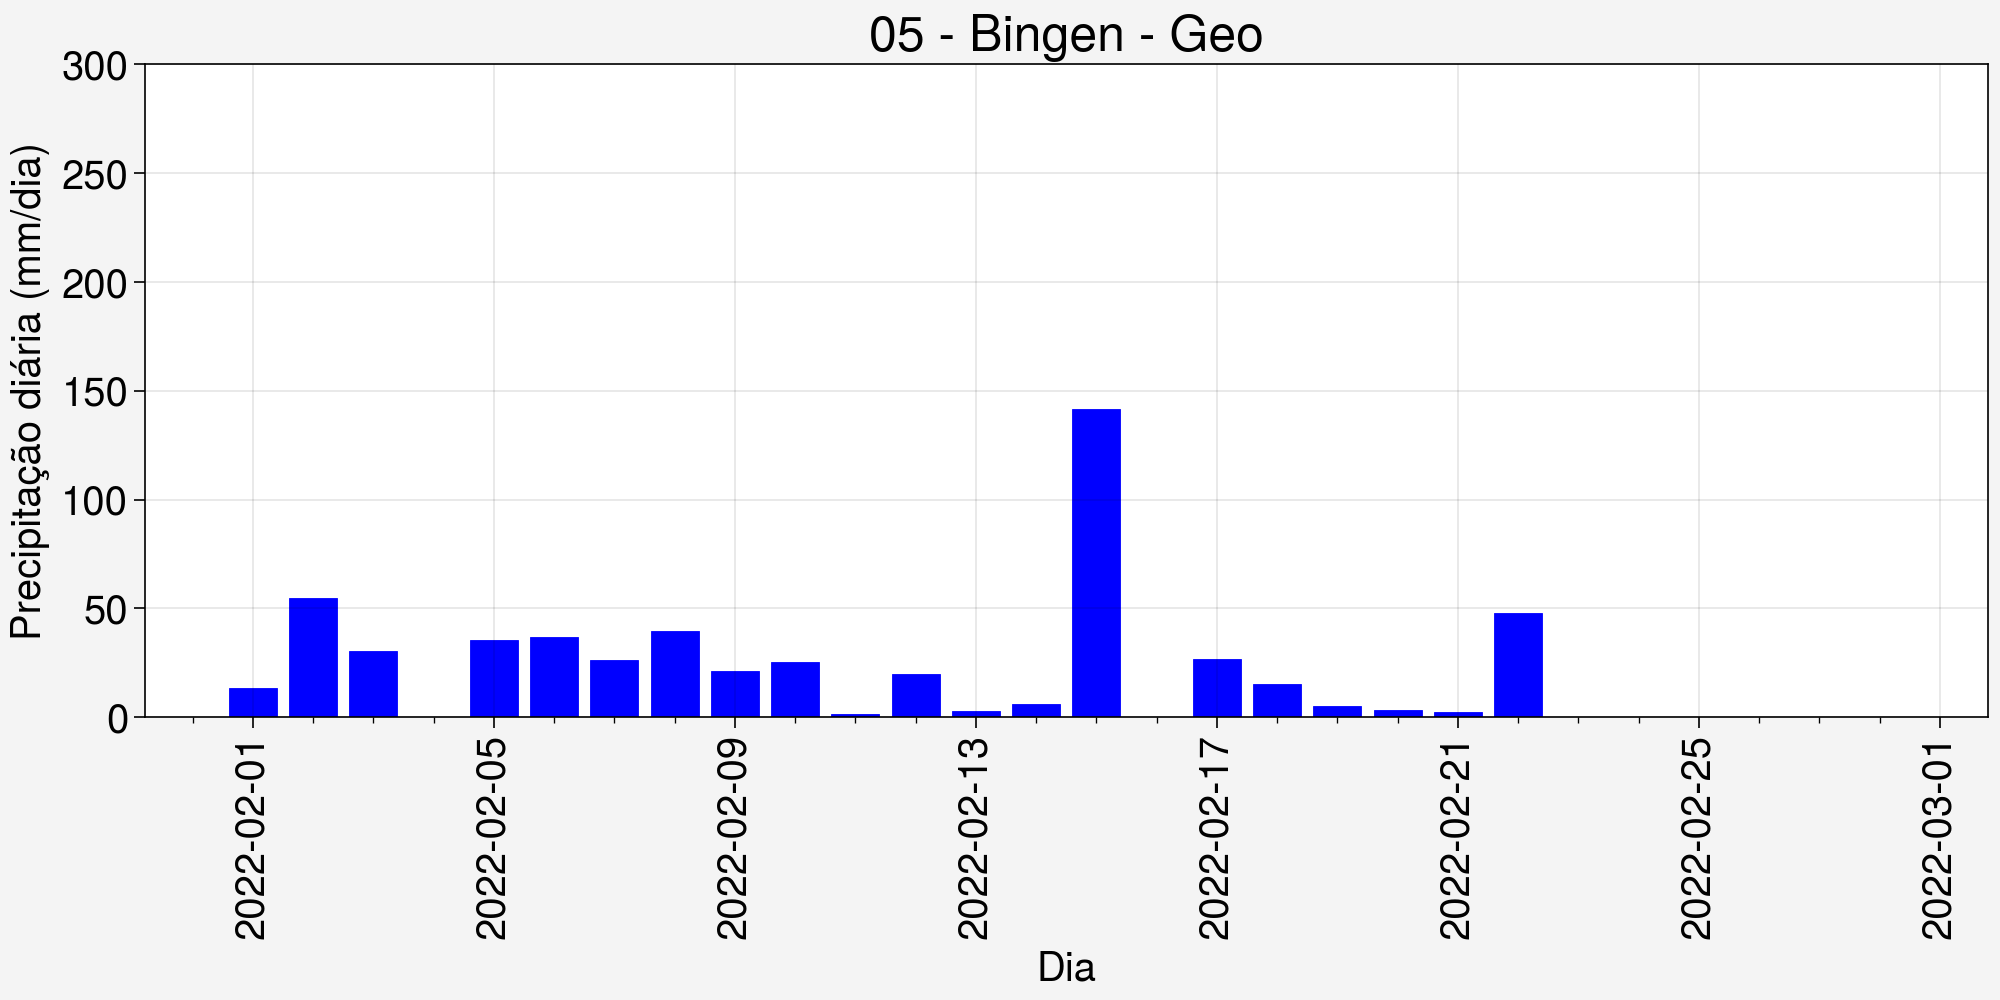

PROCESSANDO--> Estrada do Cantagalo


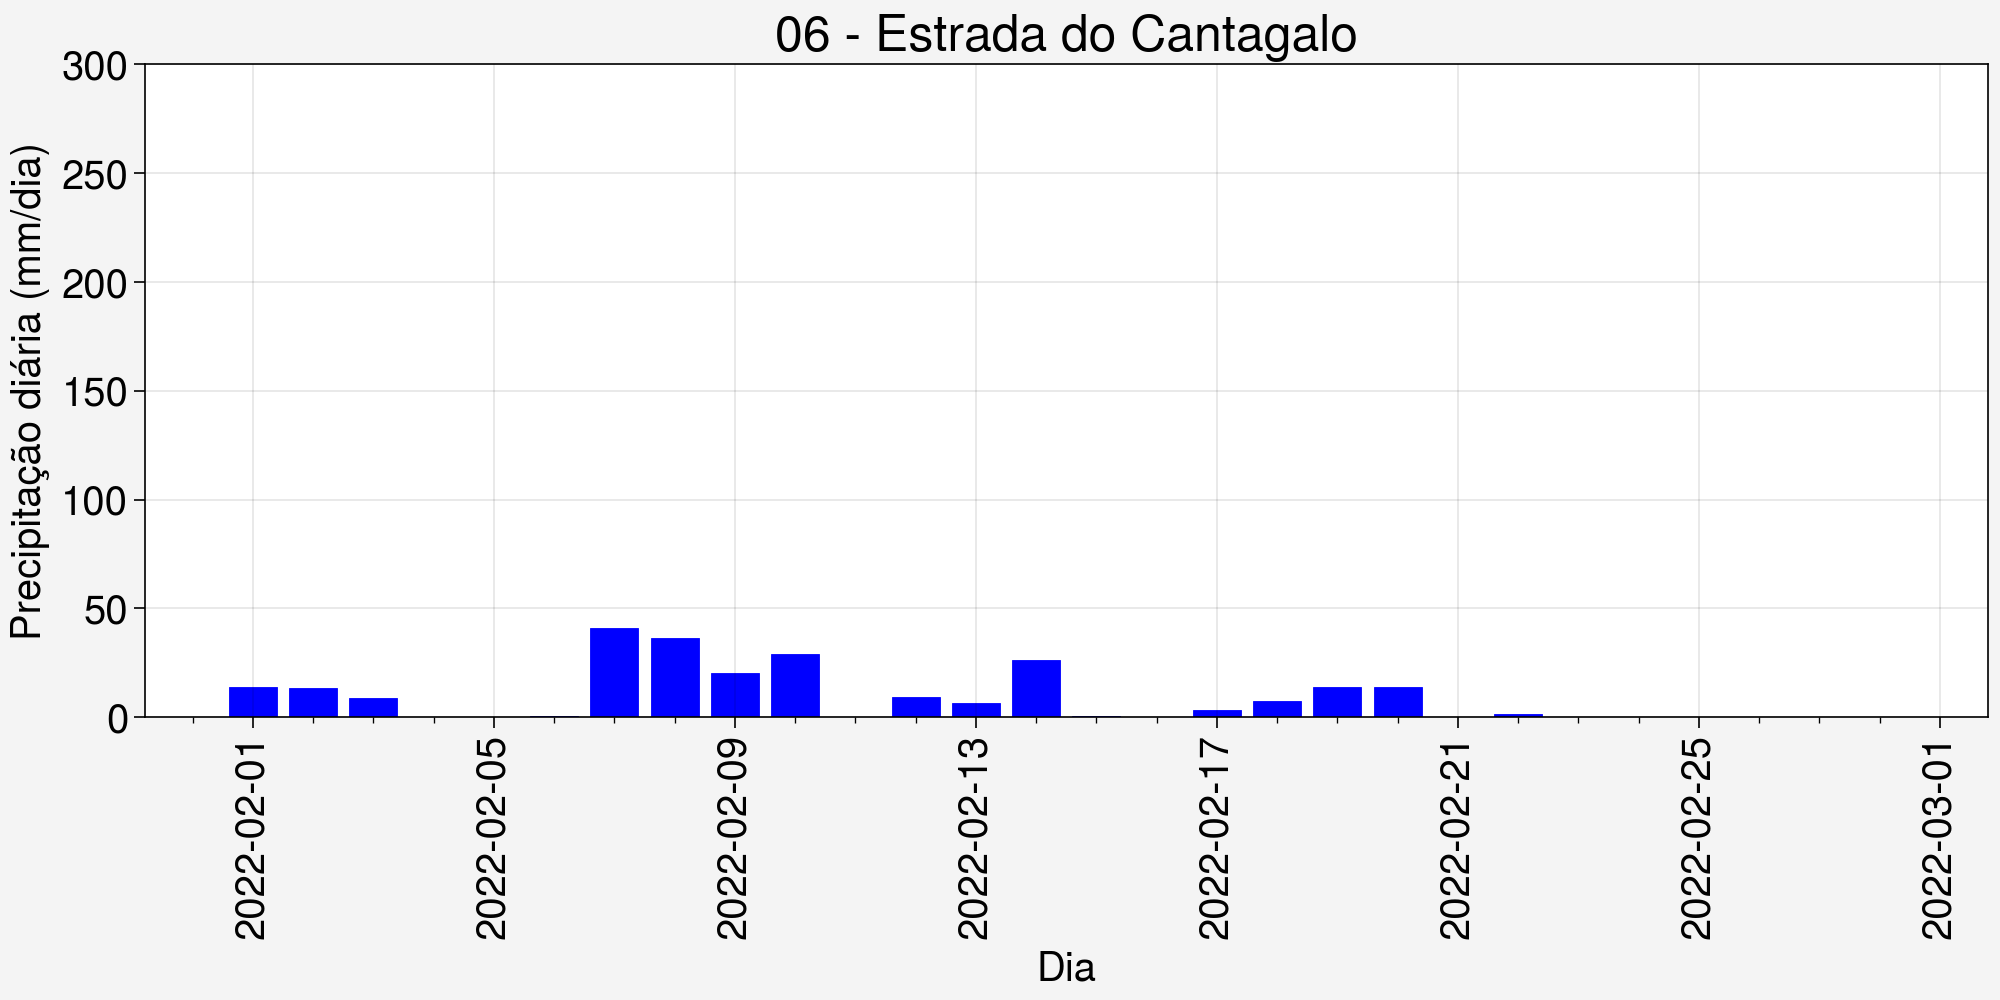

PROCESSANDO--> Estrada Petrópolis/Teresópolis


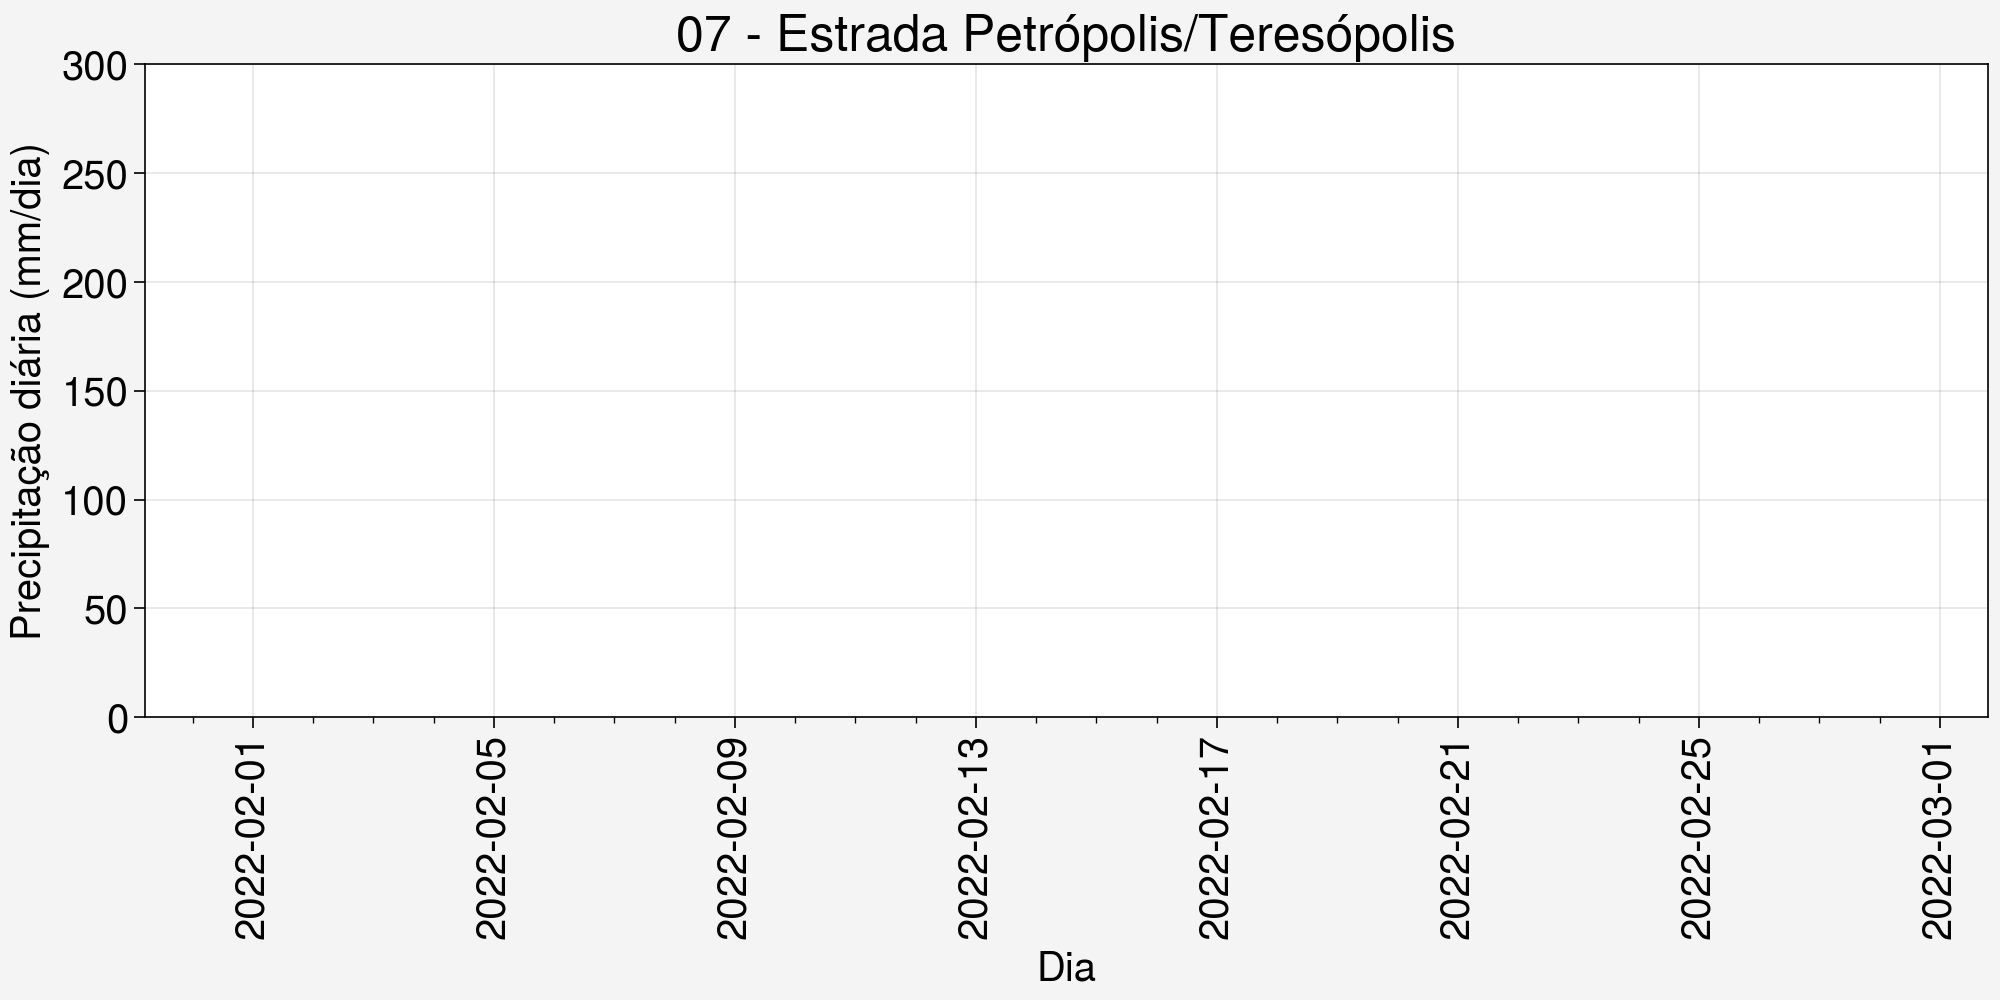

PROCESSANDO--> Vila Constância


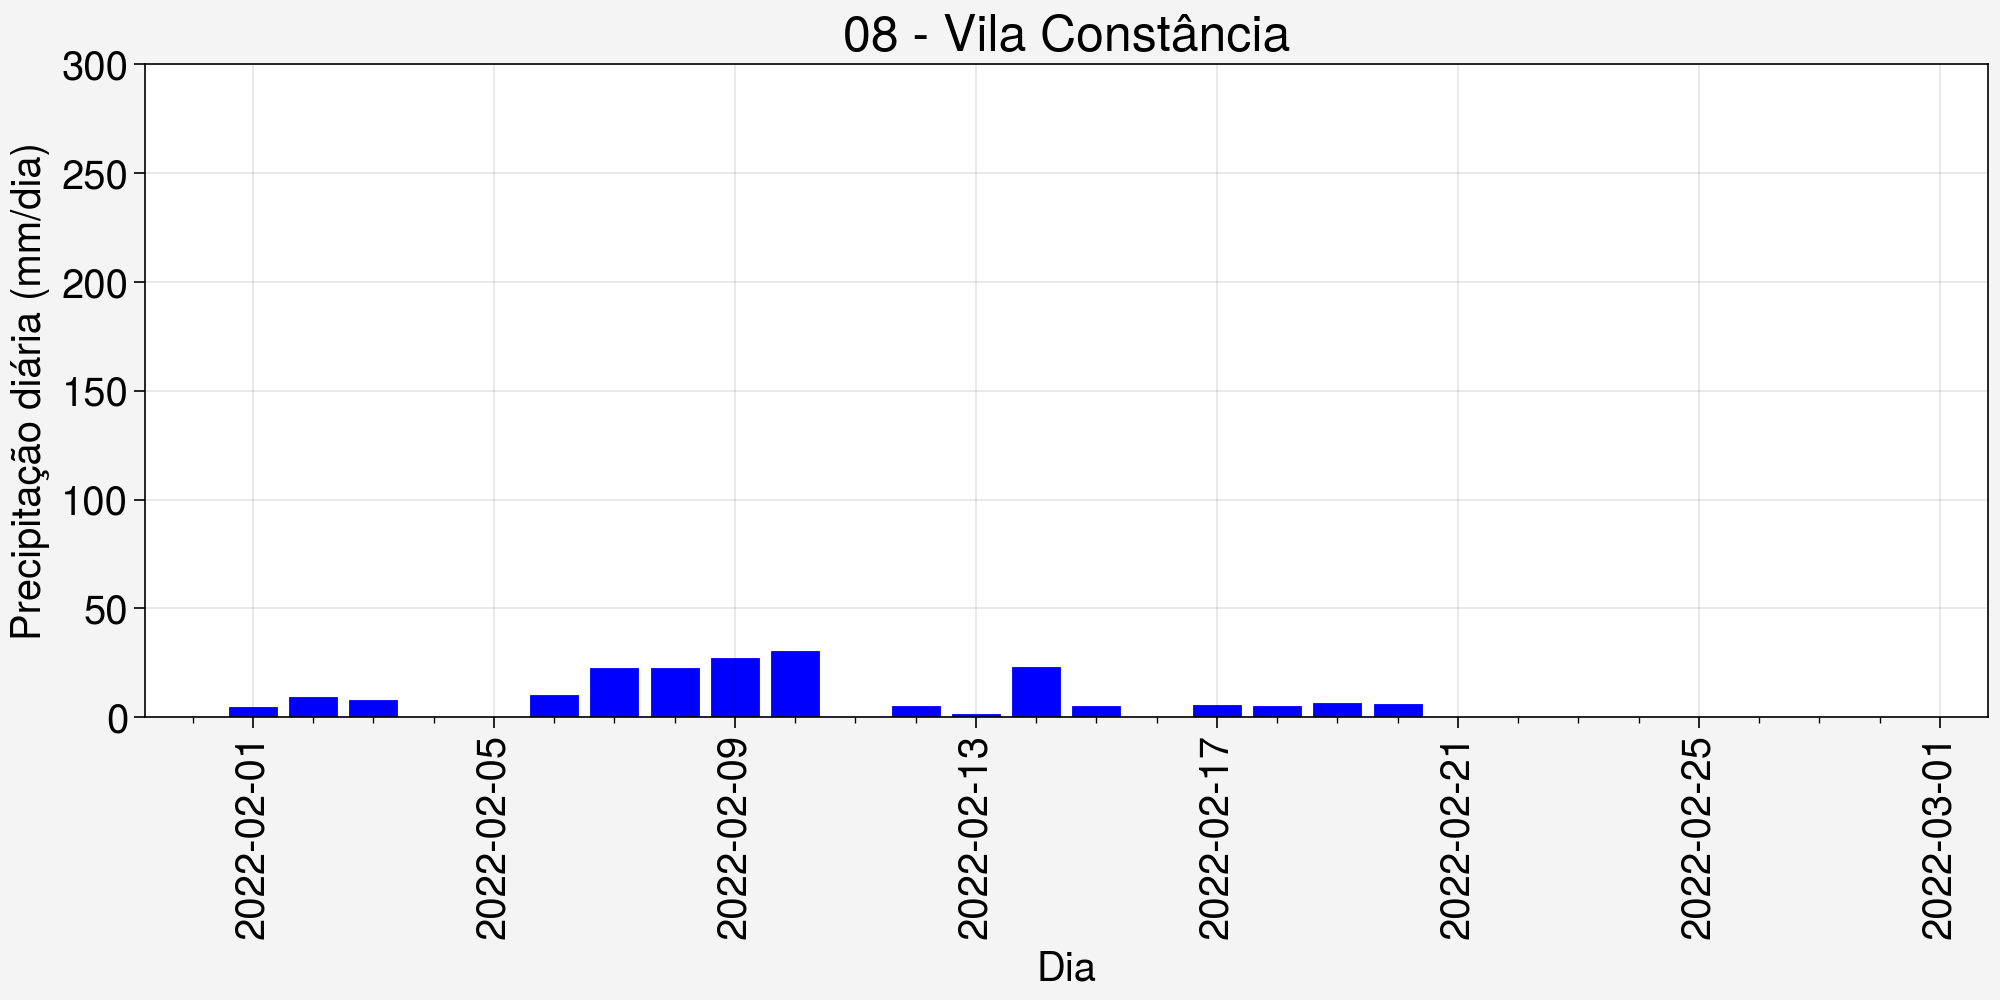

PROCESSANDO--> Itaipava


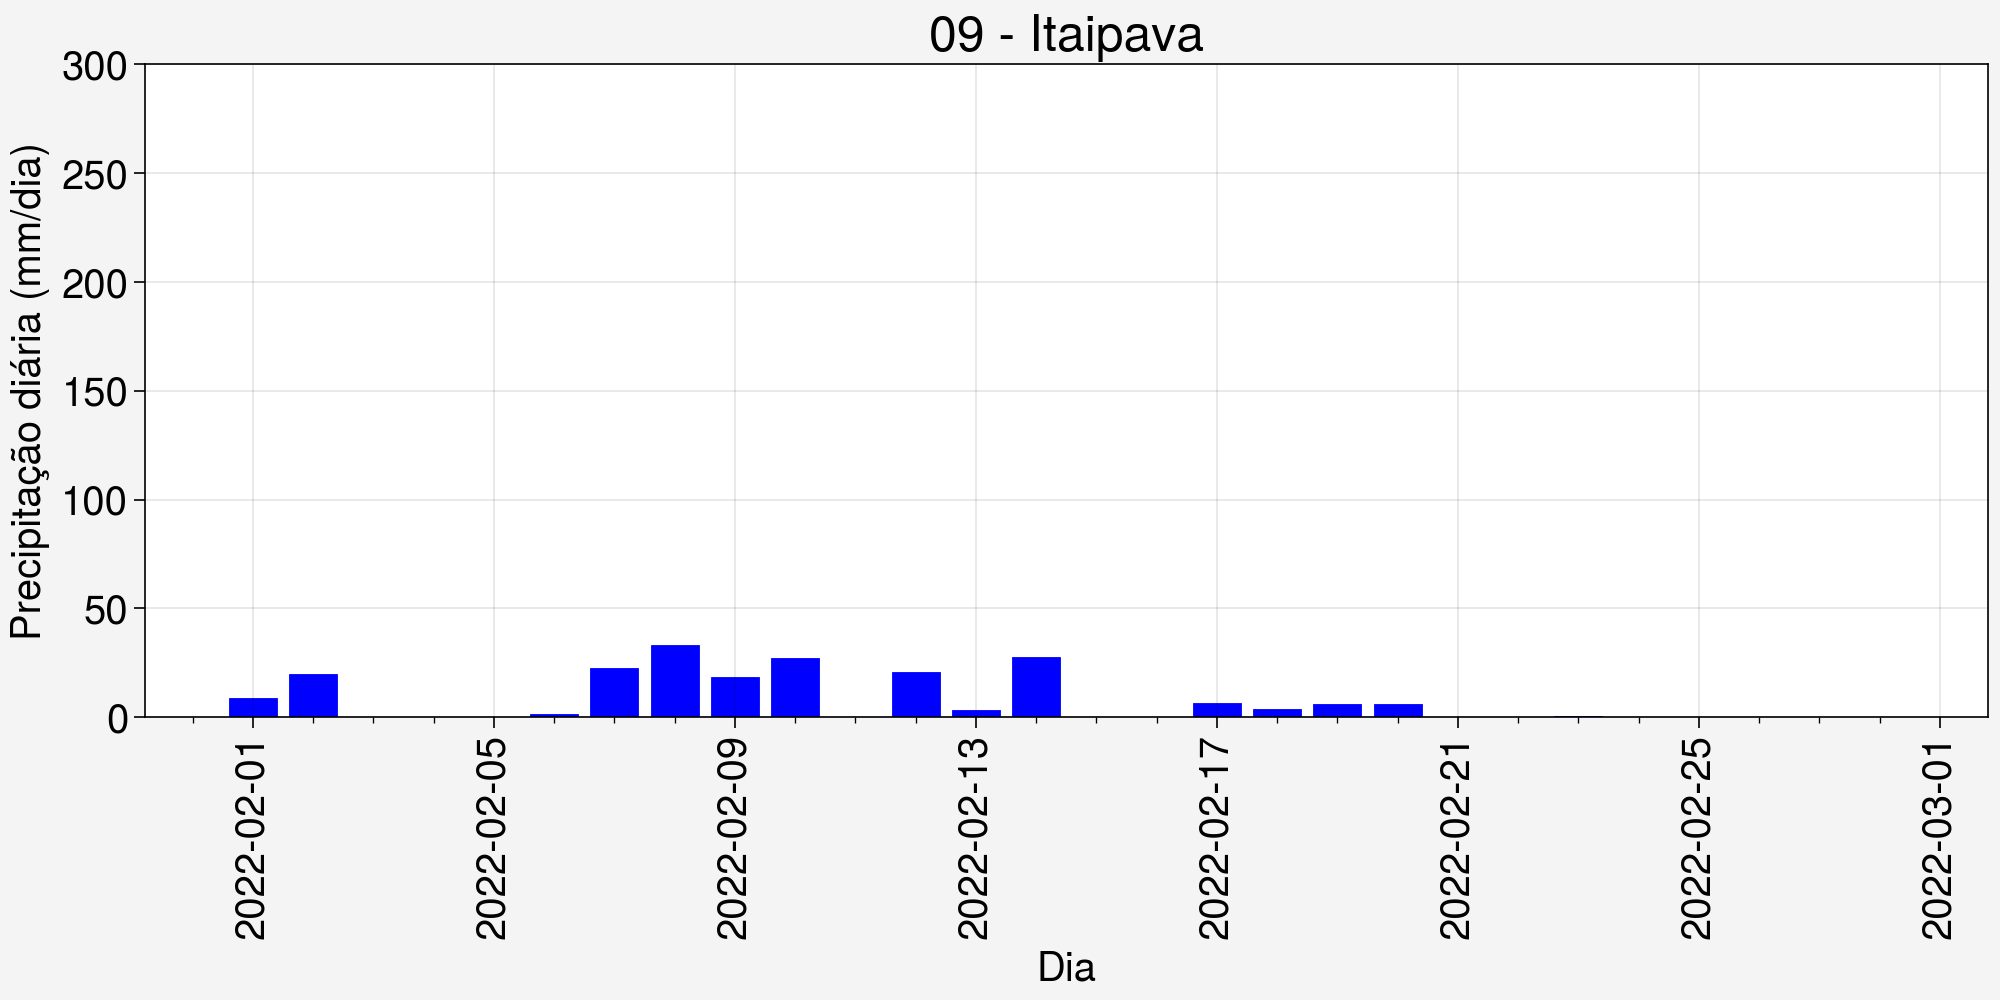

PROCESSANDO--> Independência2


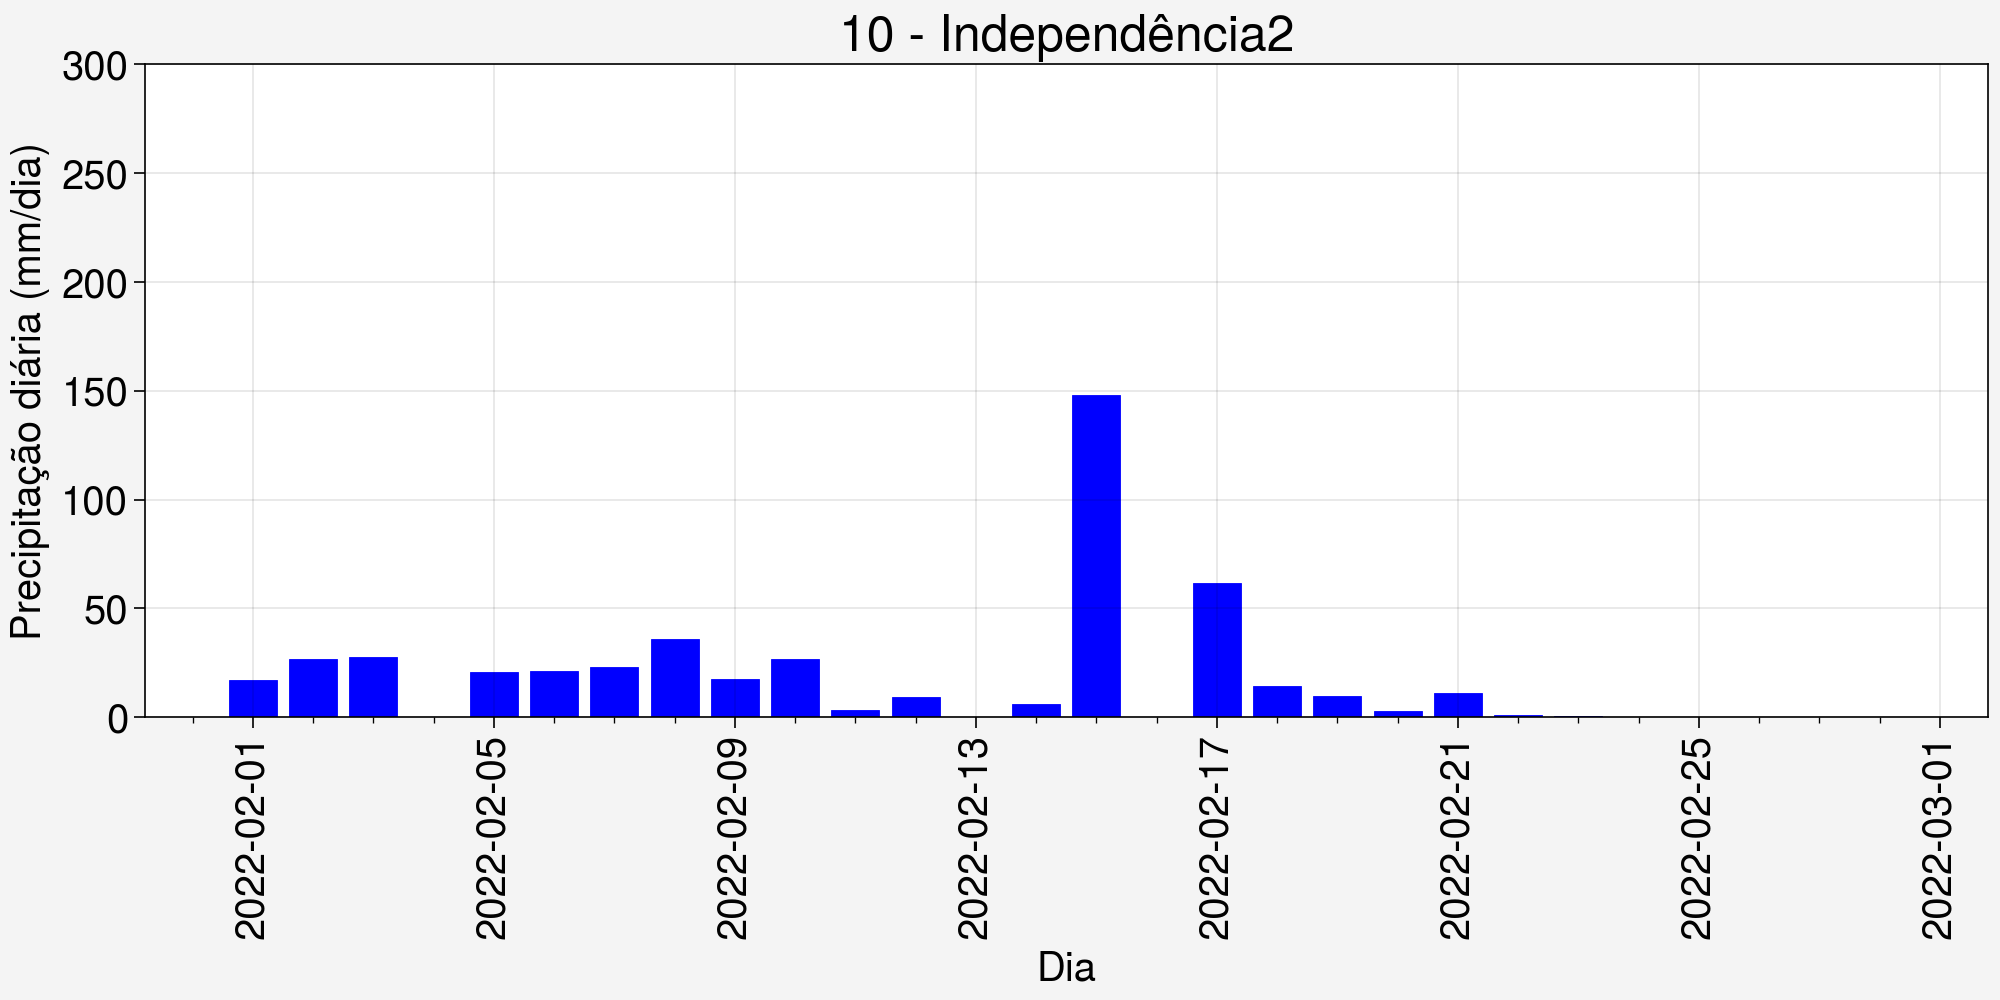

PROCESSANDO--> CIEP Brizolão 281


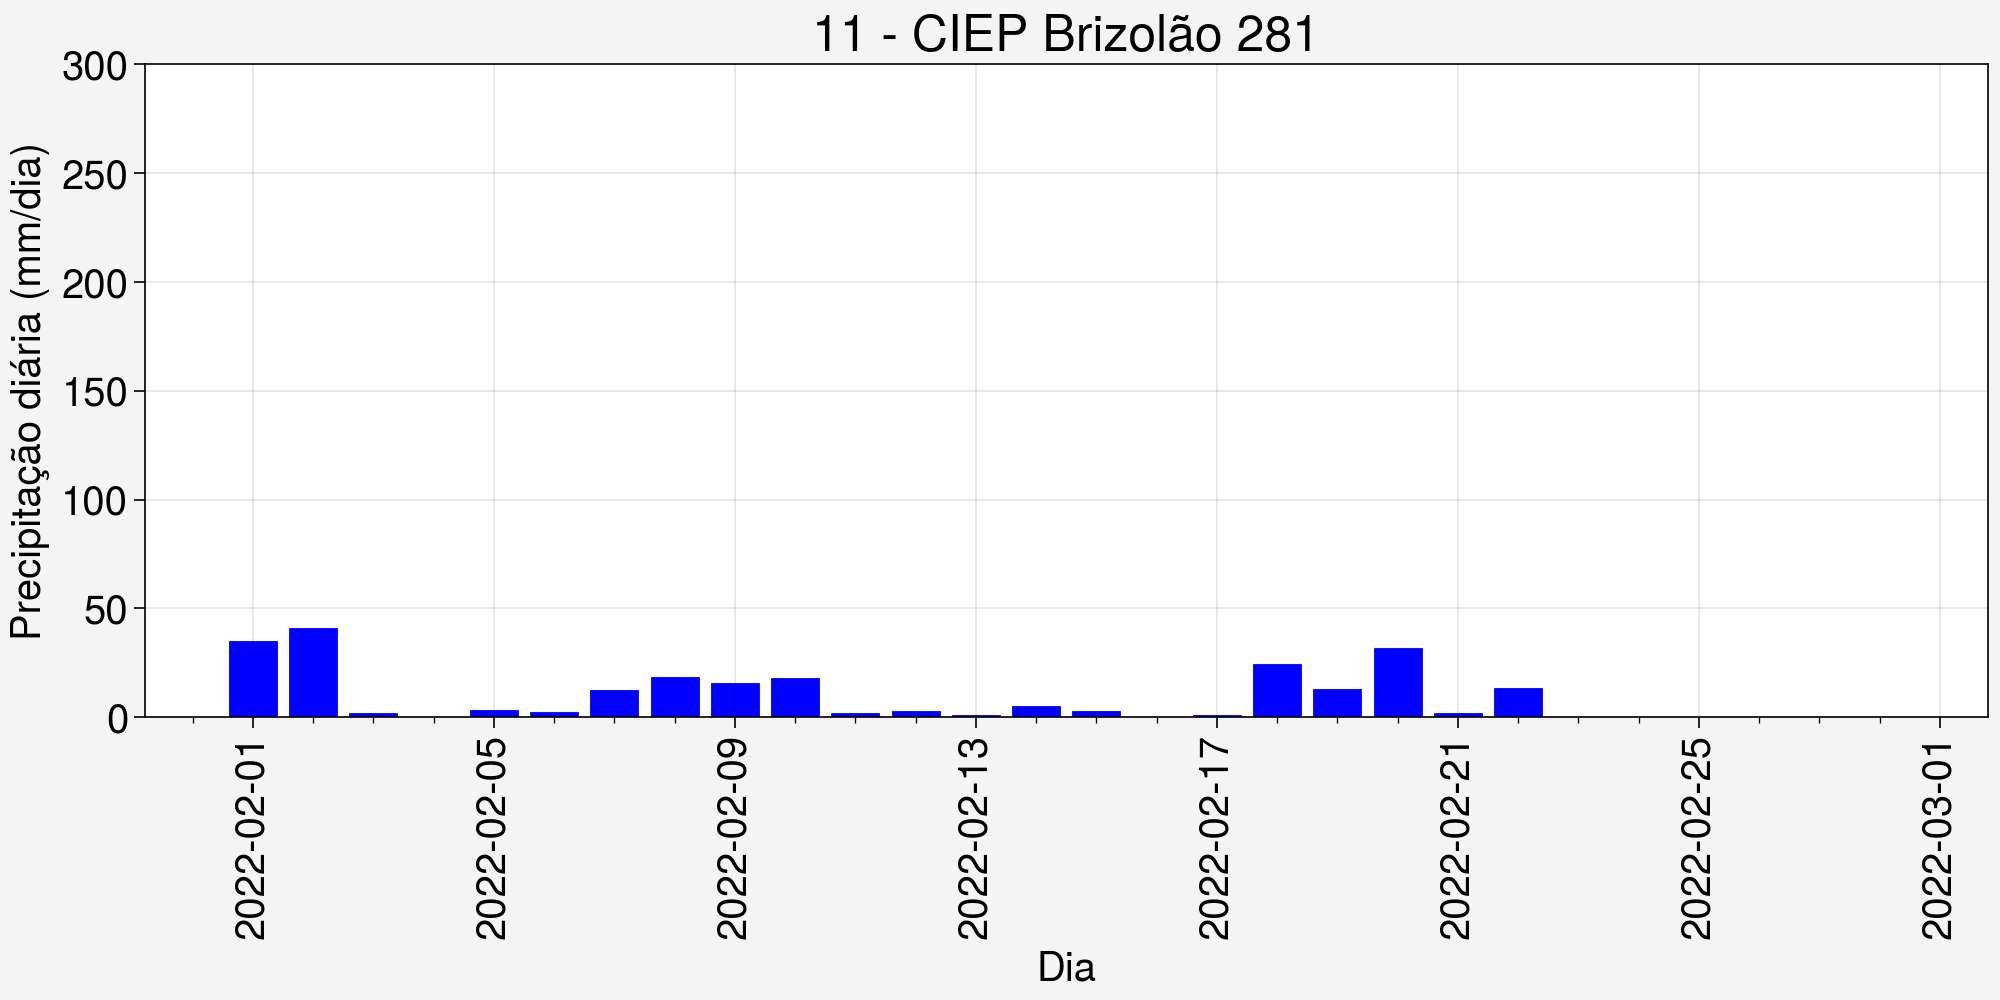

PROCESSANDO--> CIEP Brizolão137


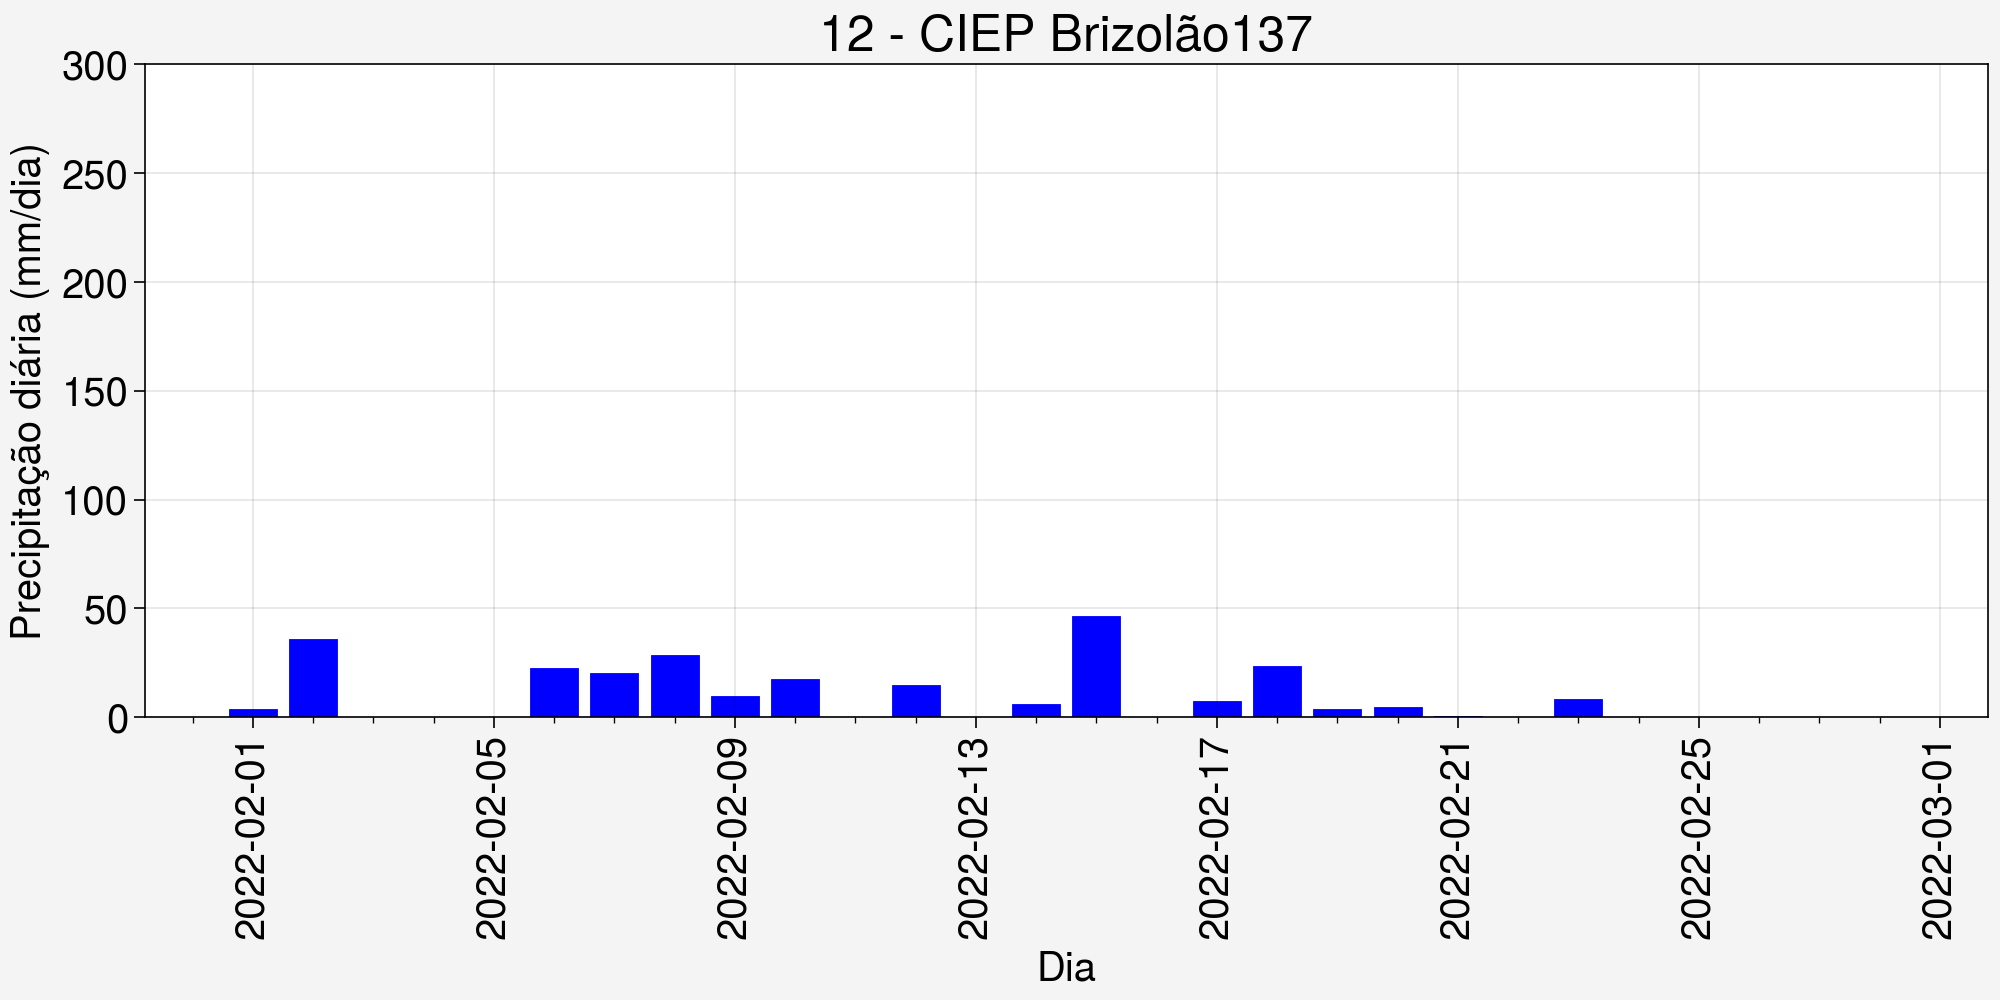

PROCESSANDO--> Vale do Cuiabá


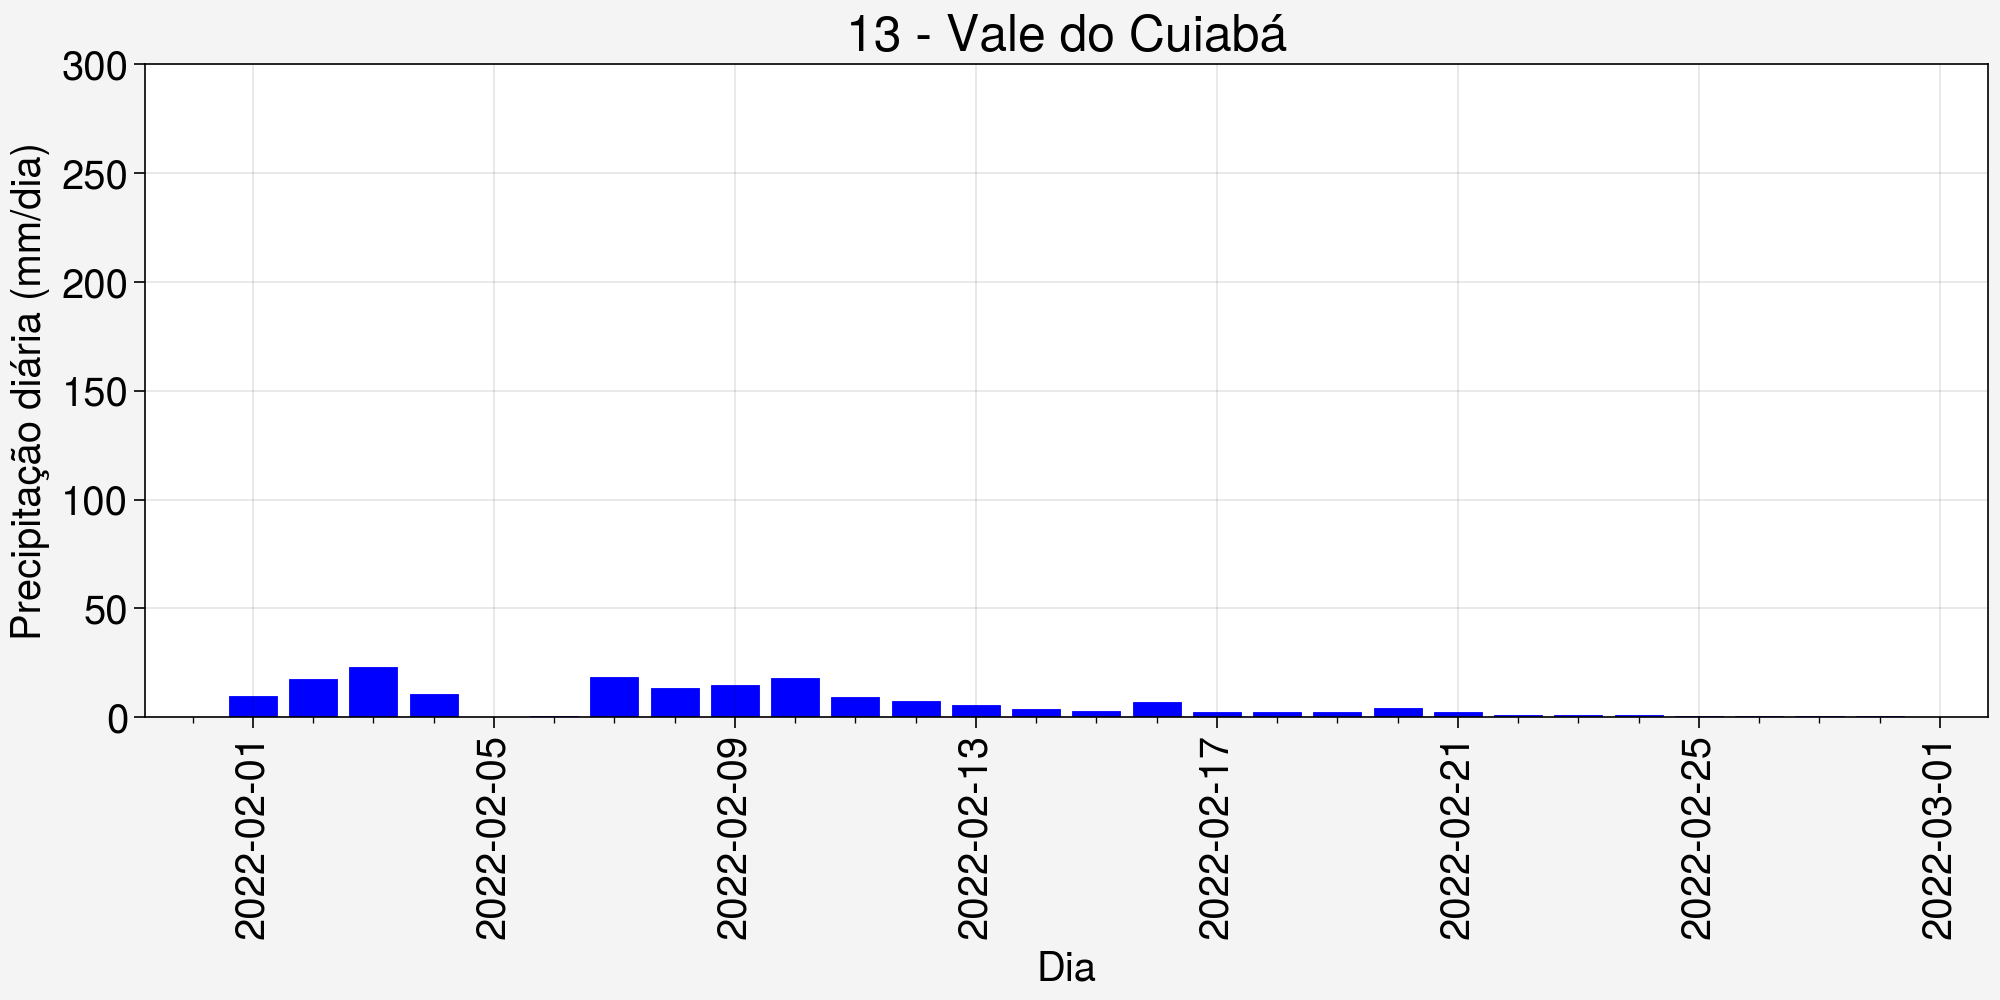

PROCESSANDO--> Rua Araruama/Quitandinha


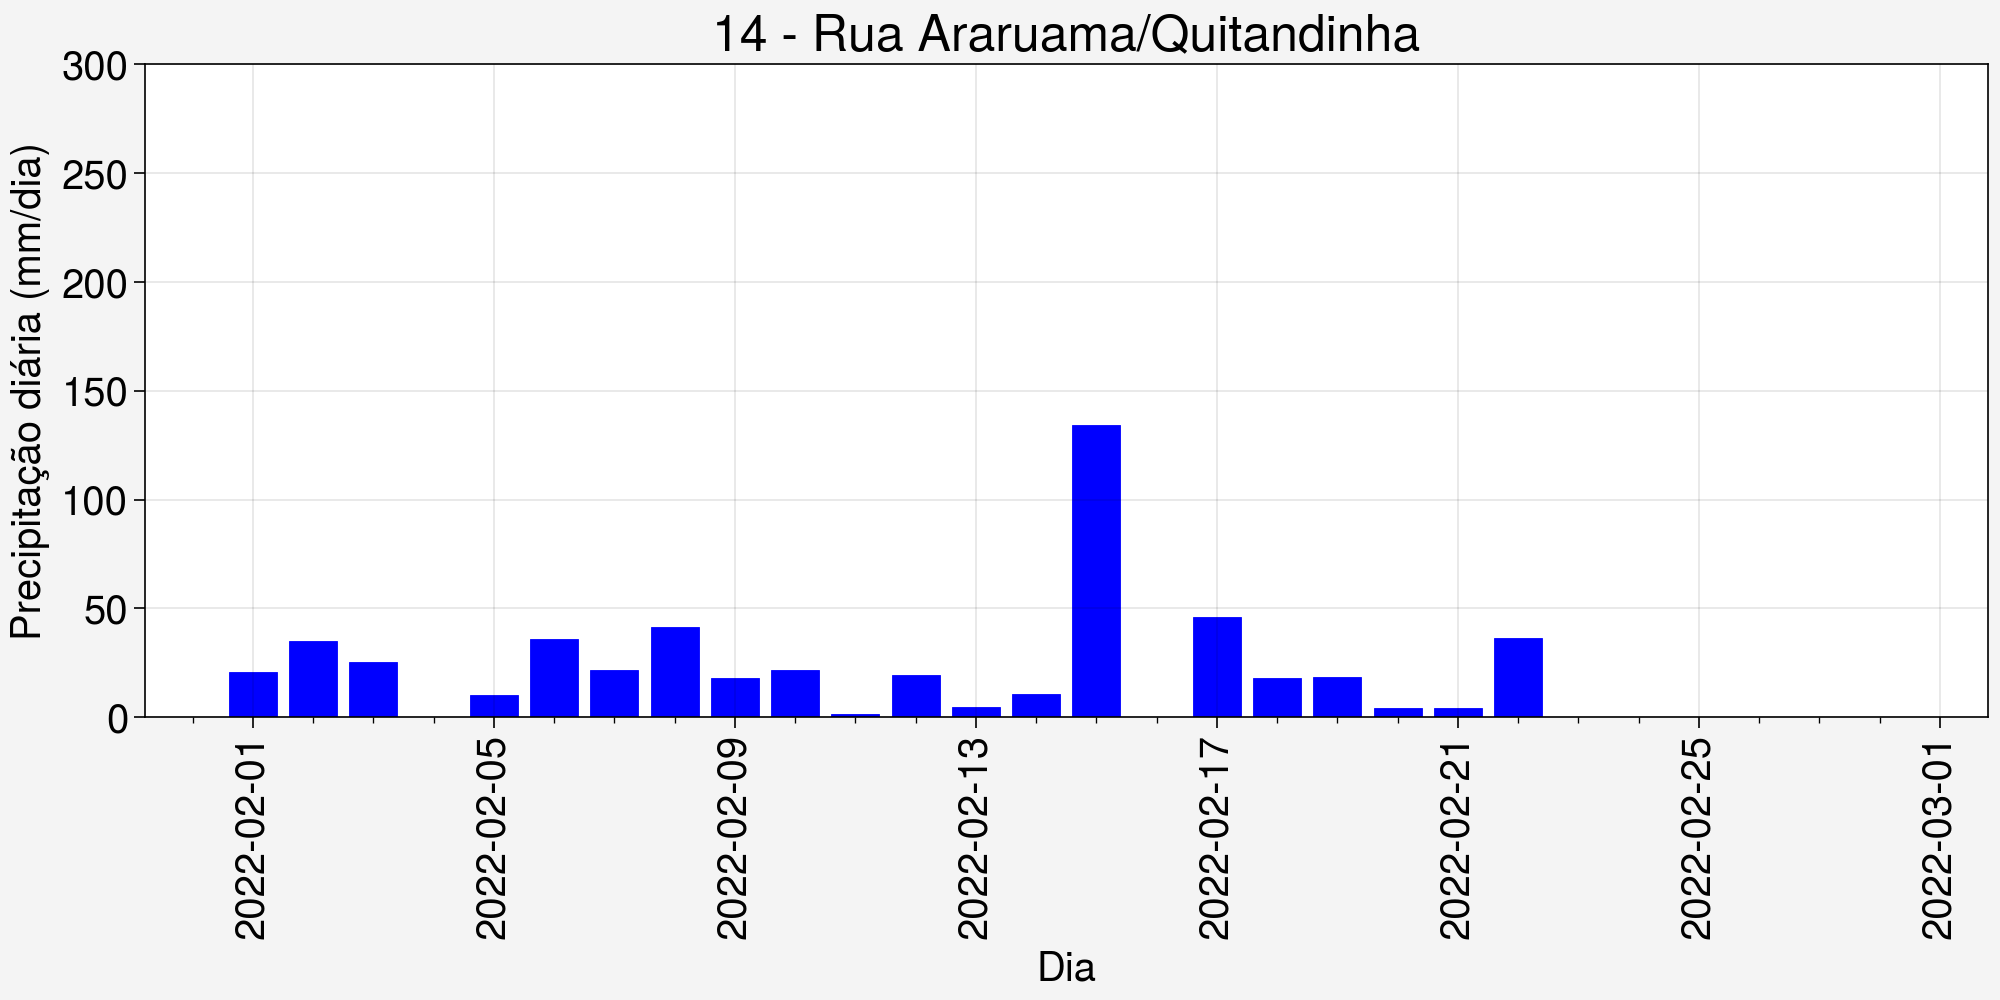

PROCESSANDO--> Rua Amazonas/Quitandinha


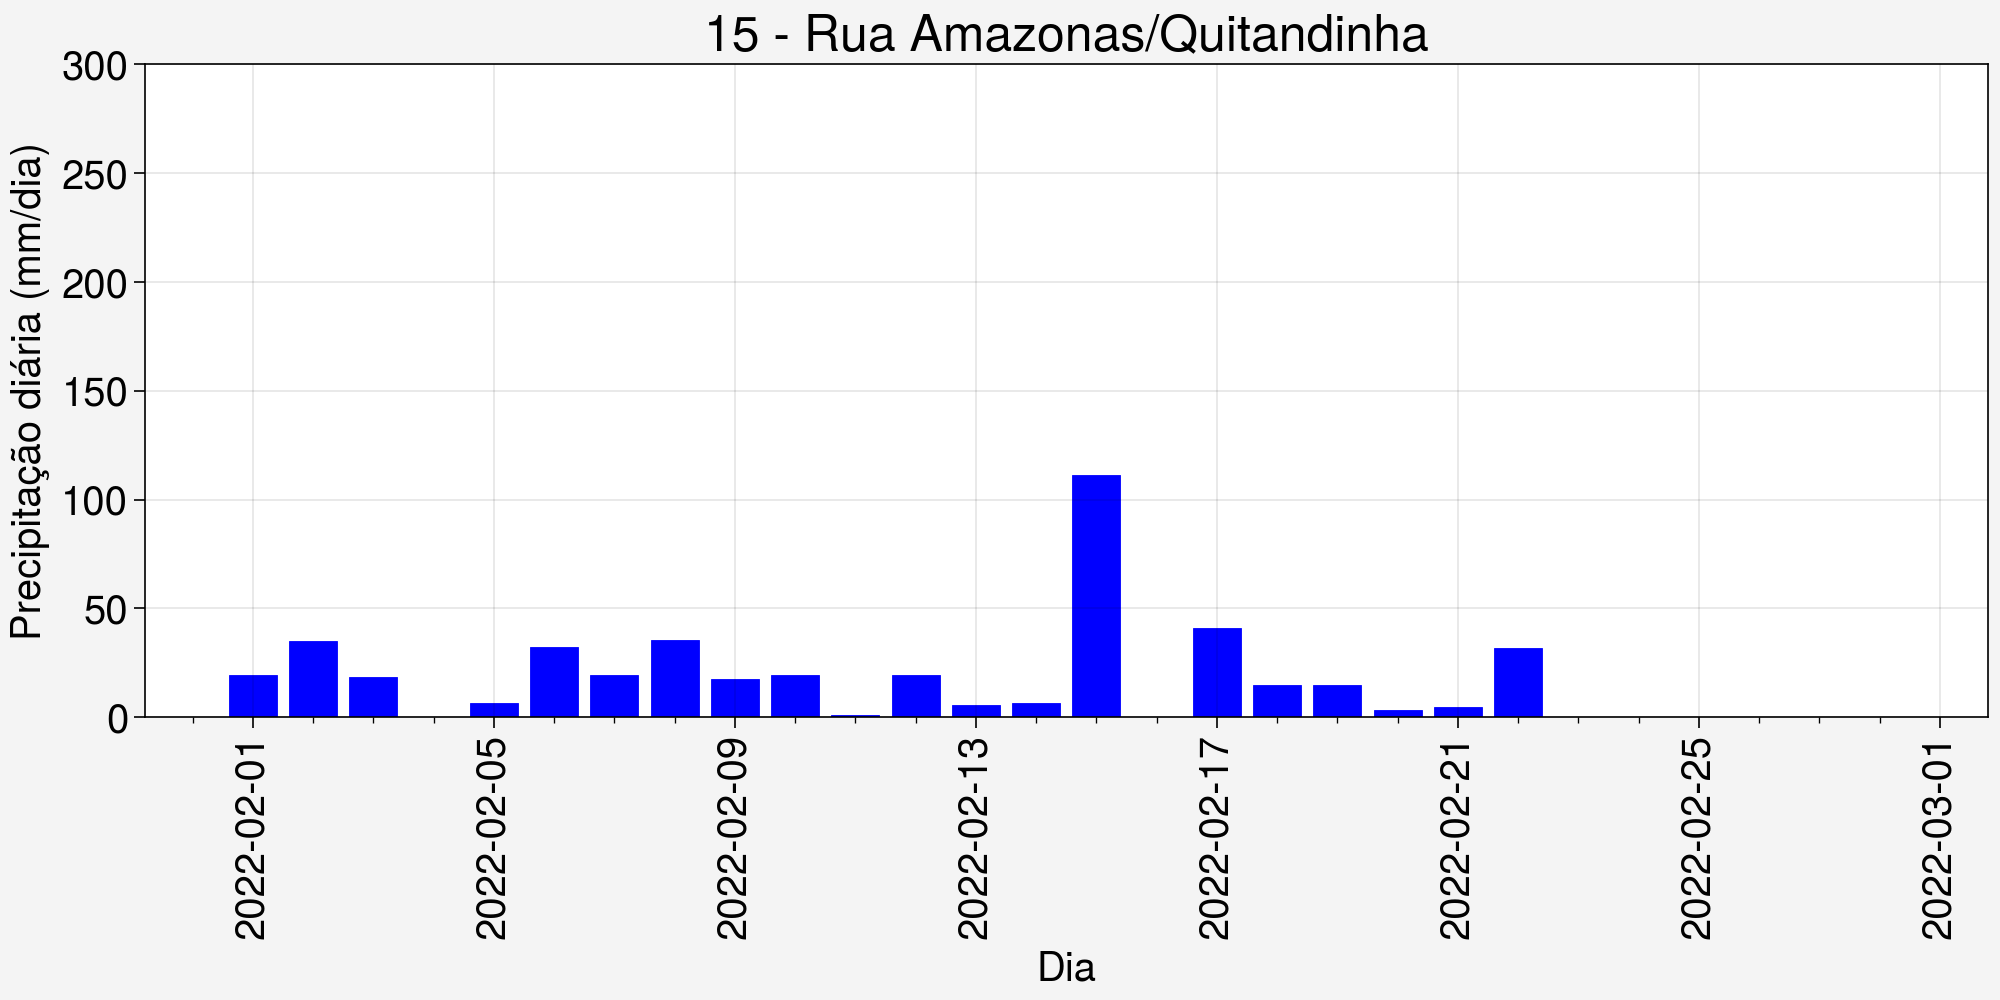

PROCESSANDO--> Morin


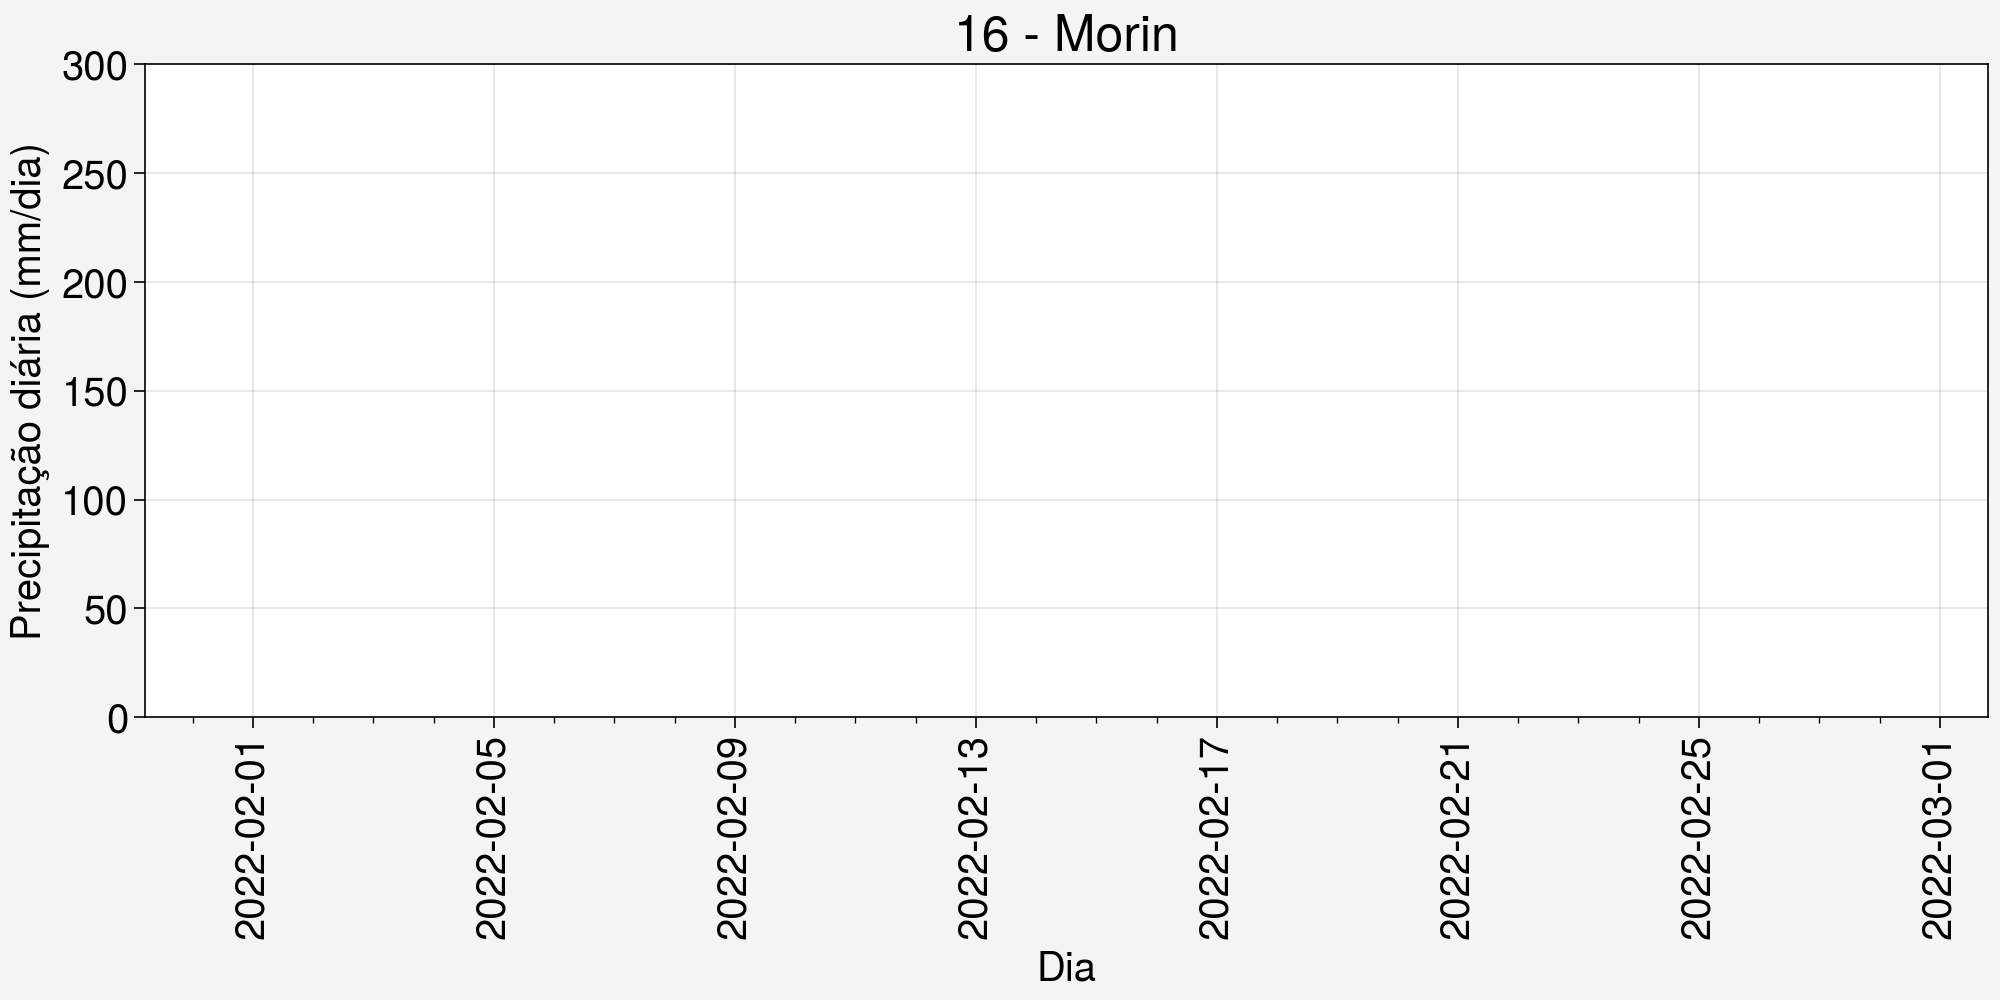

PROCESSANDO--> Itaipava2


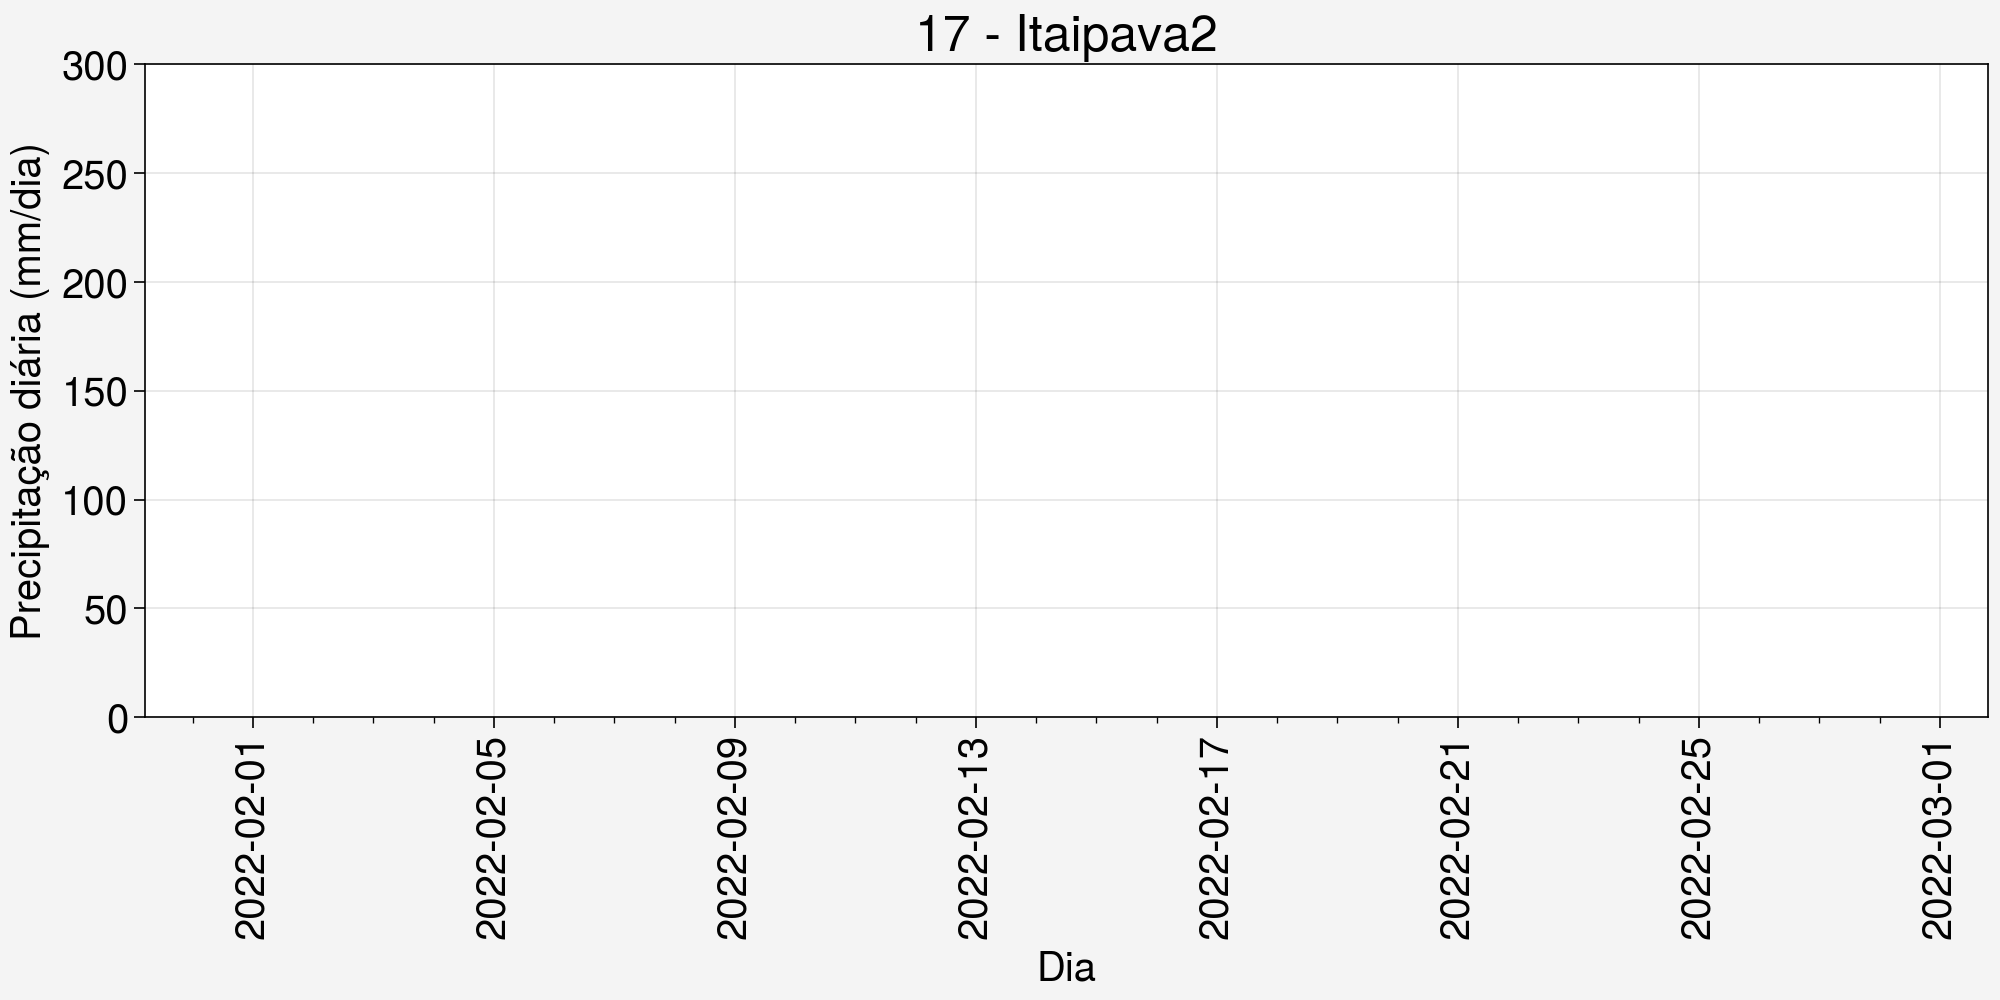

PROCESSANDO--> Pedro do Rio


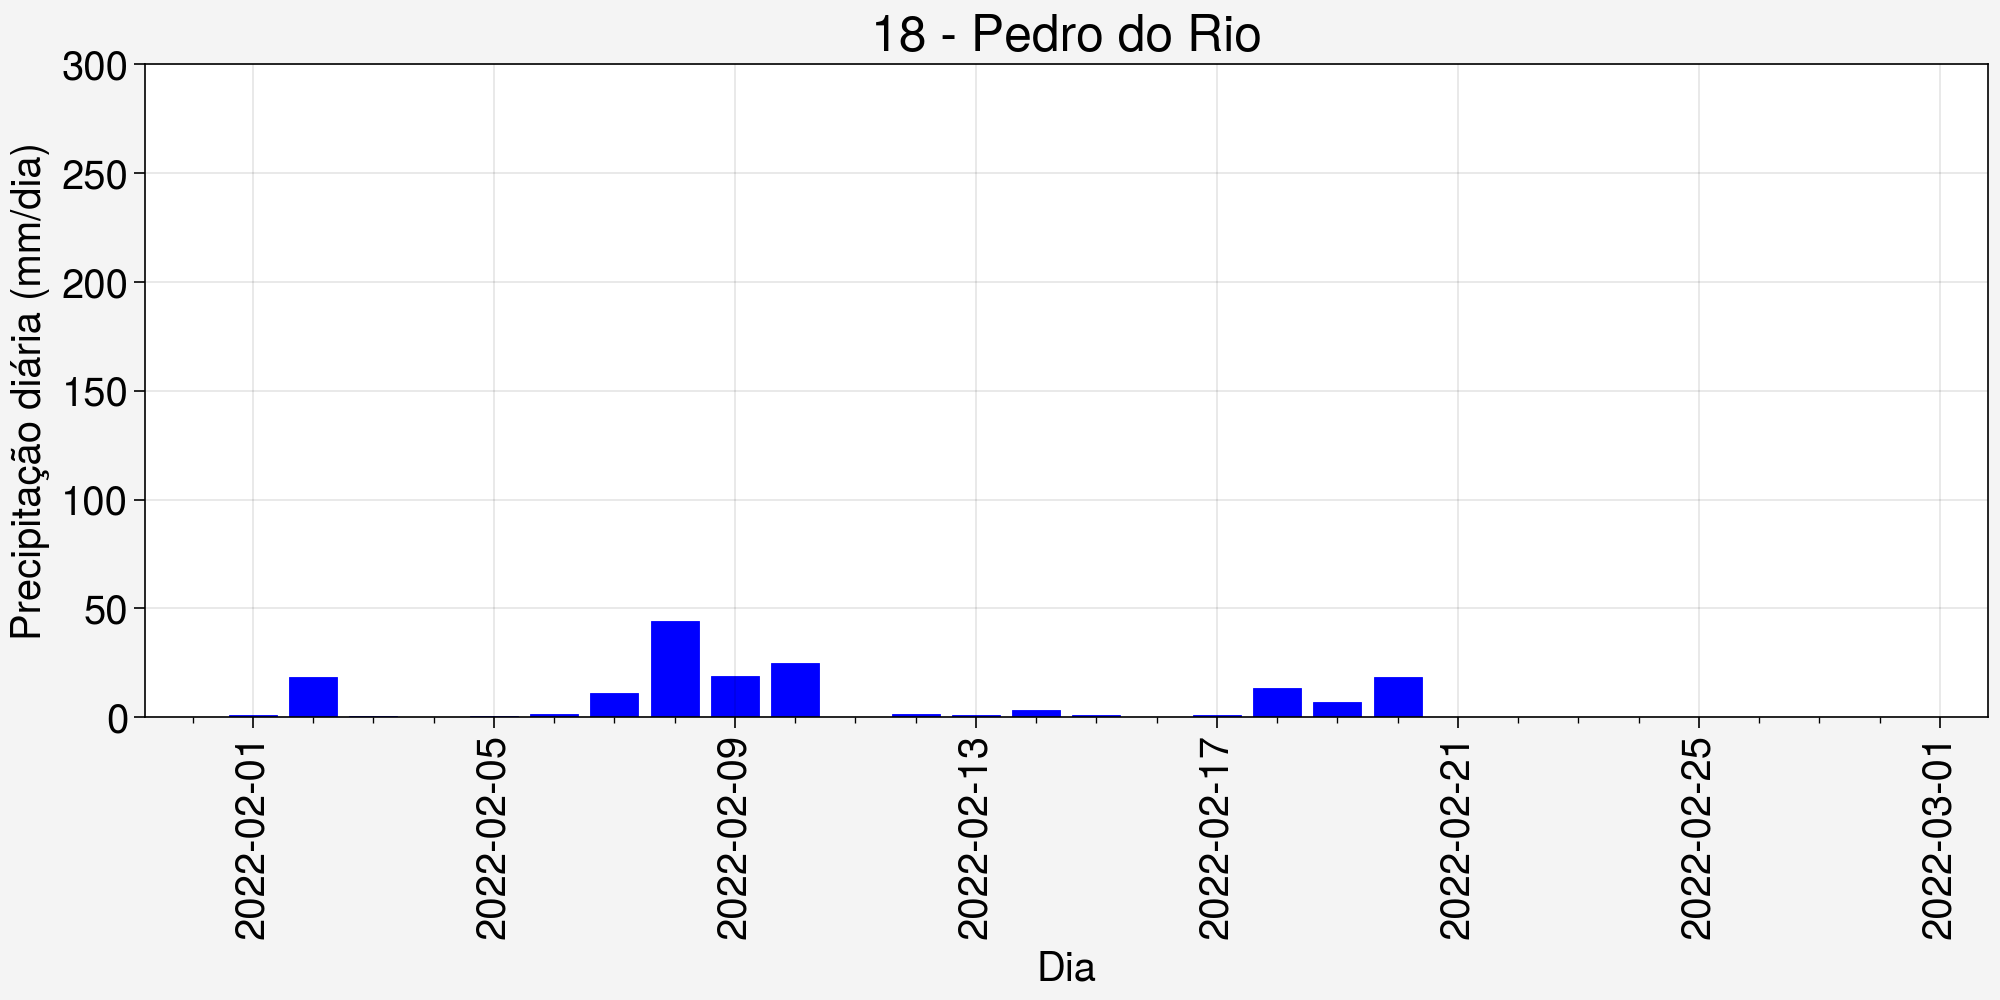

PROCESSANDO--> Estrada da Cachoeira


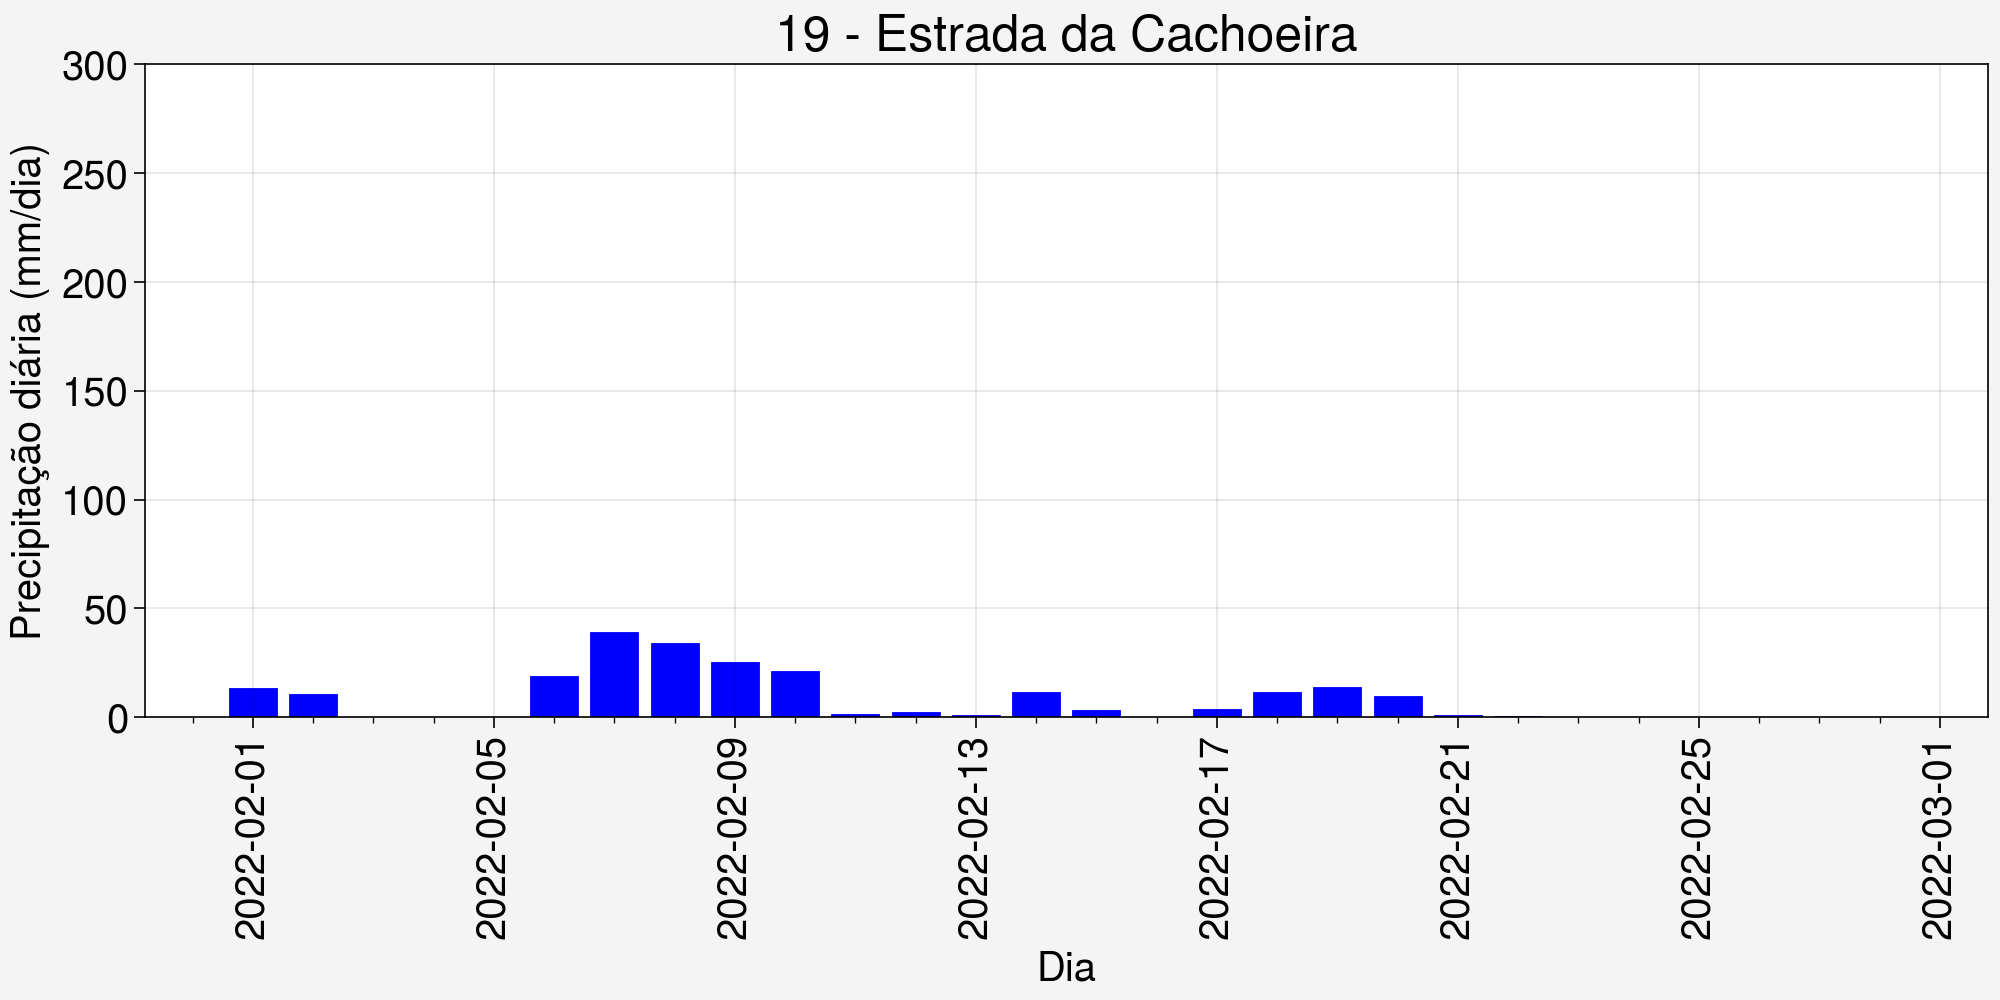

PROCESSANDO--> Mosela


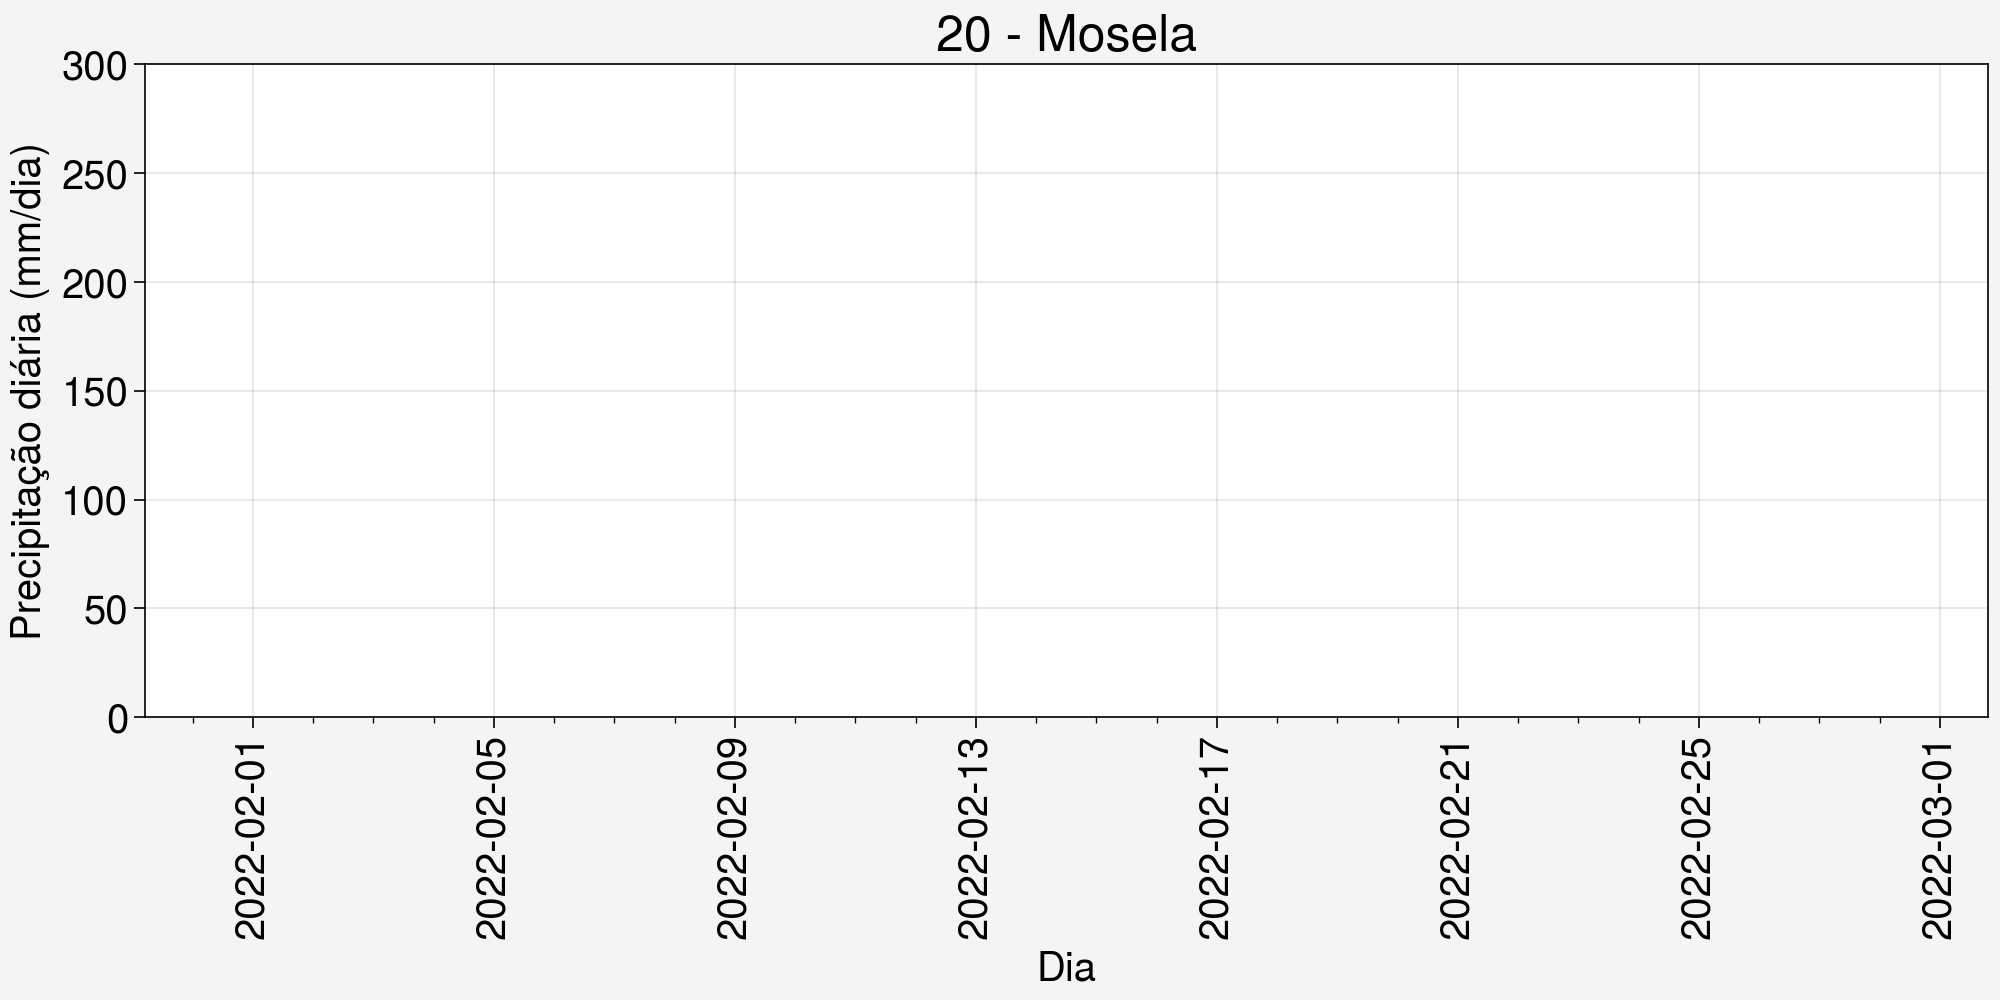

PROCESSANDO--> Vila Rica


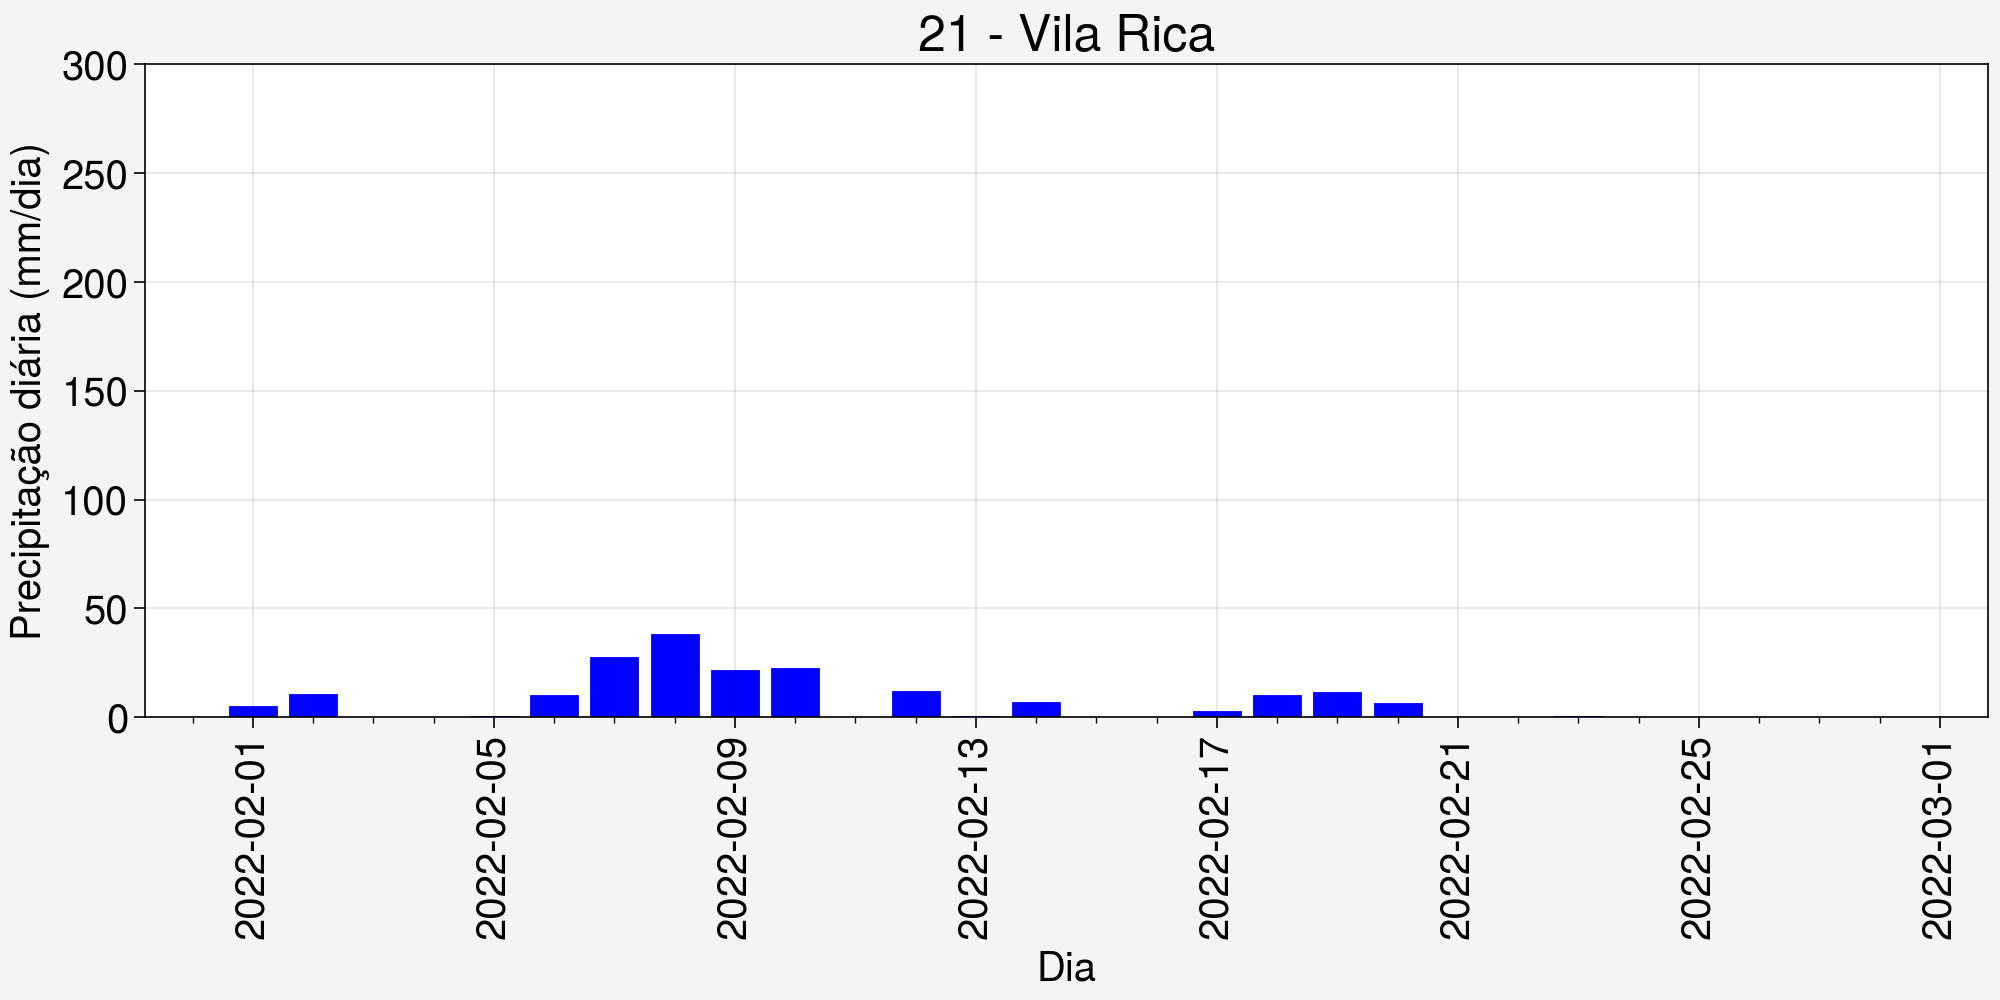

In [99]:
# loop nas 21 estações
for i, estacao in enumerate(estacoes):

    # exibe o nome da estação
    print('PROCESSANDO-->', estacao)

    # cria a moldura da figura
    fig, ax = plot.subplots(figsize=(10,5), tight=True)

    # extrai o dado daquela estacao
    df_estacao = df[ df['nome_estacao'] == estacao]

    # plota gráfico de barras
    ax.bar(df_estacao['chuva'].groupby(pd.Grouper(freq='1D')).sum(), color='blue')

    # formato dos eixos
    ax.format(title=f'{str(i+1).zfill(2)} - {estacao}',
              xlabel='Dia',
              ylabel='Precipitação diária (mm/dia)',
              small='20px',
              large='25px',
              xrotation=90,
              xtickminor=True,
              ytickminor=False,
              ylim=(0,300))

    # salva figura
    name = estacao.replace('/','_')
    fig.save(f'{dir}output/3_chuva_por_dia/Fig4_diario_{str(i+1).zfill(2)}_{name}.png', dpi=300)

    # exibe figura na tela
    plot.show()

# **PARTE 6:** Gráfico horário

PROCESSANDO--> Quitandinha - Geo


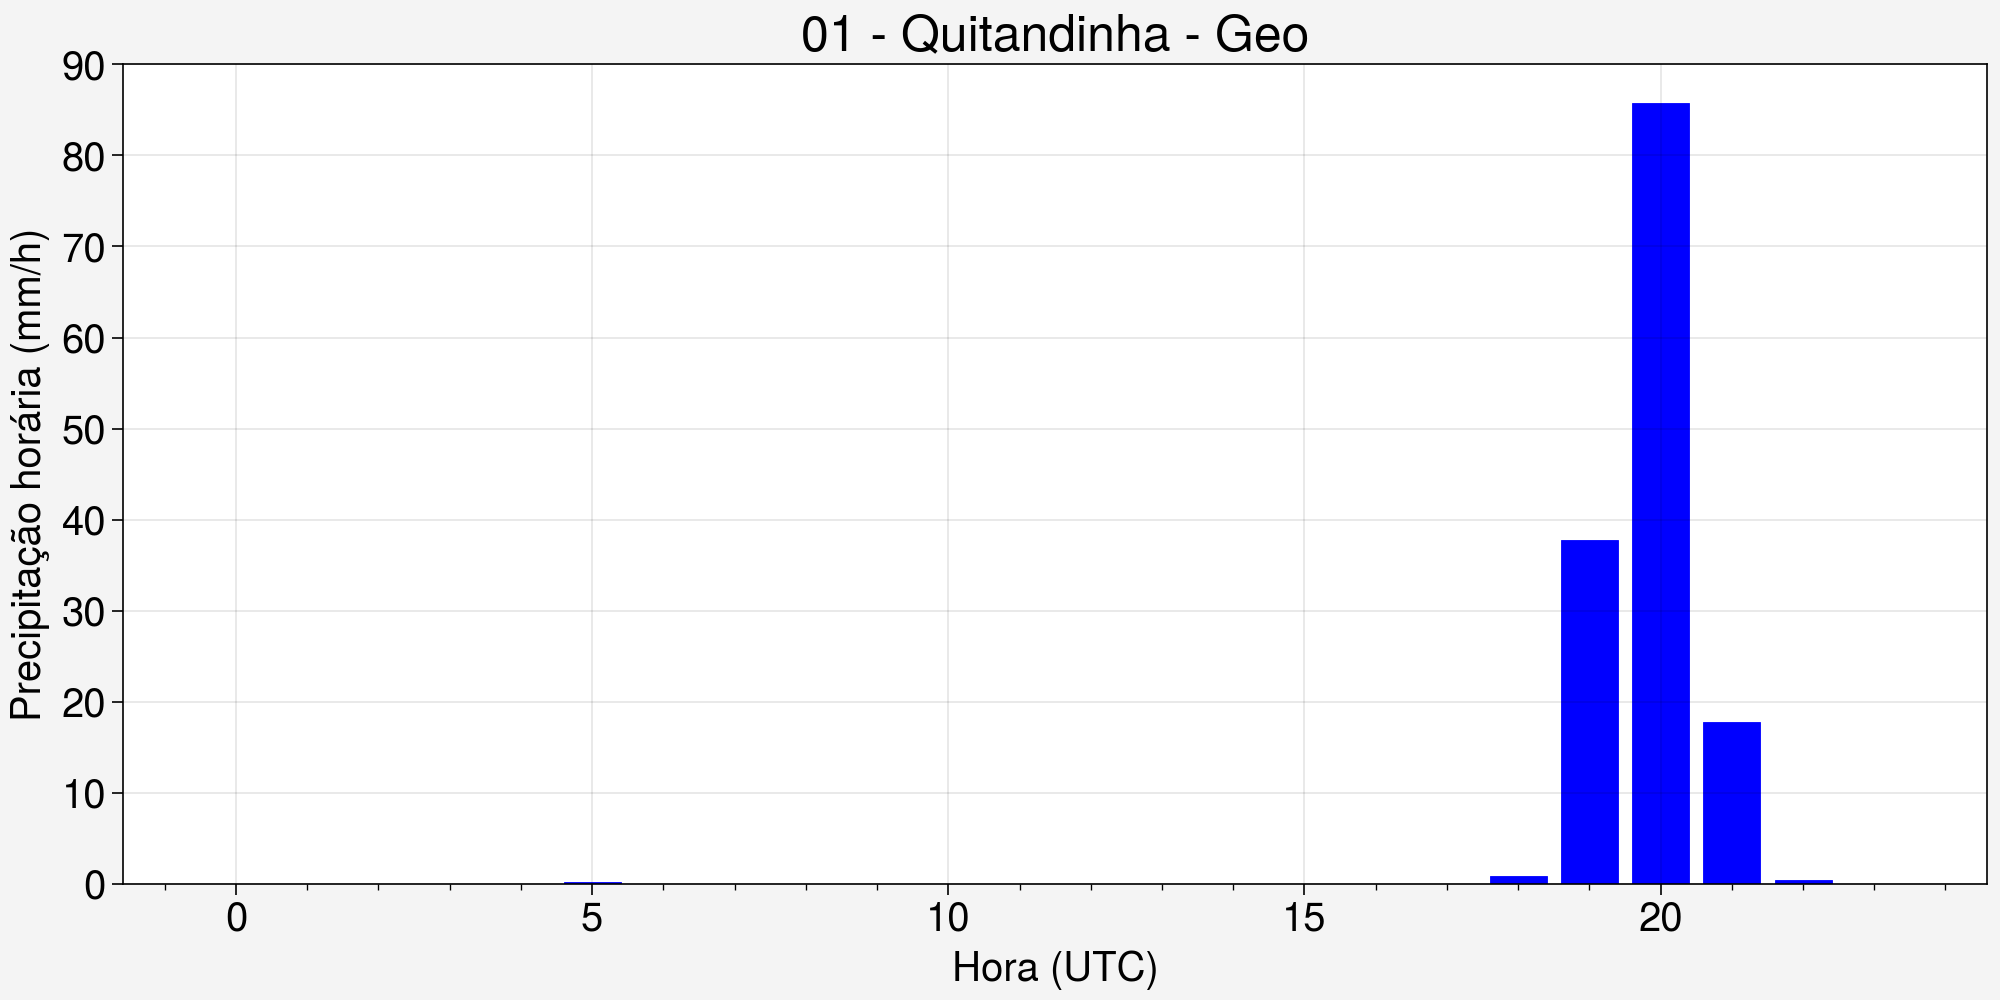

PROCESSANDO--> Dr. Thouzet - Geo


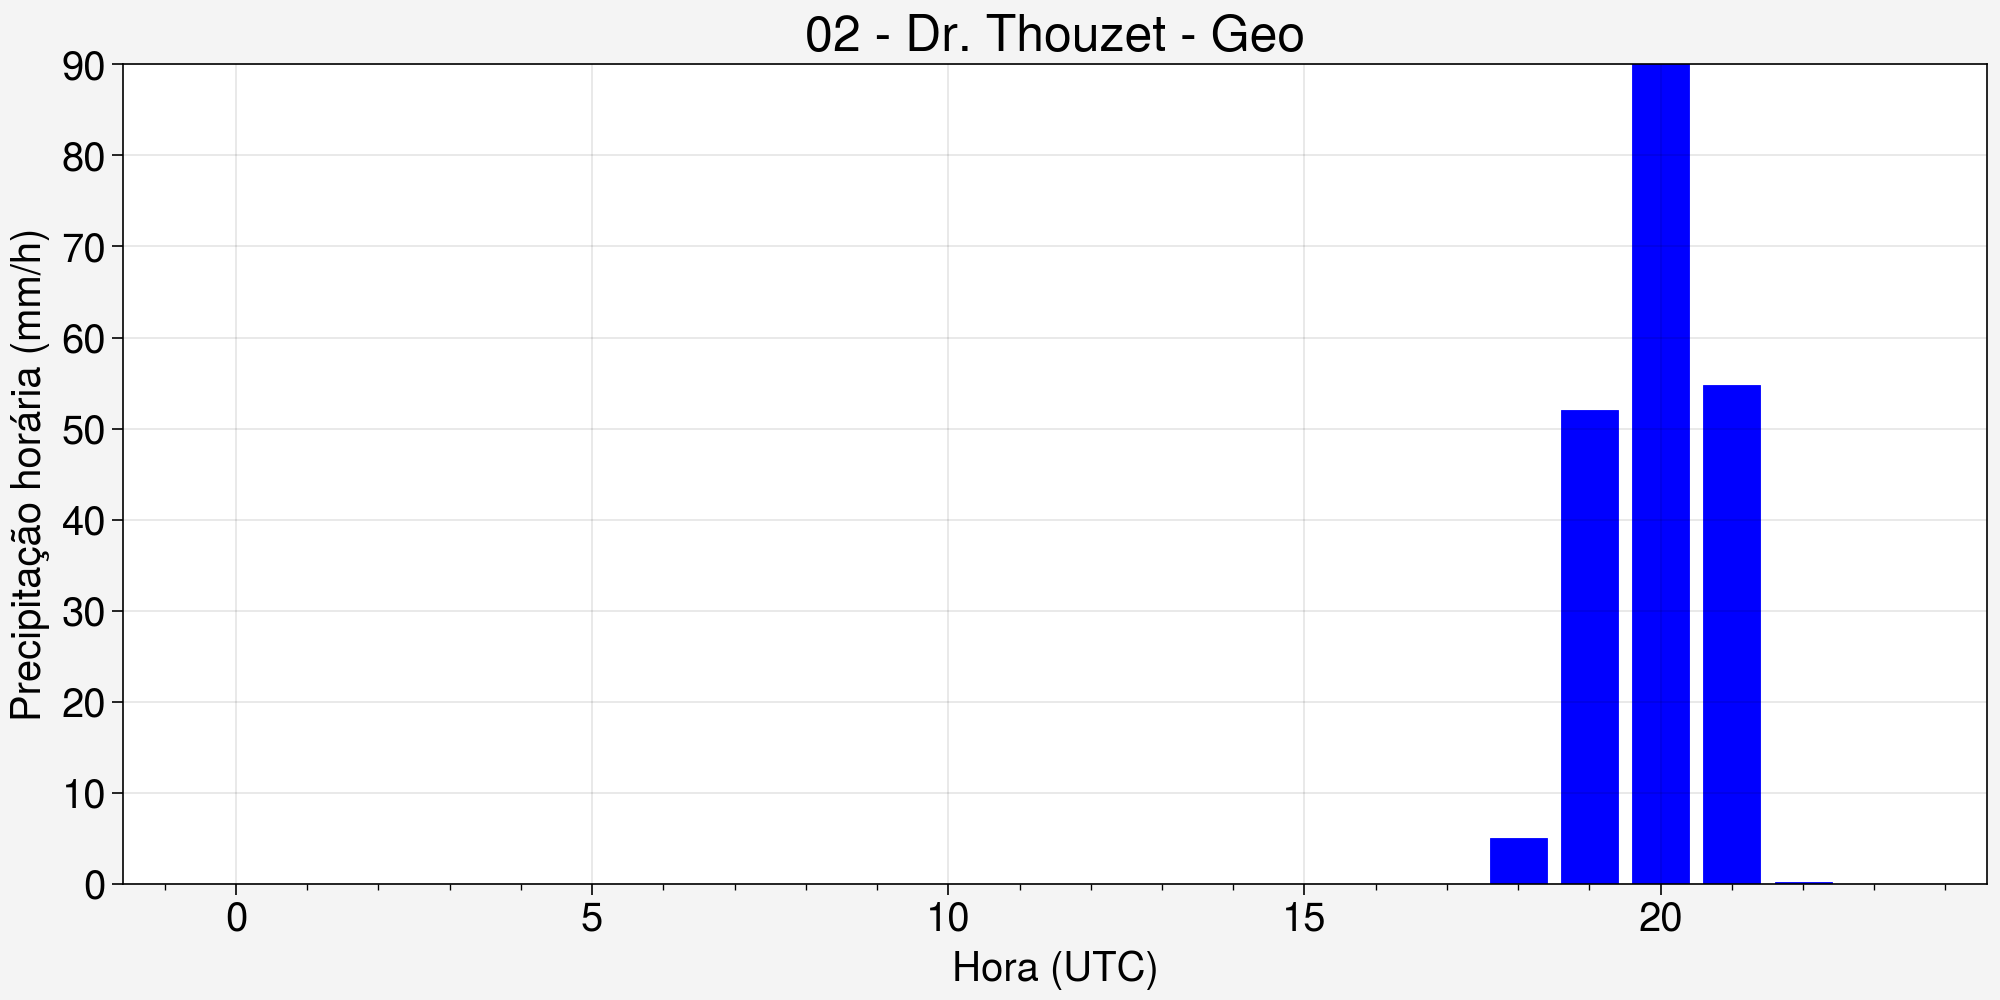

PROCESSANDO--> São Sebastião - Geo


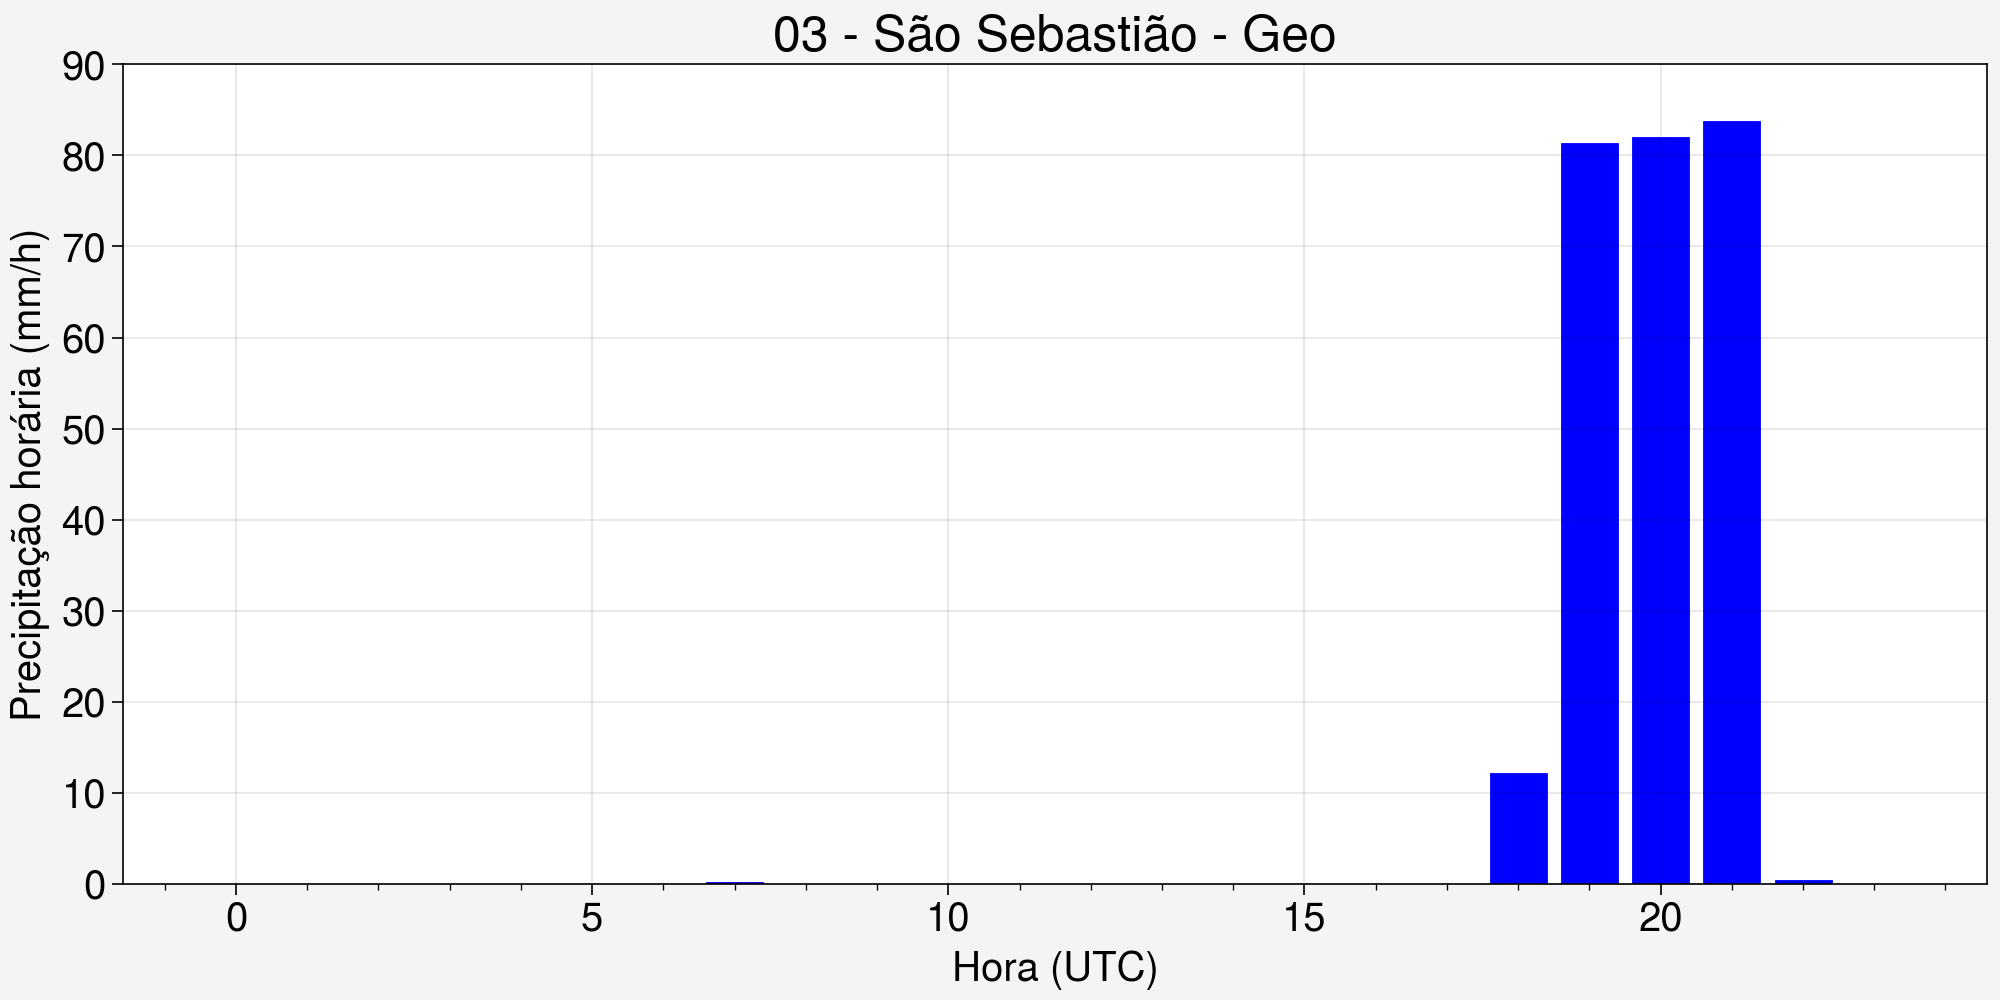

PROCESSANDO--> Araras


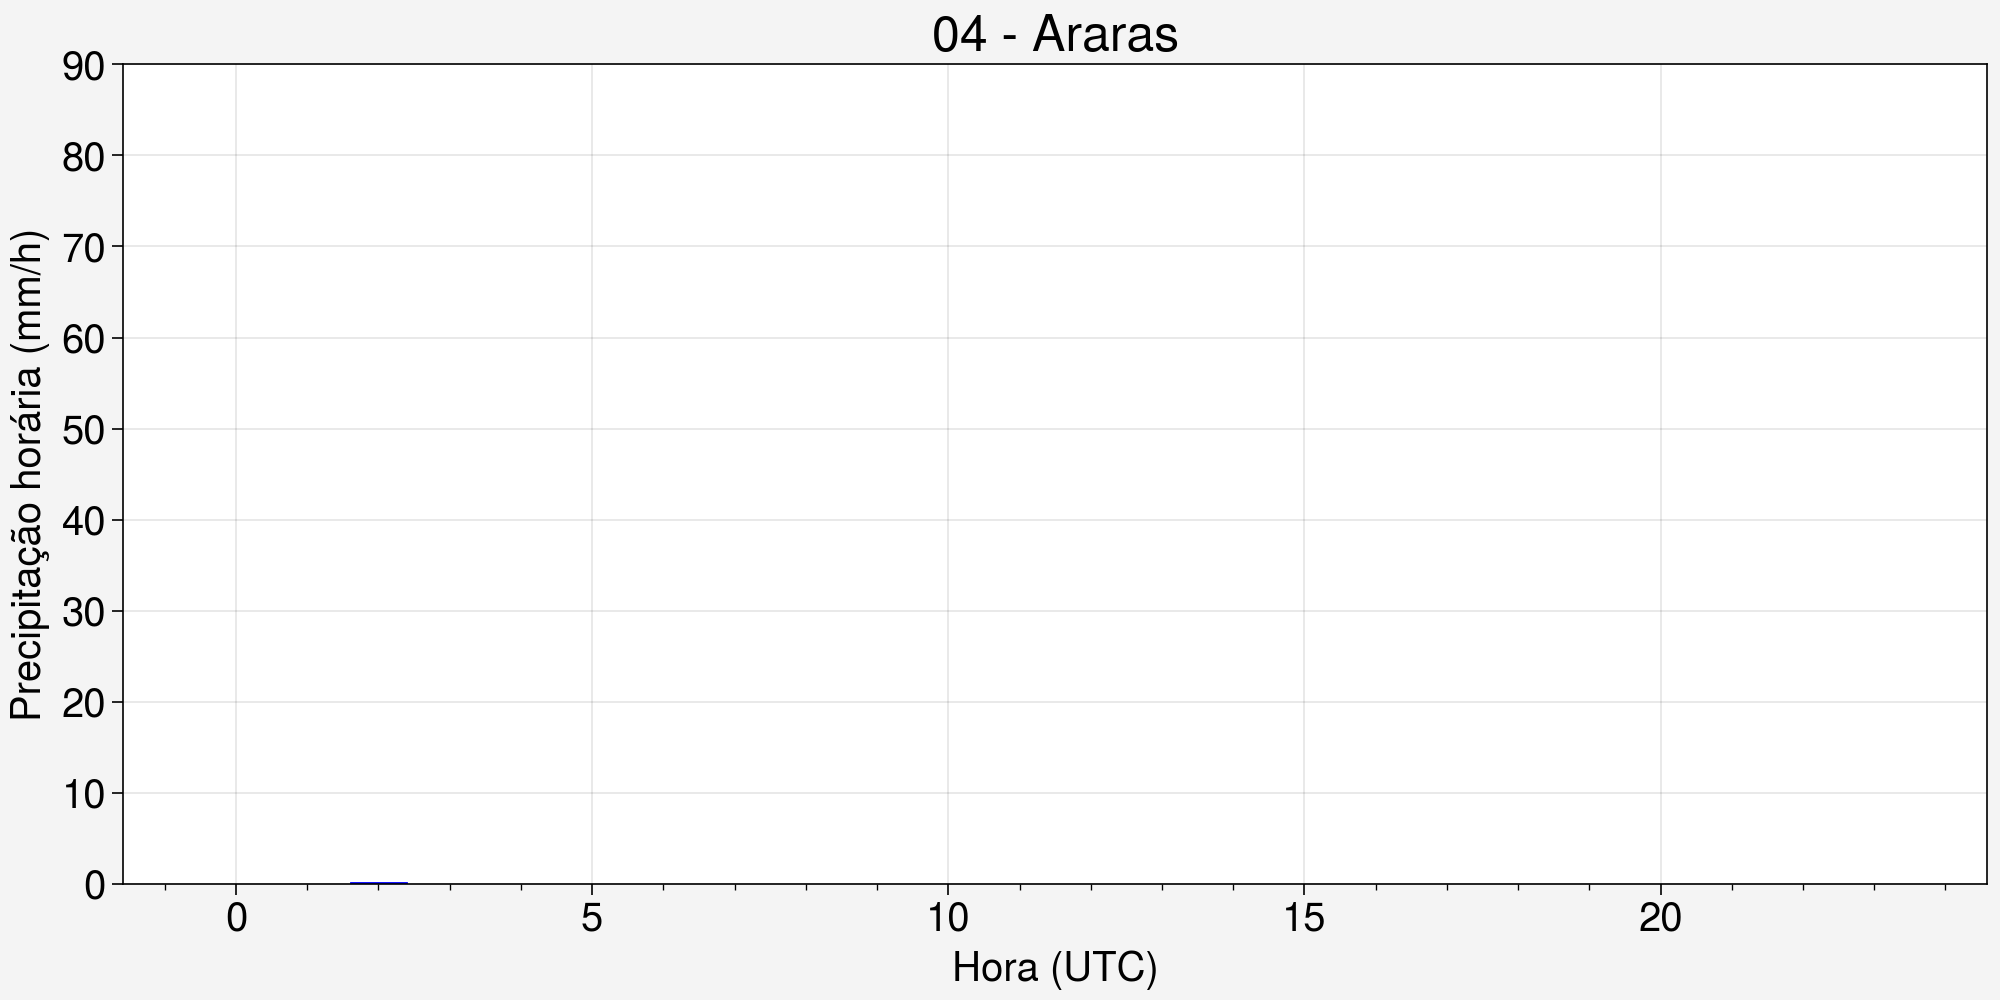

PROCESSANDO--> Bingen - Geo


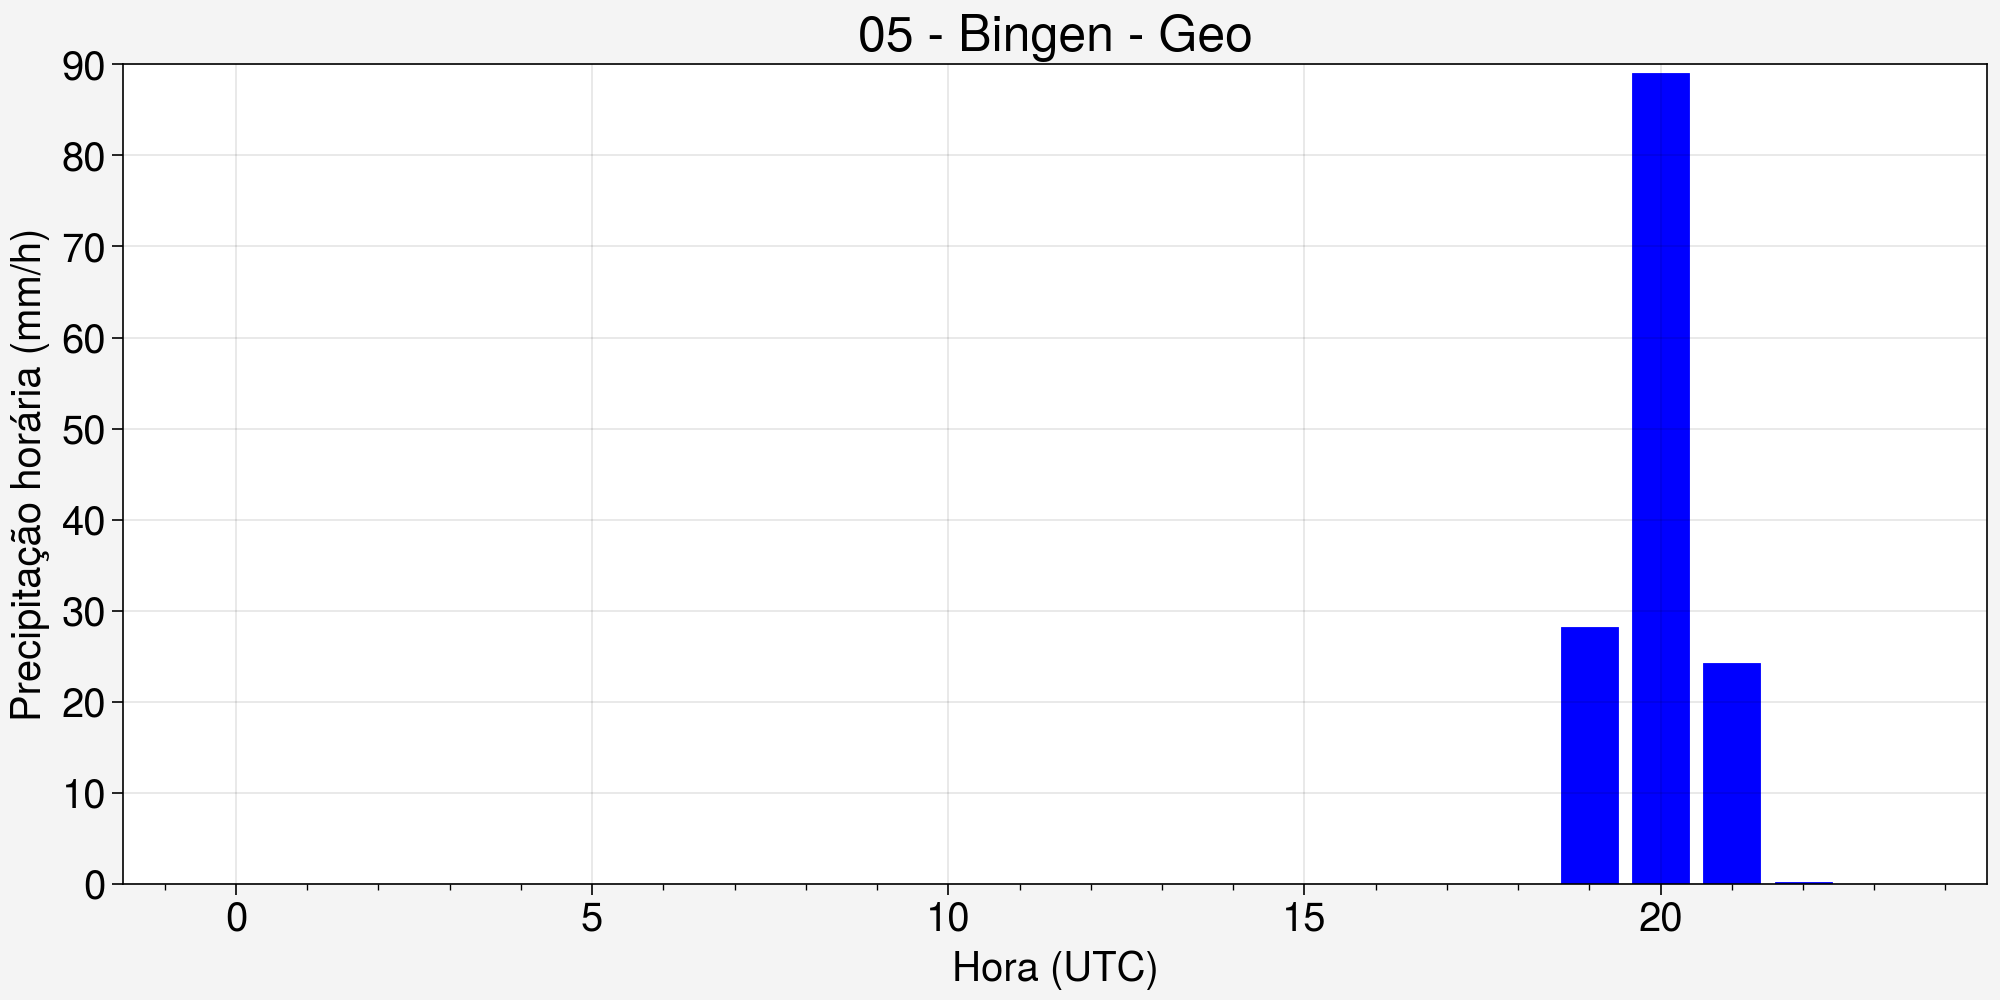

PROCESSANDO--> Estrada do Cantagalo


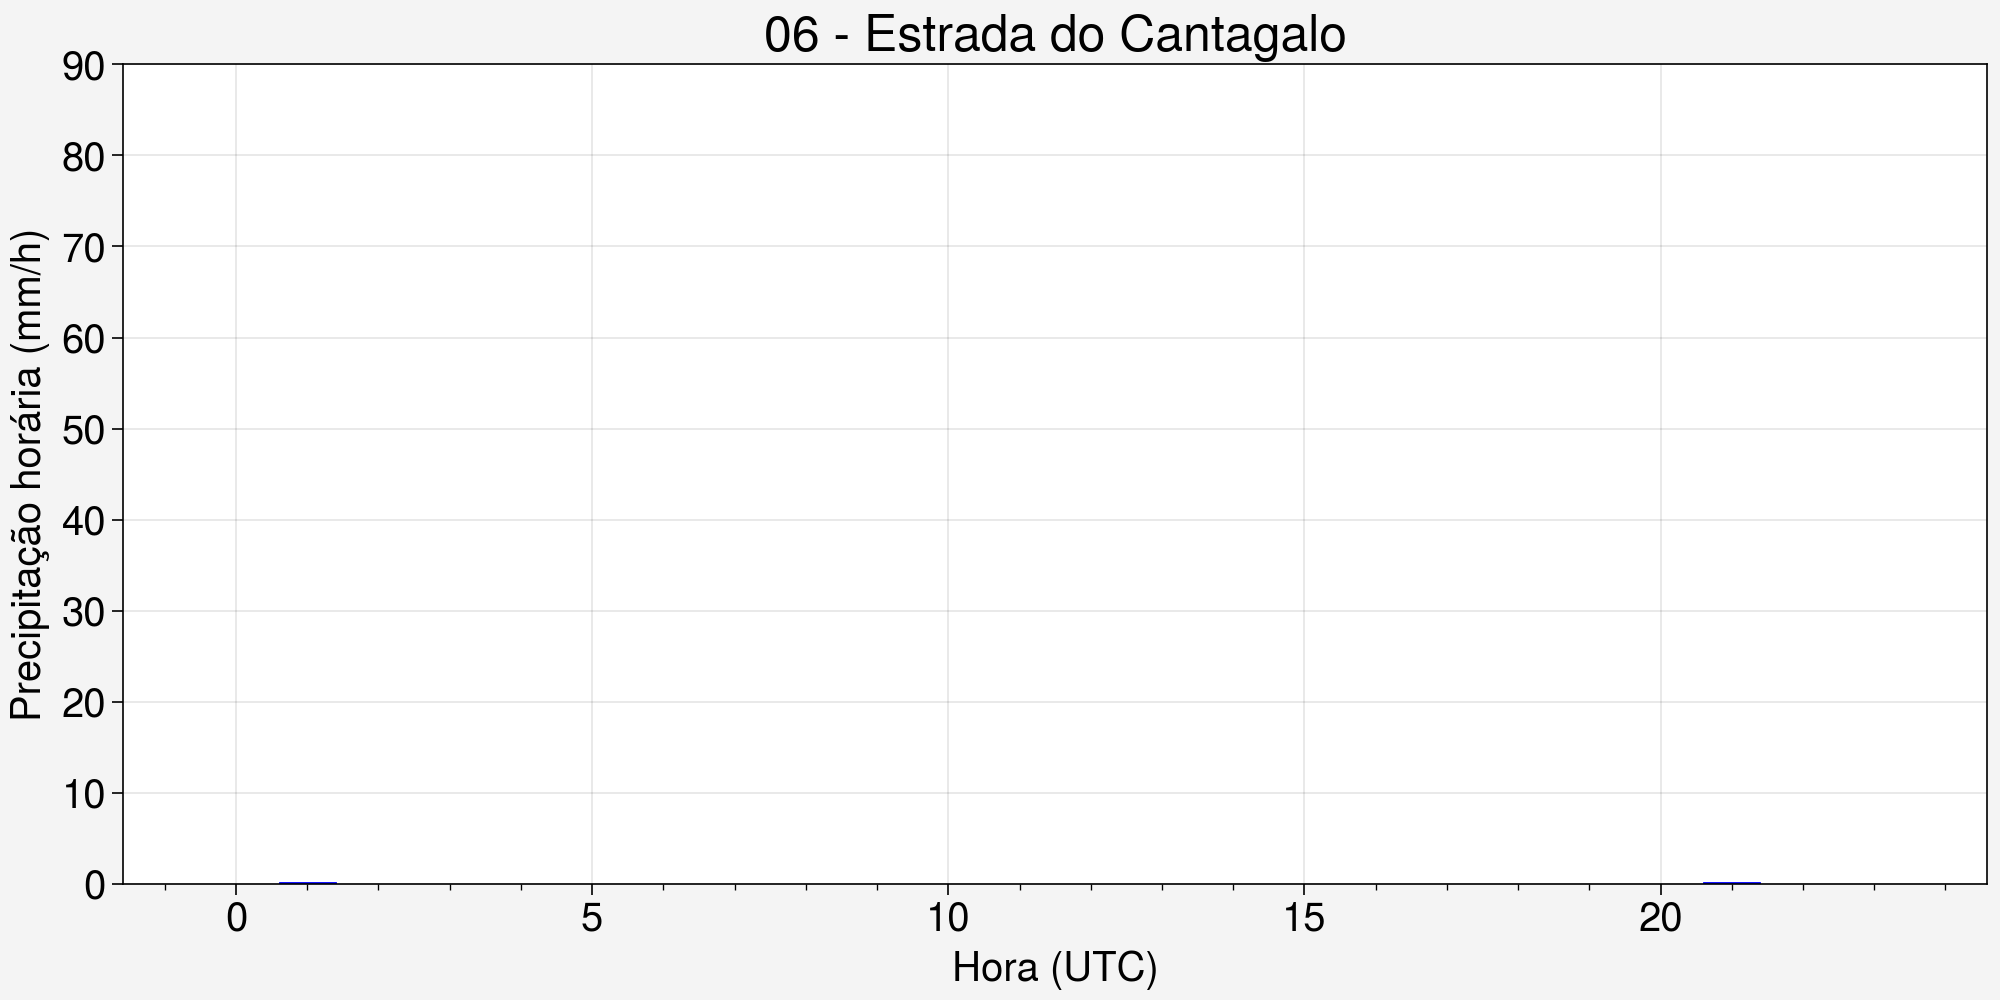

PROCESSANDO--> Estrada Petrópolis/Teresópolis


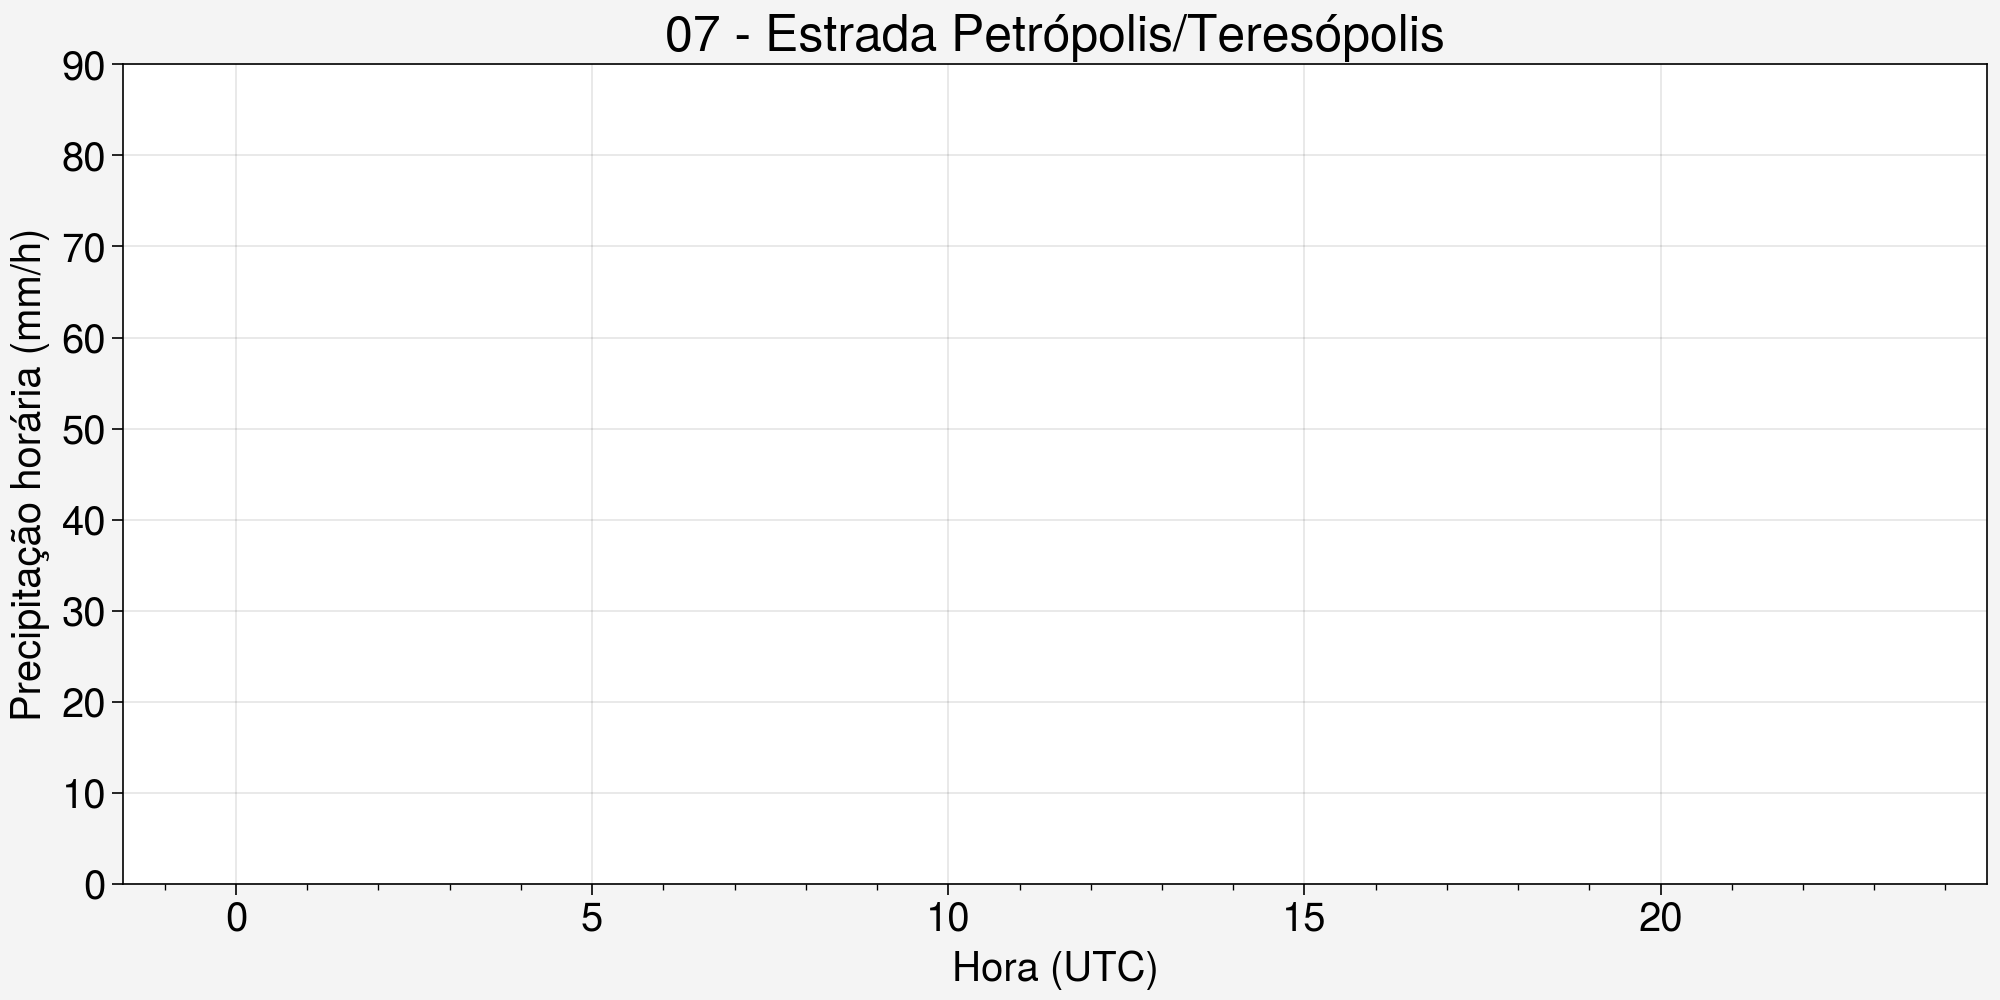

PROCESSANDO--> Vila Constância


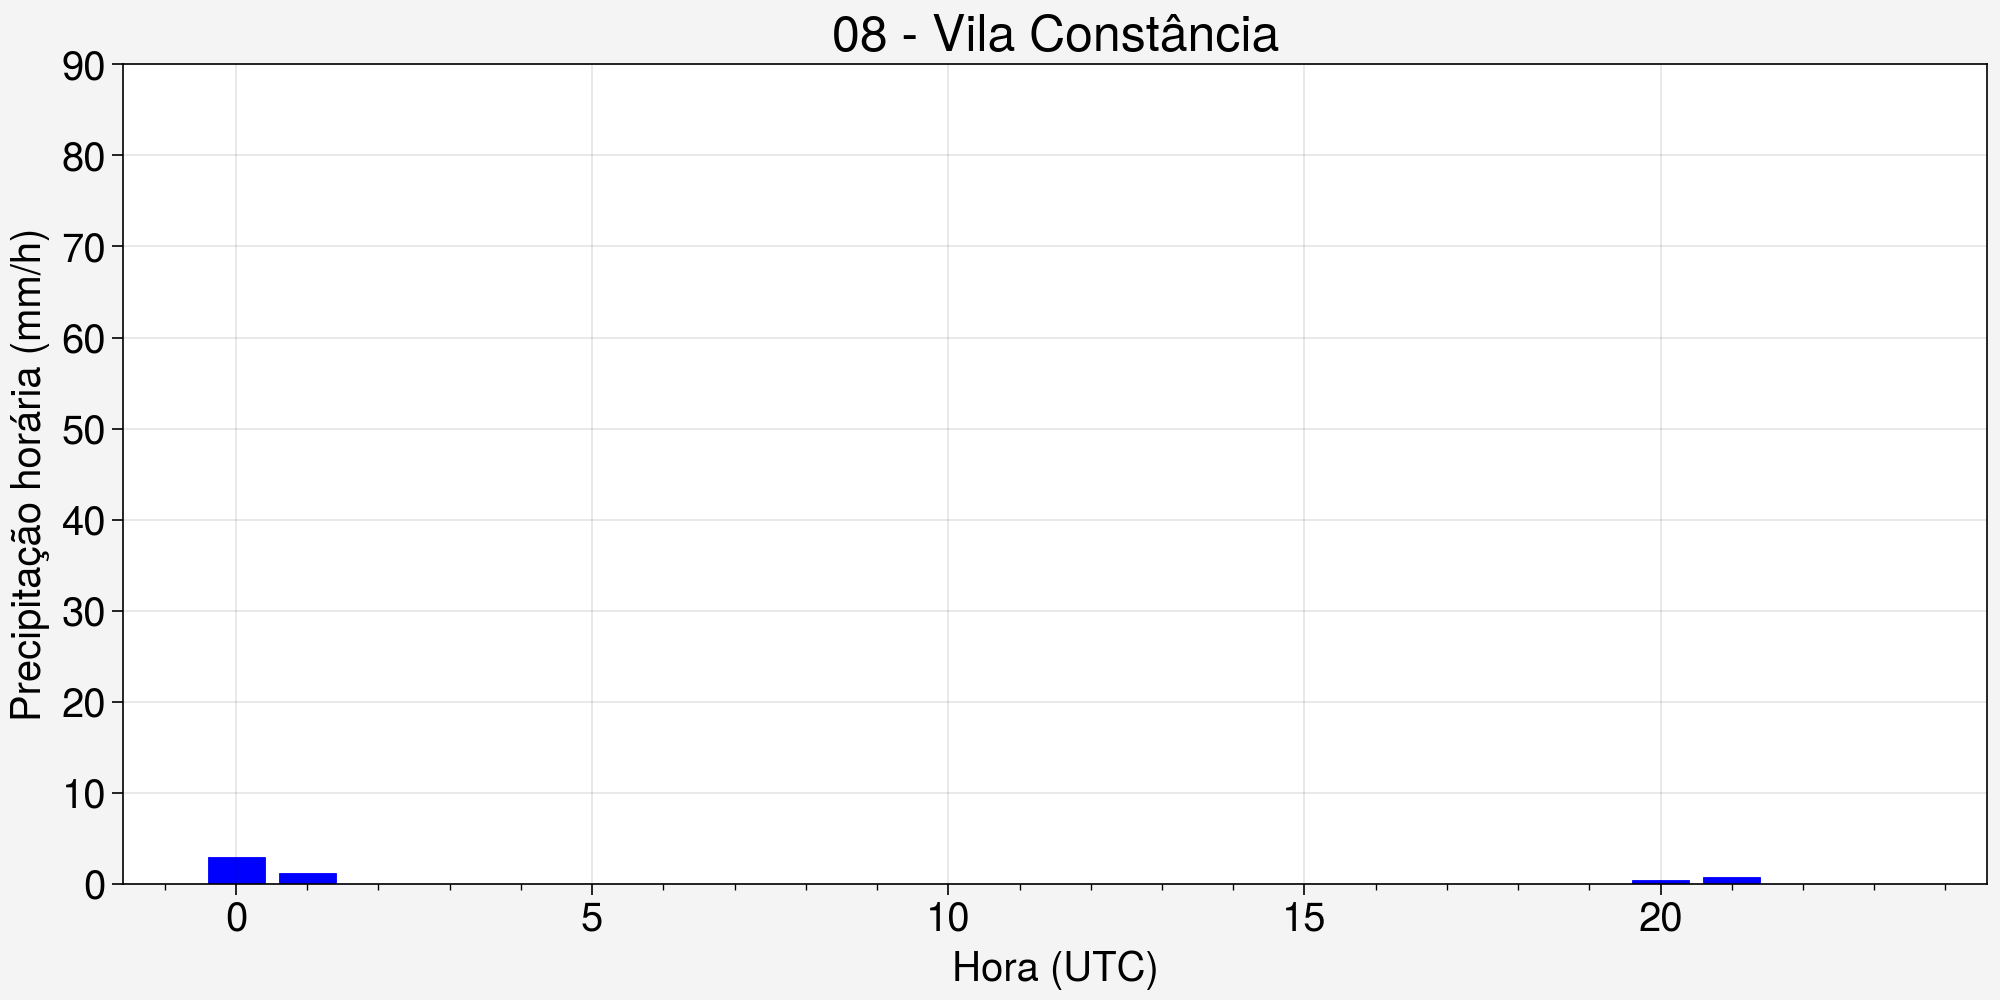

PROCESSANDO--> Itaipava


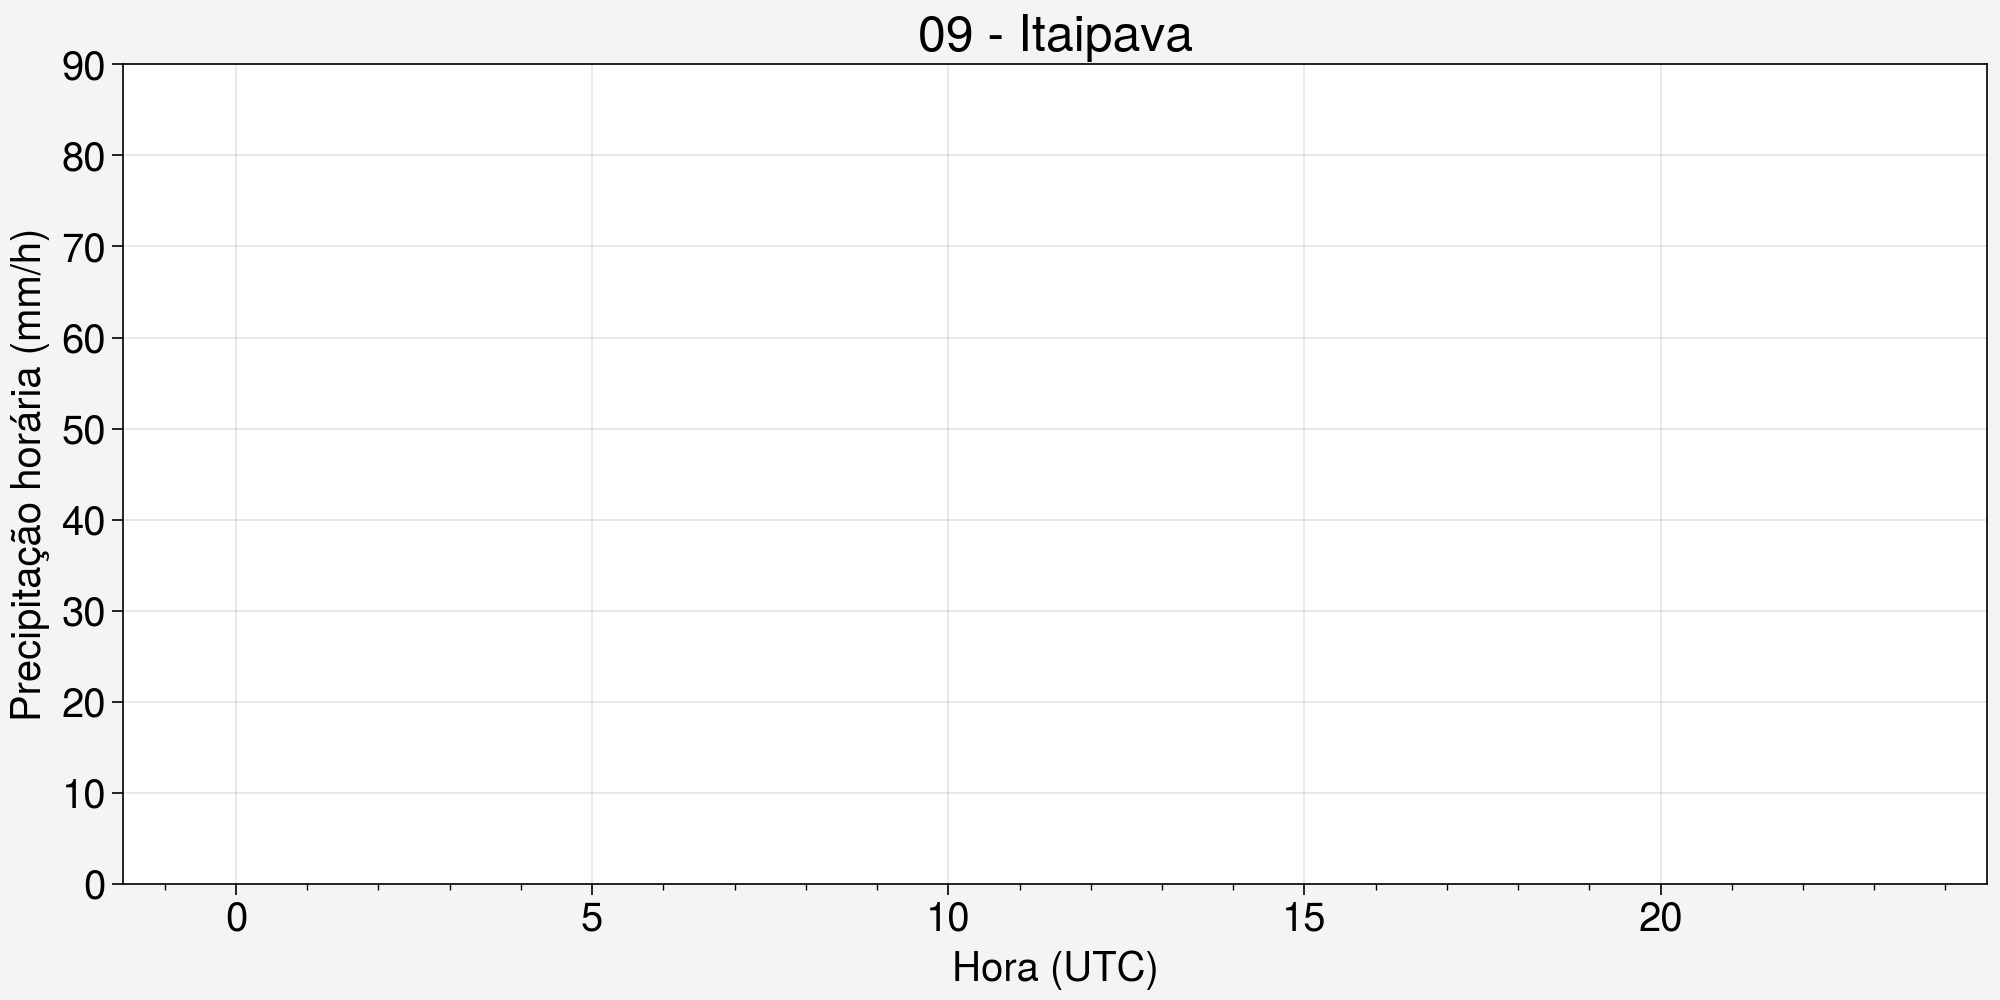

PROCESSANDO--> Independência2


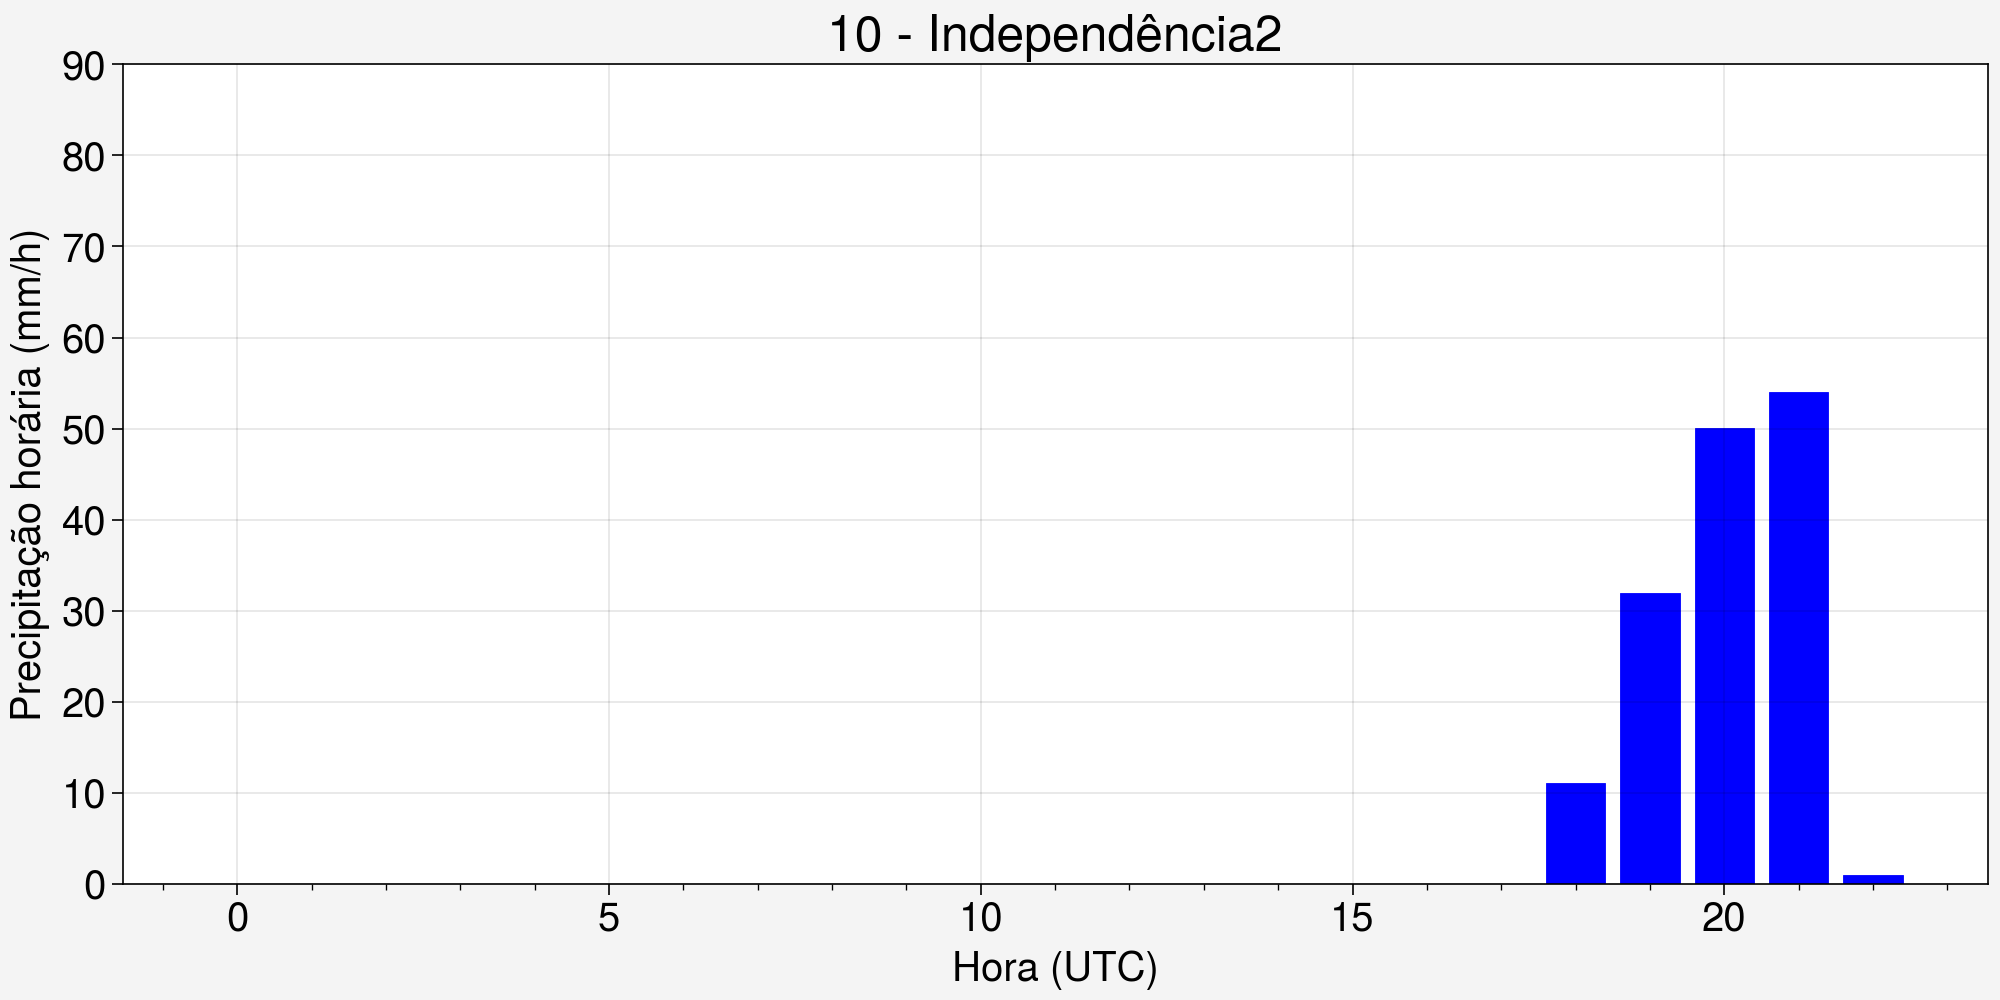

PROCESSANDO--> CIEP Brizolão 281


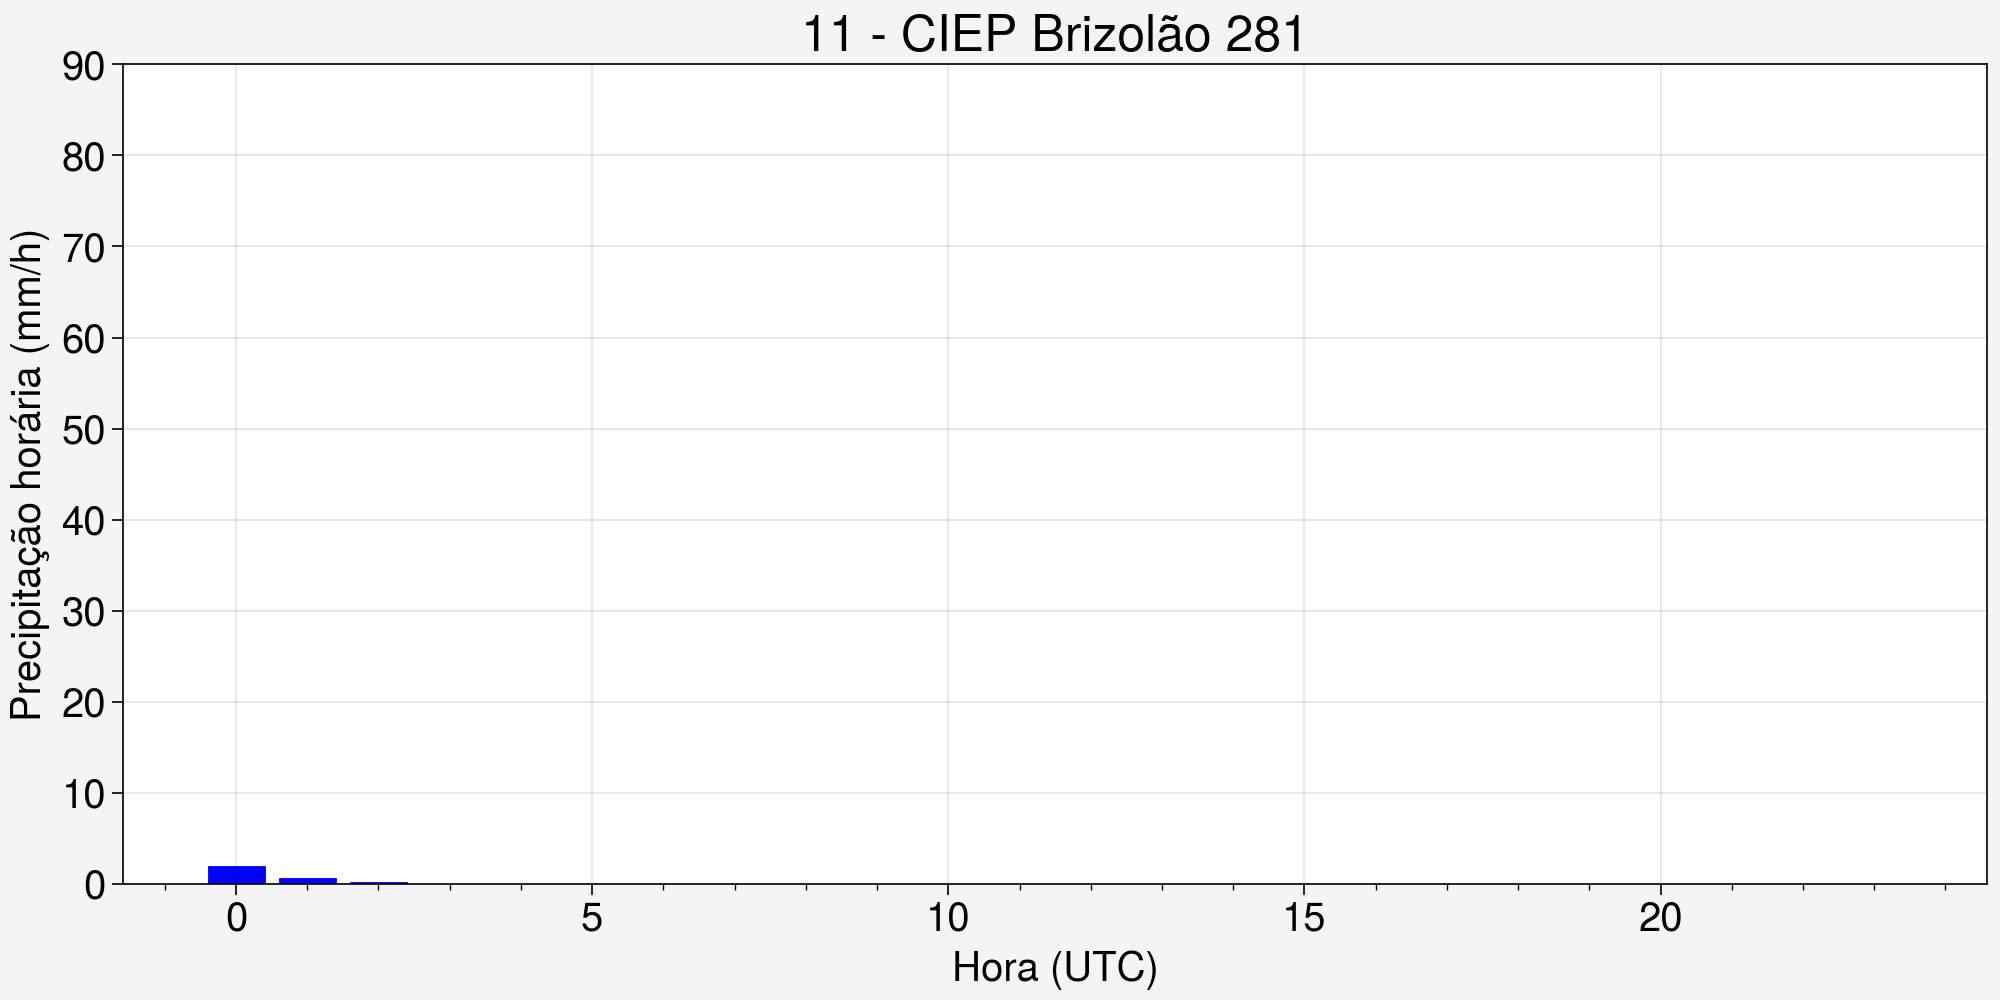

PROCESSANDO--> CIEP Brizolão137


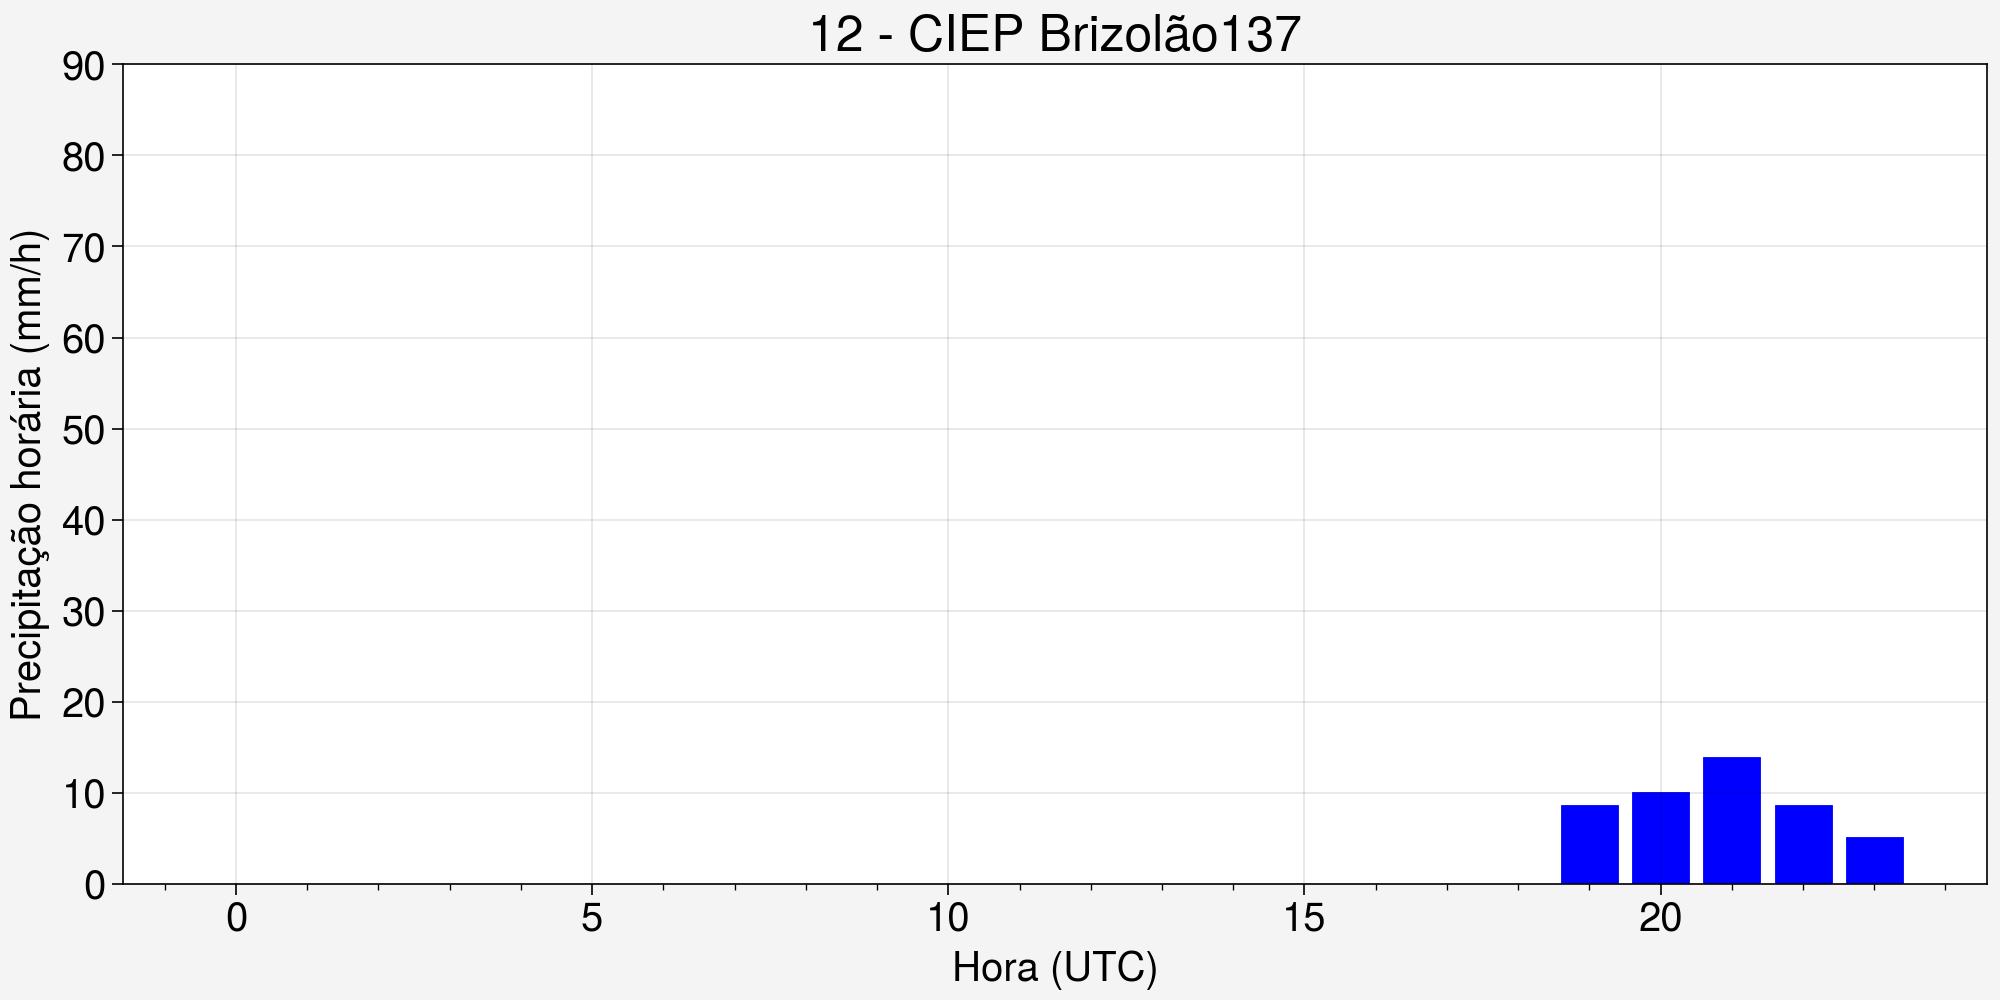

PROCESSANDO--> Vale do Cuiabá


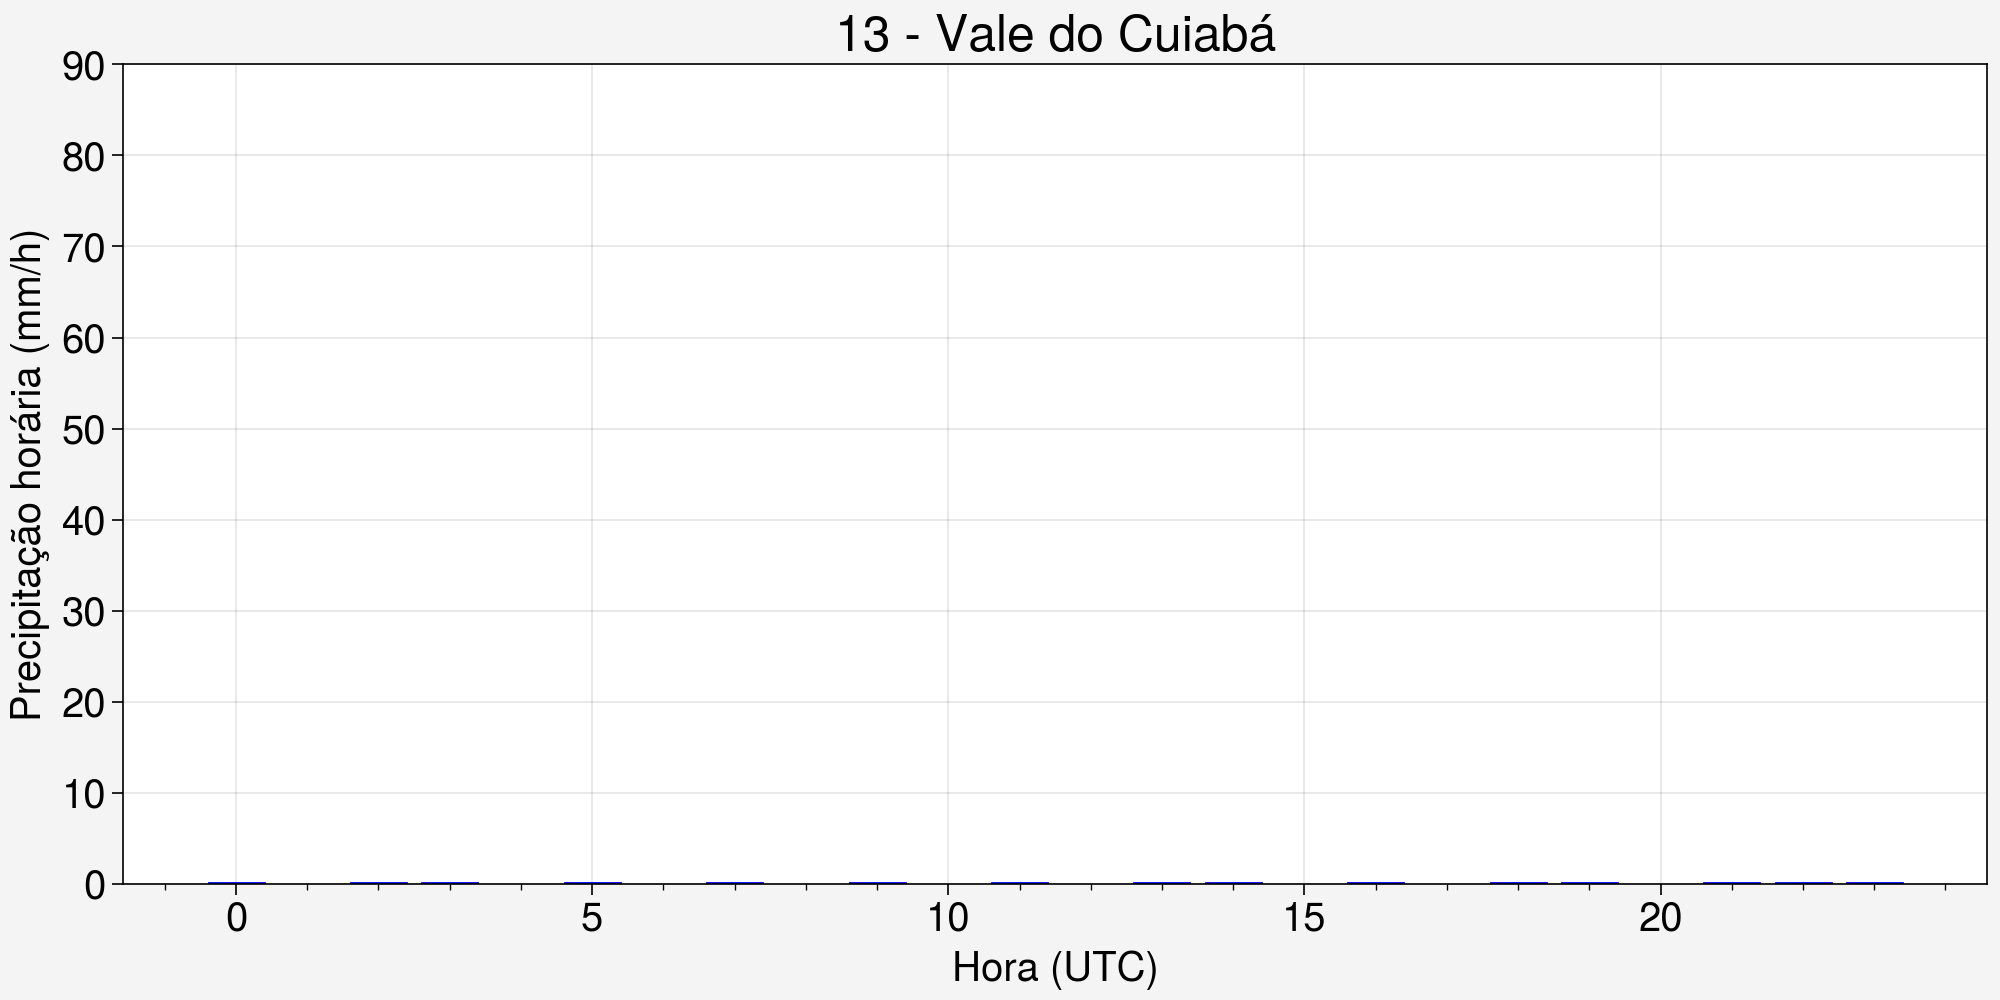

PROCESSANDO--> Rua Araruama/Quitandinha


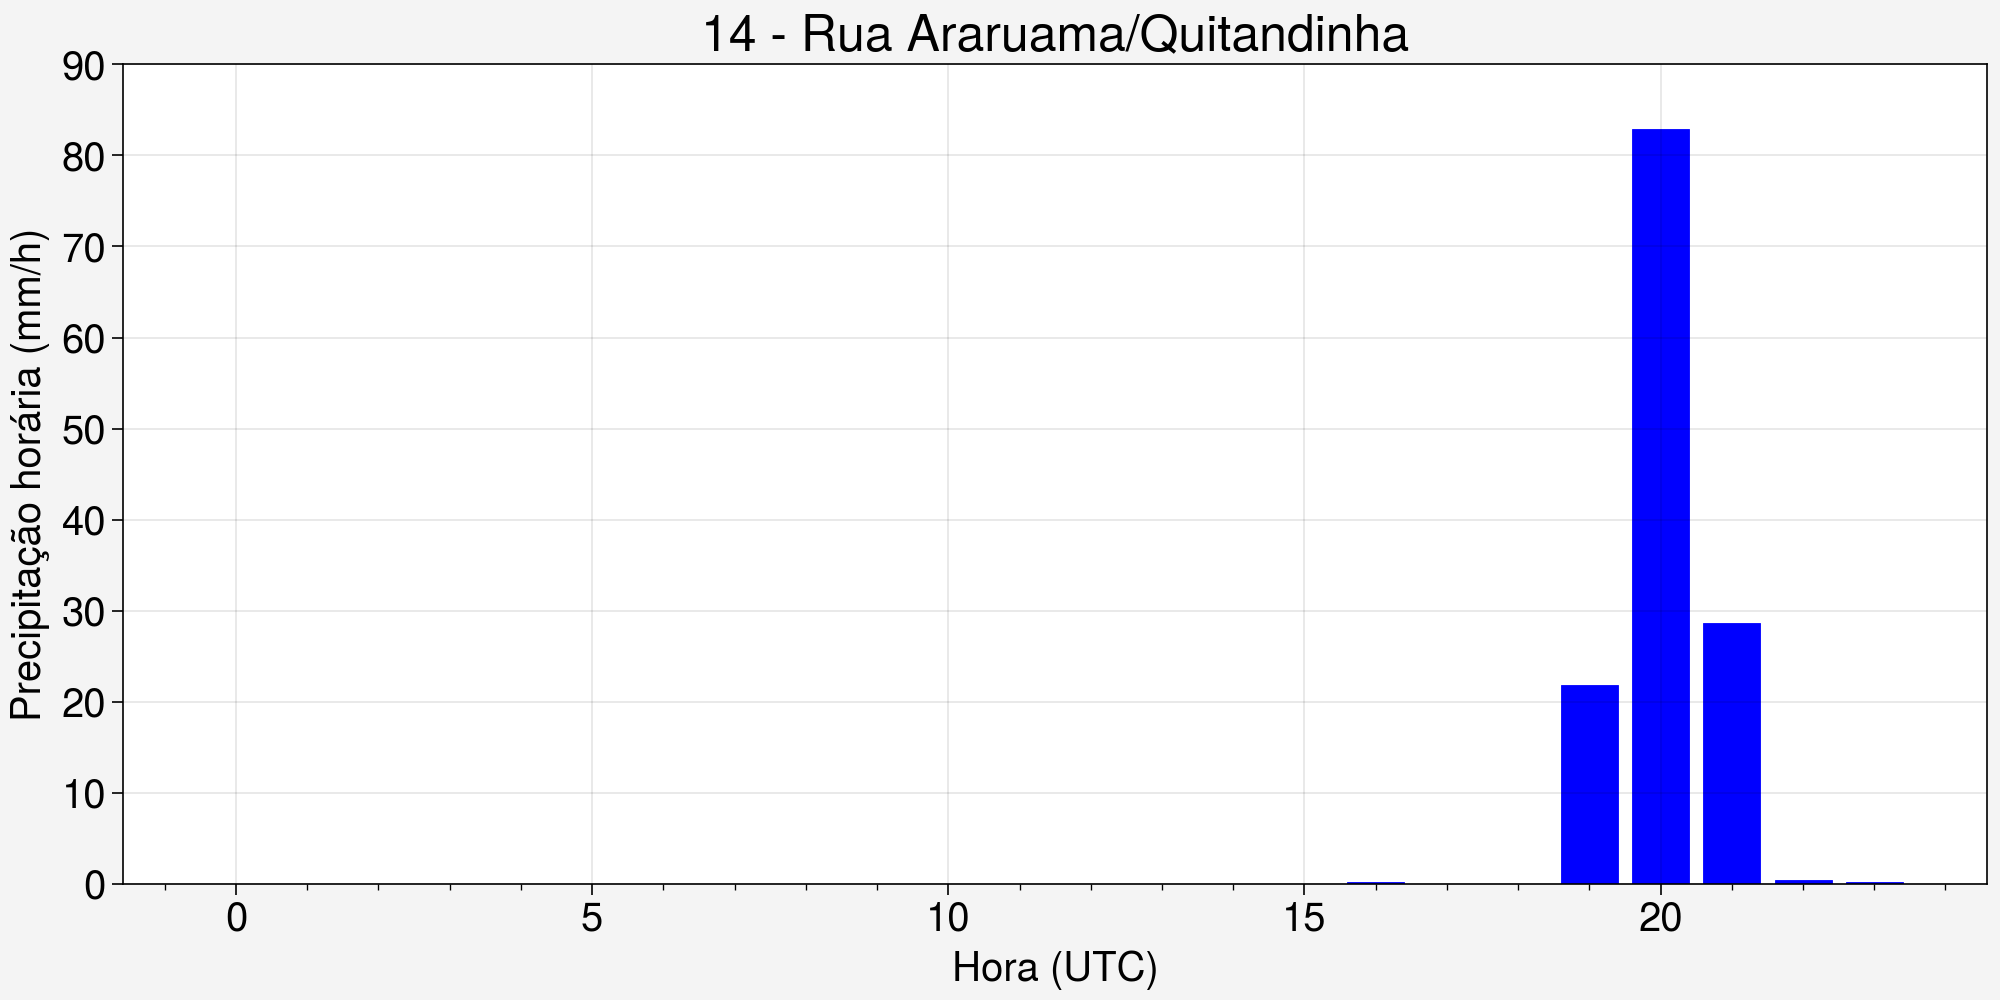

PROCESSANDO--> Rua Amazonas/Quitandinha


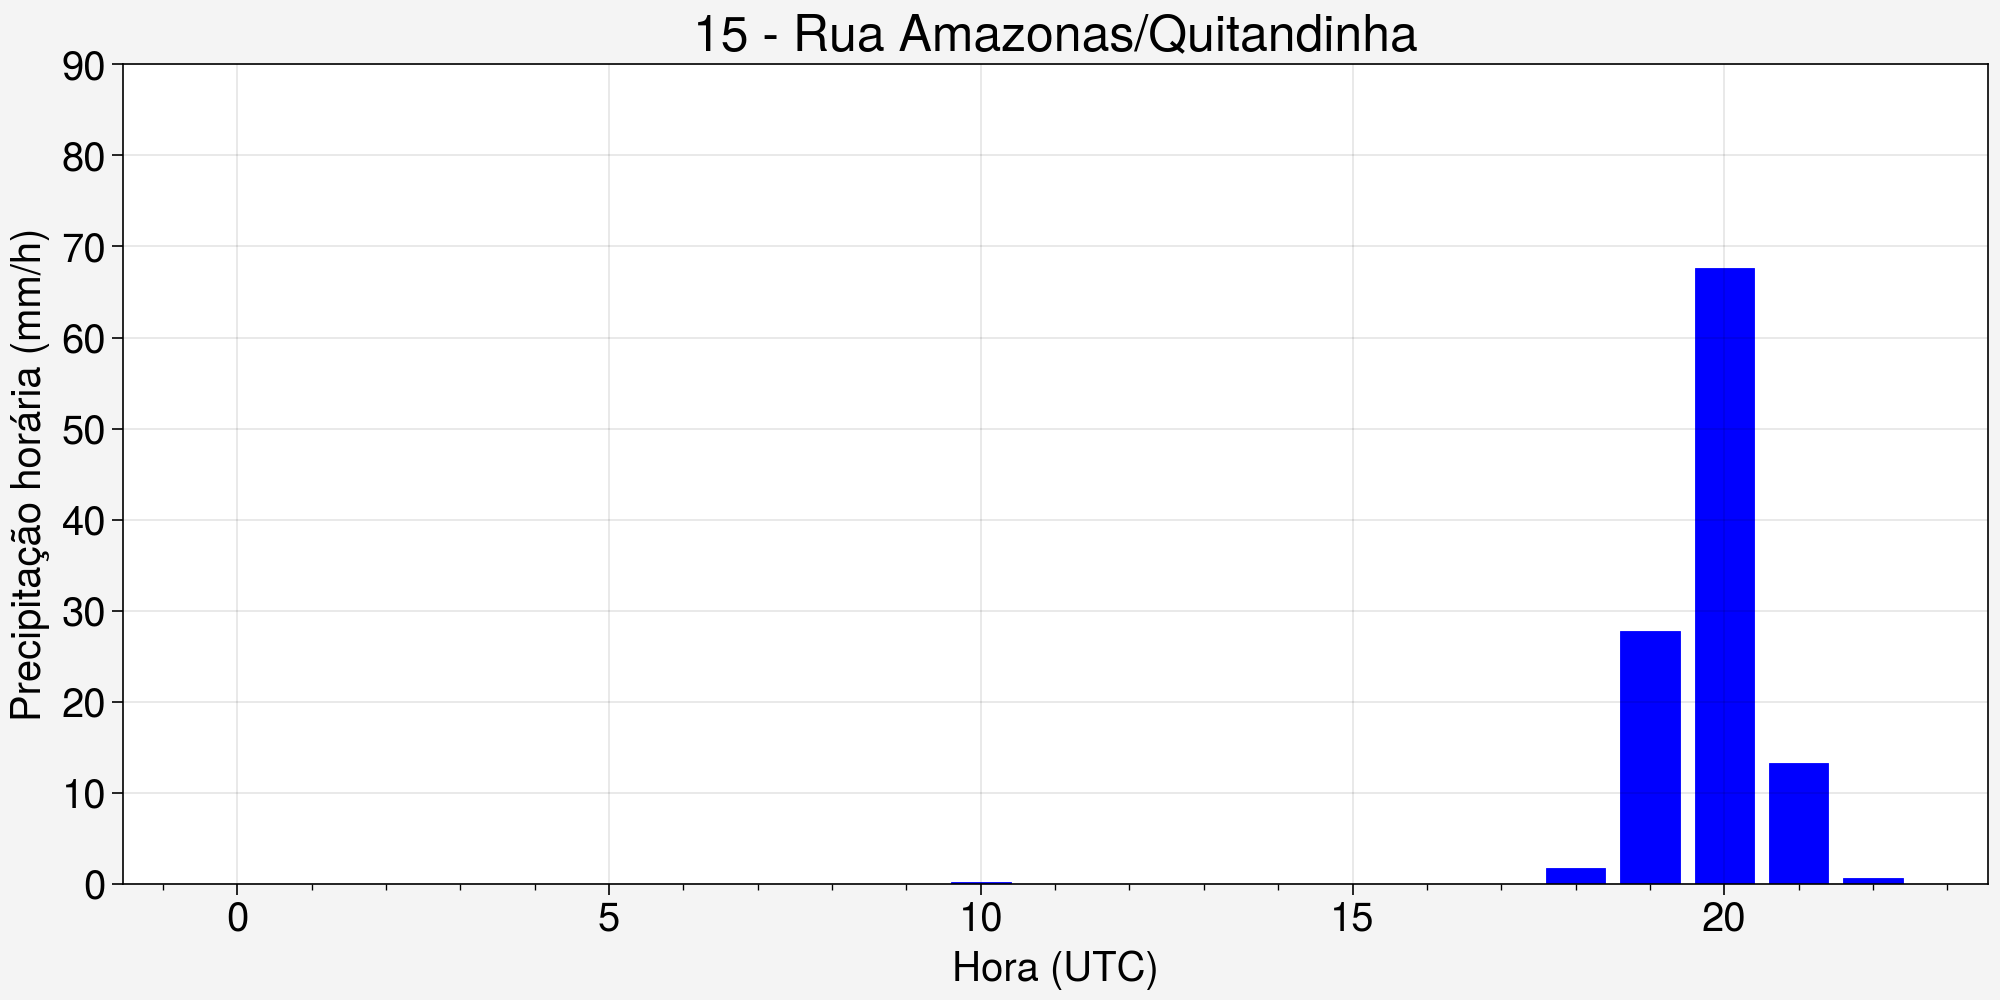

PROCESSANDO--> Morin


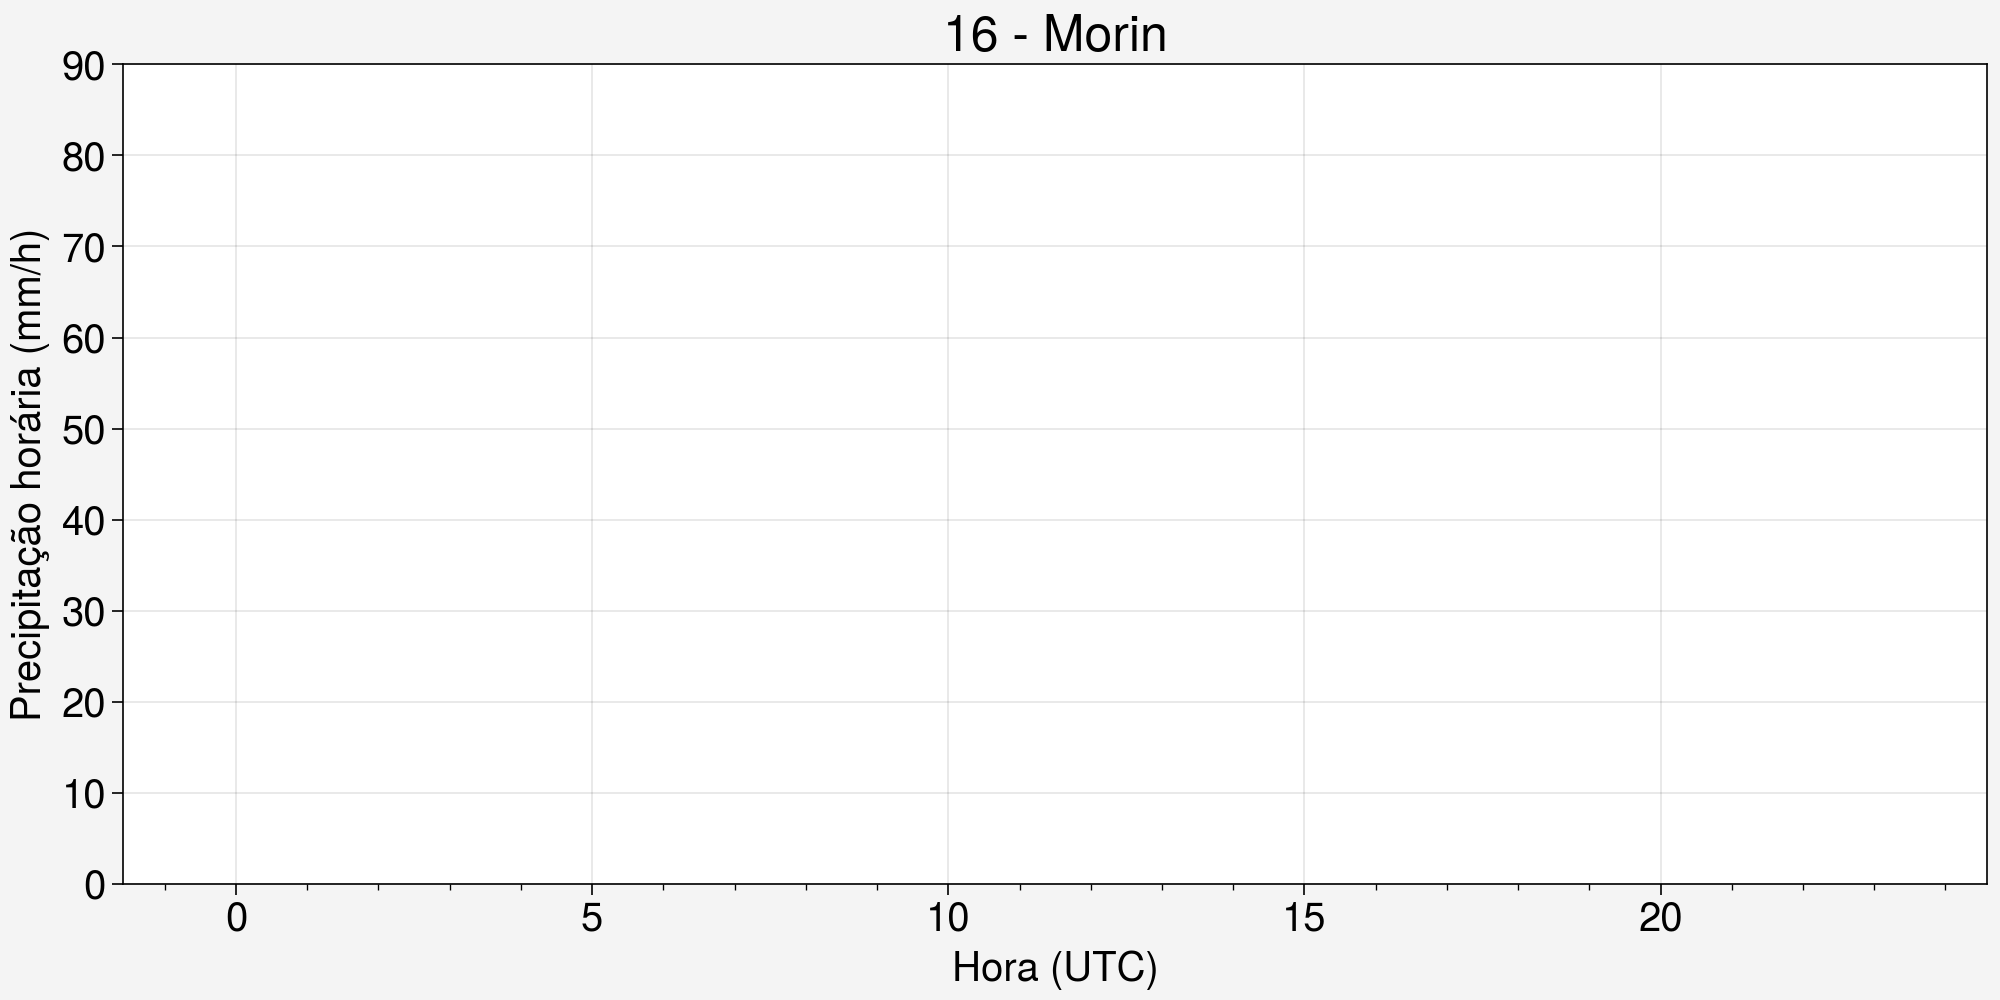

PROCESSANDO--> Itaipava2


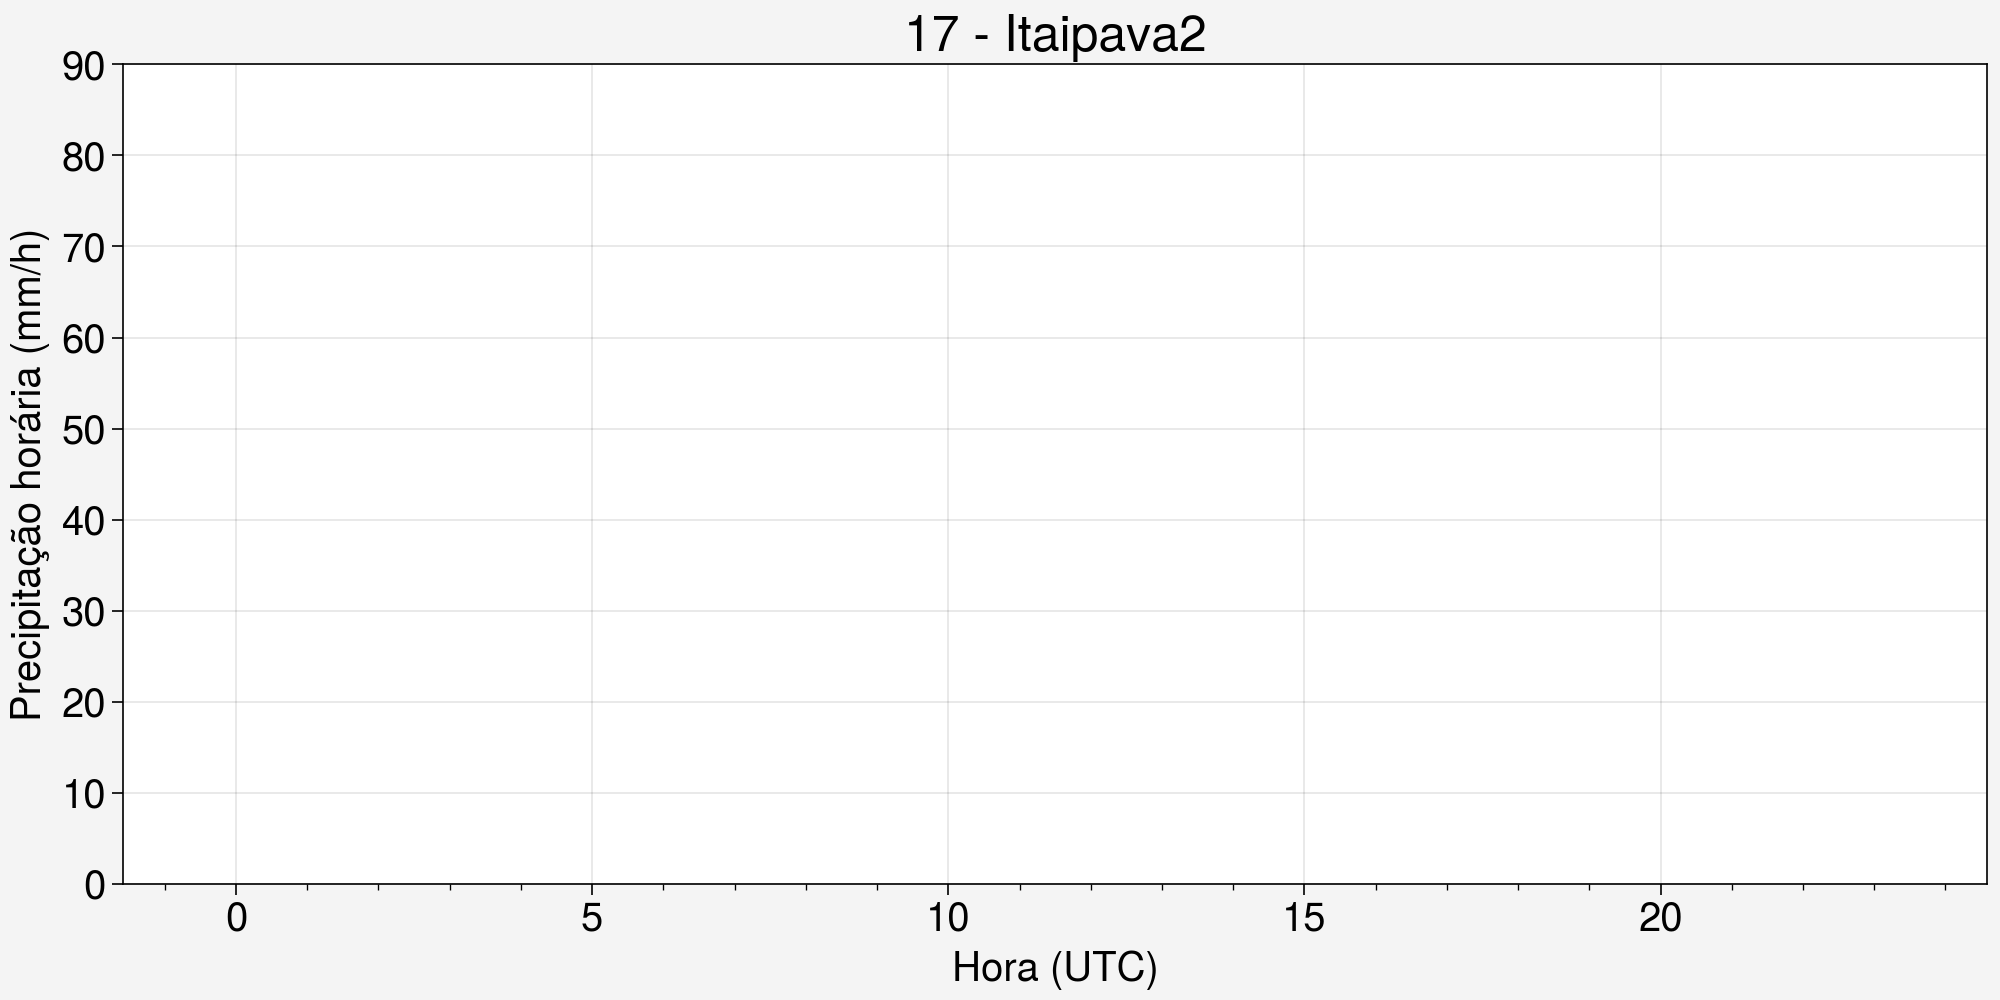

PROCESSANDO--> Pedro do Rio


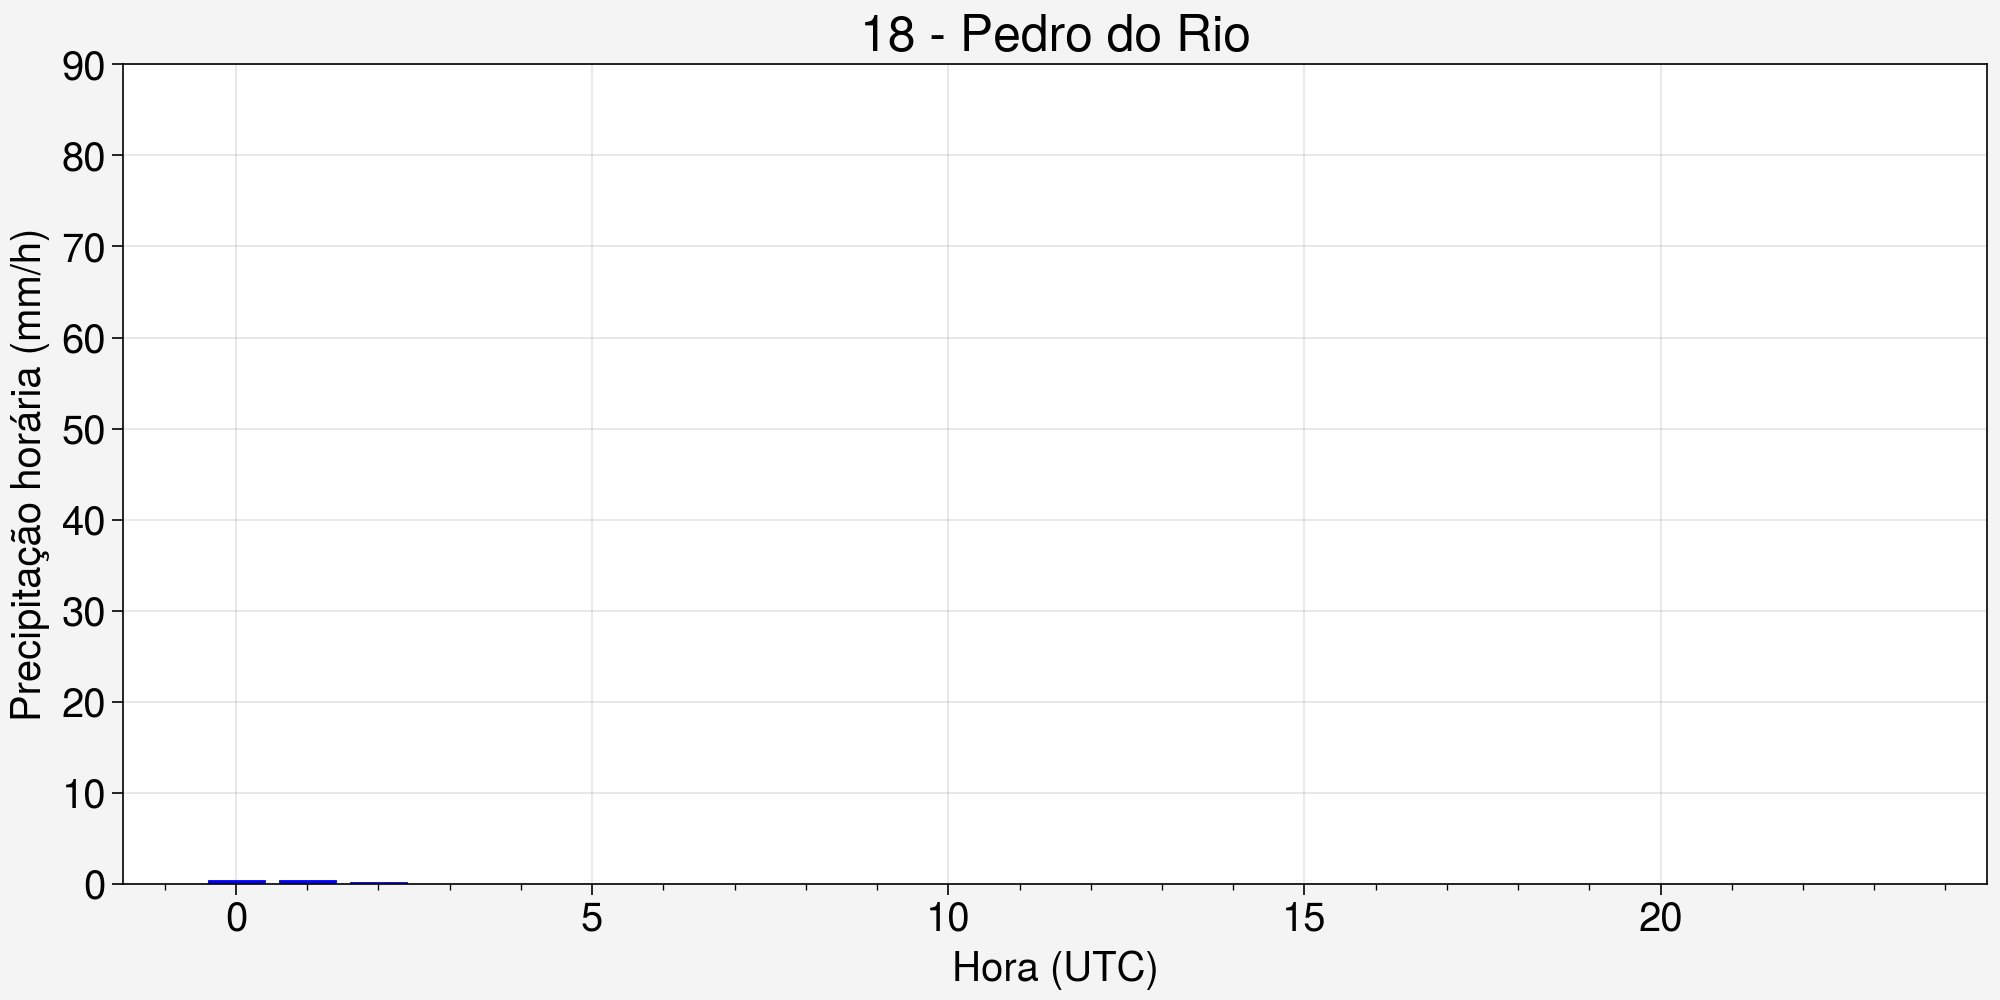

PROCESSANDO--> Estrada da Cachoeira


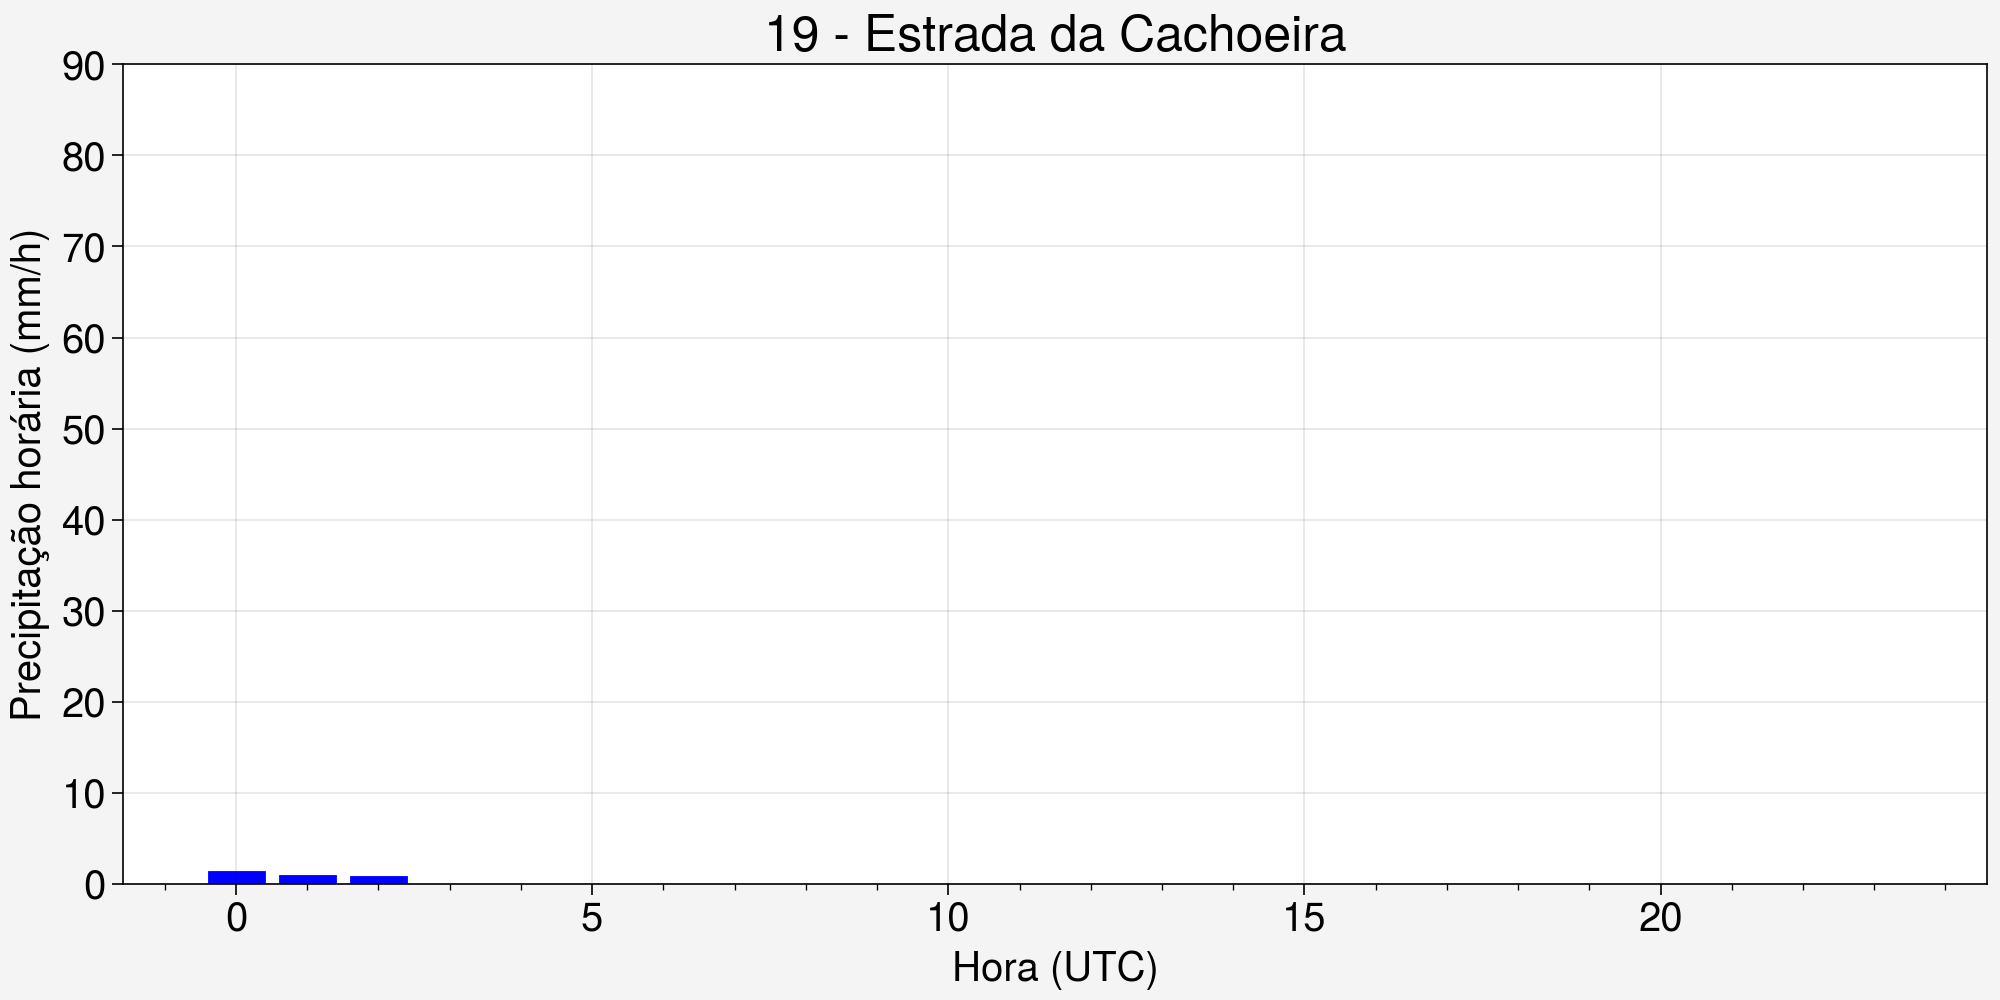

PROCESSANDO--> Mosela


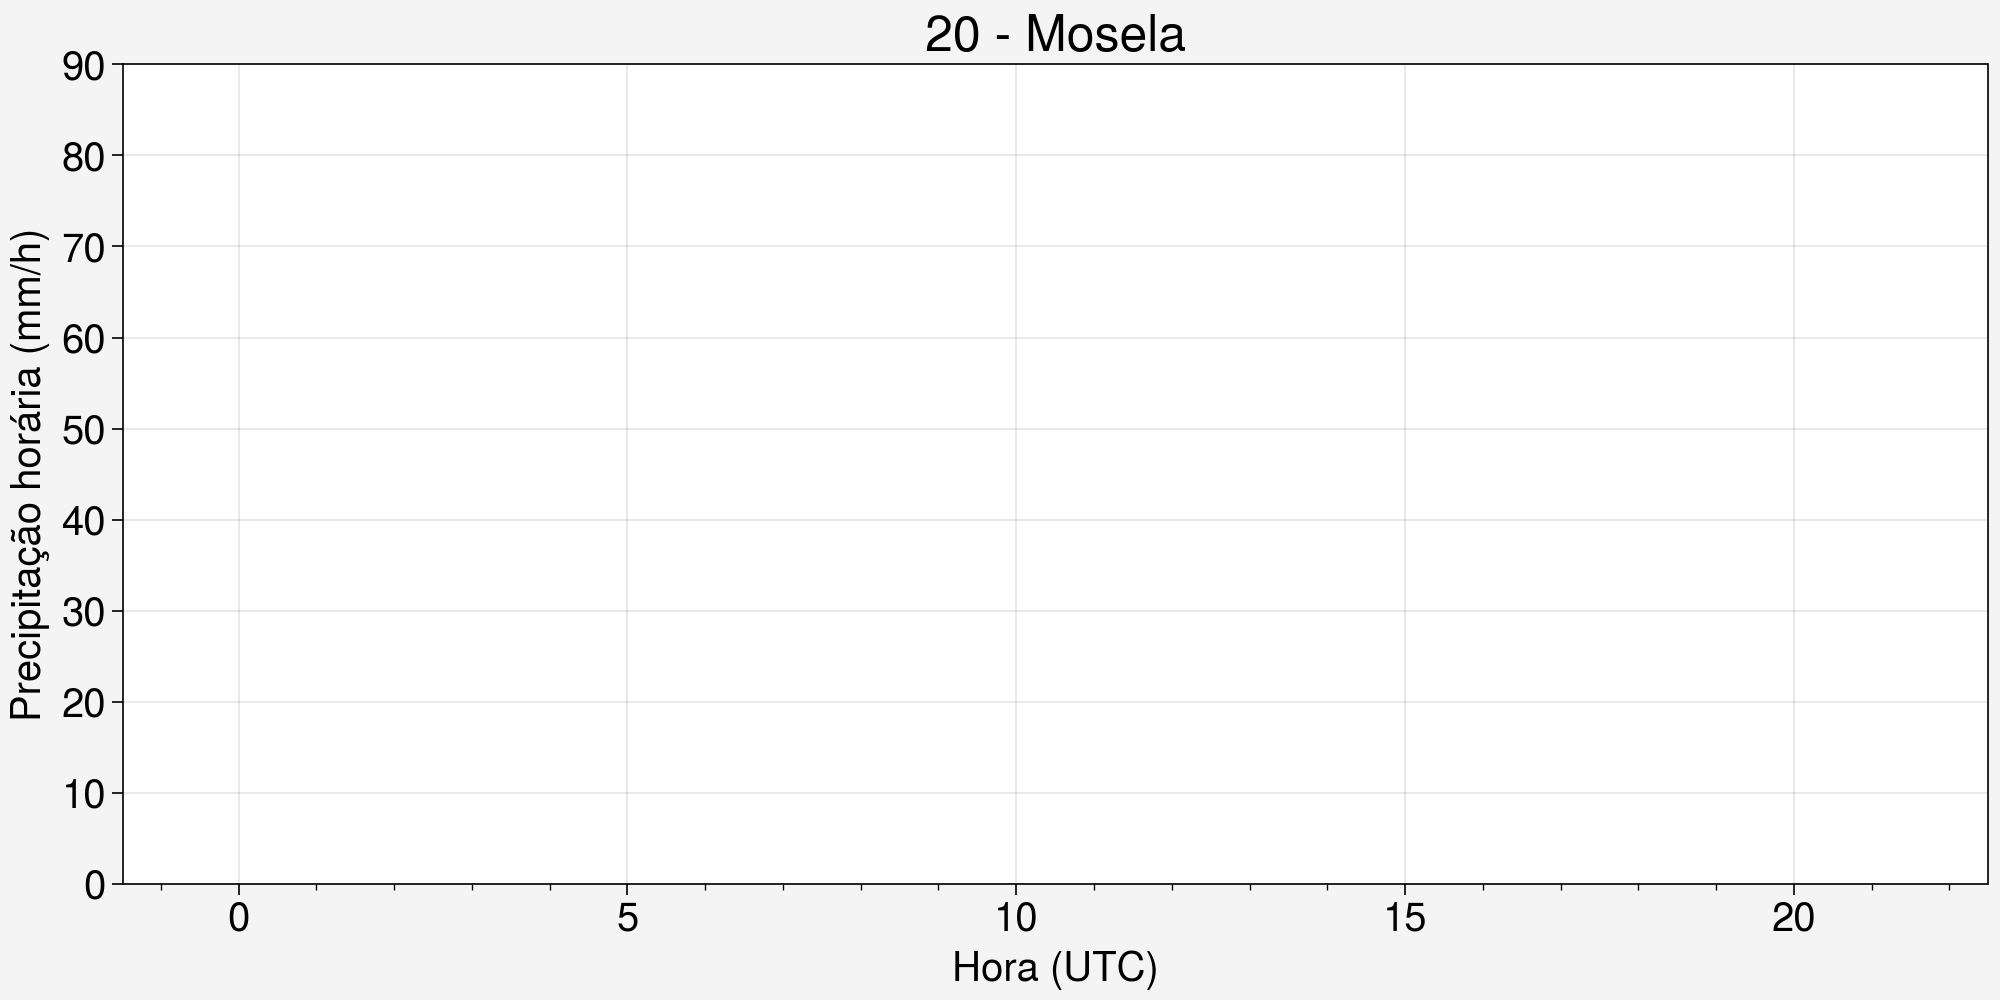

PROCESSANDO--> Vila Rica


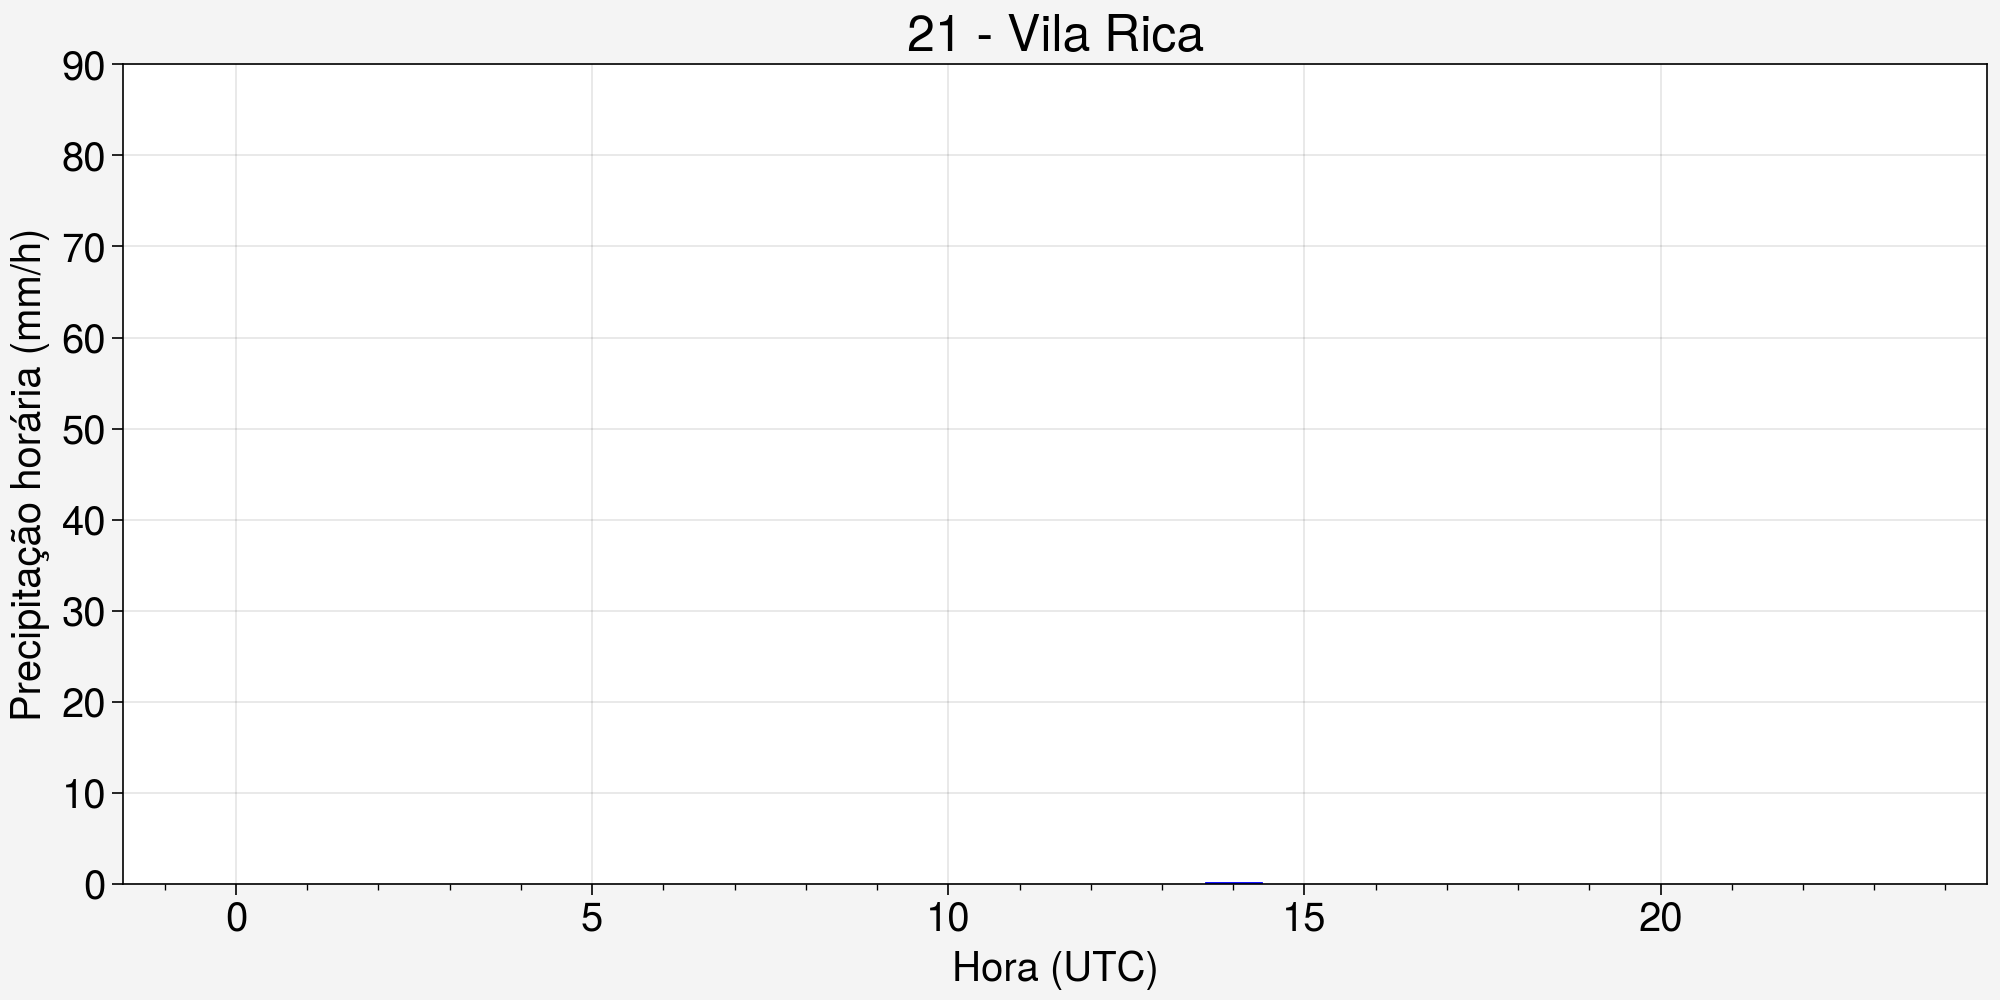

In [100]:
for i, estacao in enumerate(estacoes):

    # exibe o nome da estação
    print('PROCESSANDO-->', estacao)

    # cria a moldura da figura
    fig, ax = plot.subplots(figsize=(10,5), tight=True)

    # extrai o dado daquela estacao
    df_estacao = df[ df['nome_estacao'] == estacao]

    # extrai os dados para o dia 15/fev
    df15 = df_estacao [ df_estacao.index.day == 15]

    # plota gráfico de barras
    ax.bar(df15['chuva'].groupby(pd.Grouper(freq='1H')).sum().index.hour, df15['chuva'].groupby(pd.Grouper(freq='1H')).sum(), color='blue')

    # formato dos eixos
    ax.format(title=f'{str(i+1).zfill(2)} - {estacao}',
              xlabel='Hora (UTC)',
              ylabel='Precipitação horária (mm/h)',
              small='20px',
              large='25px',
              xrotation=0,
              xtickminor=True,
              ytickminor=False,
              ylim=(0,90))

    # salva figura
    name = estacao.replace('/','_')
    fig.save(f'{dir}output/4_chuva_por_hora/Fig5_horario_{str(i+1).zfill(2)}_{name}.png', dpi=300)

    # exibe figura na tela
    plot.show()

# **PARTE 7:** Gráfico mensal + diário + horário

In [101]:
# tabela com os dados de 2022 completo das 21 estações
df_2022

municipio  uf       nome_estacao        lat        lon  \
data                                                                           
2022-01-01 00:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 00:20:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:00:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:10:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
2022-01-01 01:40:00  PETRÓPOLIS  RJ  Quitandinha - Geo -22.524907 -43.223916   
...                         ...  ..                ...        ...        ...   
2022-12-31 19:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 20:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 21:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 22:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   
2022-12-31 23:00:00  PETRÓPOLIS  RJ          Vila Rica -22.349000 -43.132000   

                     chuva  
data                        
2022-01-01 00:10:00    0.0  
2022-01-01 00:20:00    0.2  
2022-01-01 01:00:00    0.2  
2022-01-01 01:10:00    0.2  
2022-01-01 01:40:00    0.2  
...                    ...  
2022-12-31 19:00:00    0.0  
2022-12-31 20:00:00    0.0  
2022-12-31 21:00:00    0.0  
2022-12-31 22:00:00    0.0  
2022-12-31 23:00:00    0.0  

[239176 rows x 6 columns]

In [102]:
# nome das estações escolhidas
nome_estacoes_escolhidas

['São Sebastião - Geo',
 'Quitandinha - Geo',
 'Dr. Thouzet - Geo',
 'Bingen - Geo',
 'Rua Araruama/Quitandinha',
 'Independência2',
 'Rua Amazonas/Quitandinha']

Eliminando a estação "Dr. Thouzet - Geo", porque esta estação não tem os dados de setembro-dezembro/2022

In [103]:
# copia a lista das estações numa nova variável
nome_estacoes_escolhidas2 = nome_estacoes_escolhidas.copy()

# estações a serem removidas
stations_to_remove = ['Dr. Thouzet - Geo','Independência2']

# create new list using list comprehension
nome_estacoes_escolhidas2 = [i for i in nome_estacoes_escolhidas2 if i not in stations_to_remove]

# exibe na tela
print(nome_estacoes_escolhidas2)

['São Sebastião - Geo', 'Quitandinha - Geo', 'Bingen - Geo', 'Rua Araruama/Quitandinha', 'Rua Amazonas/Quitandinha']


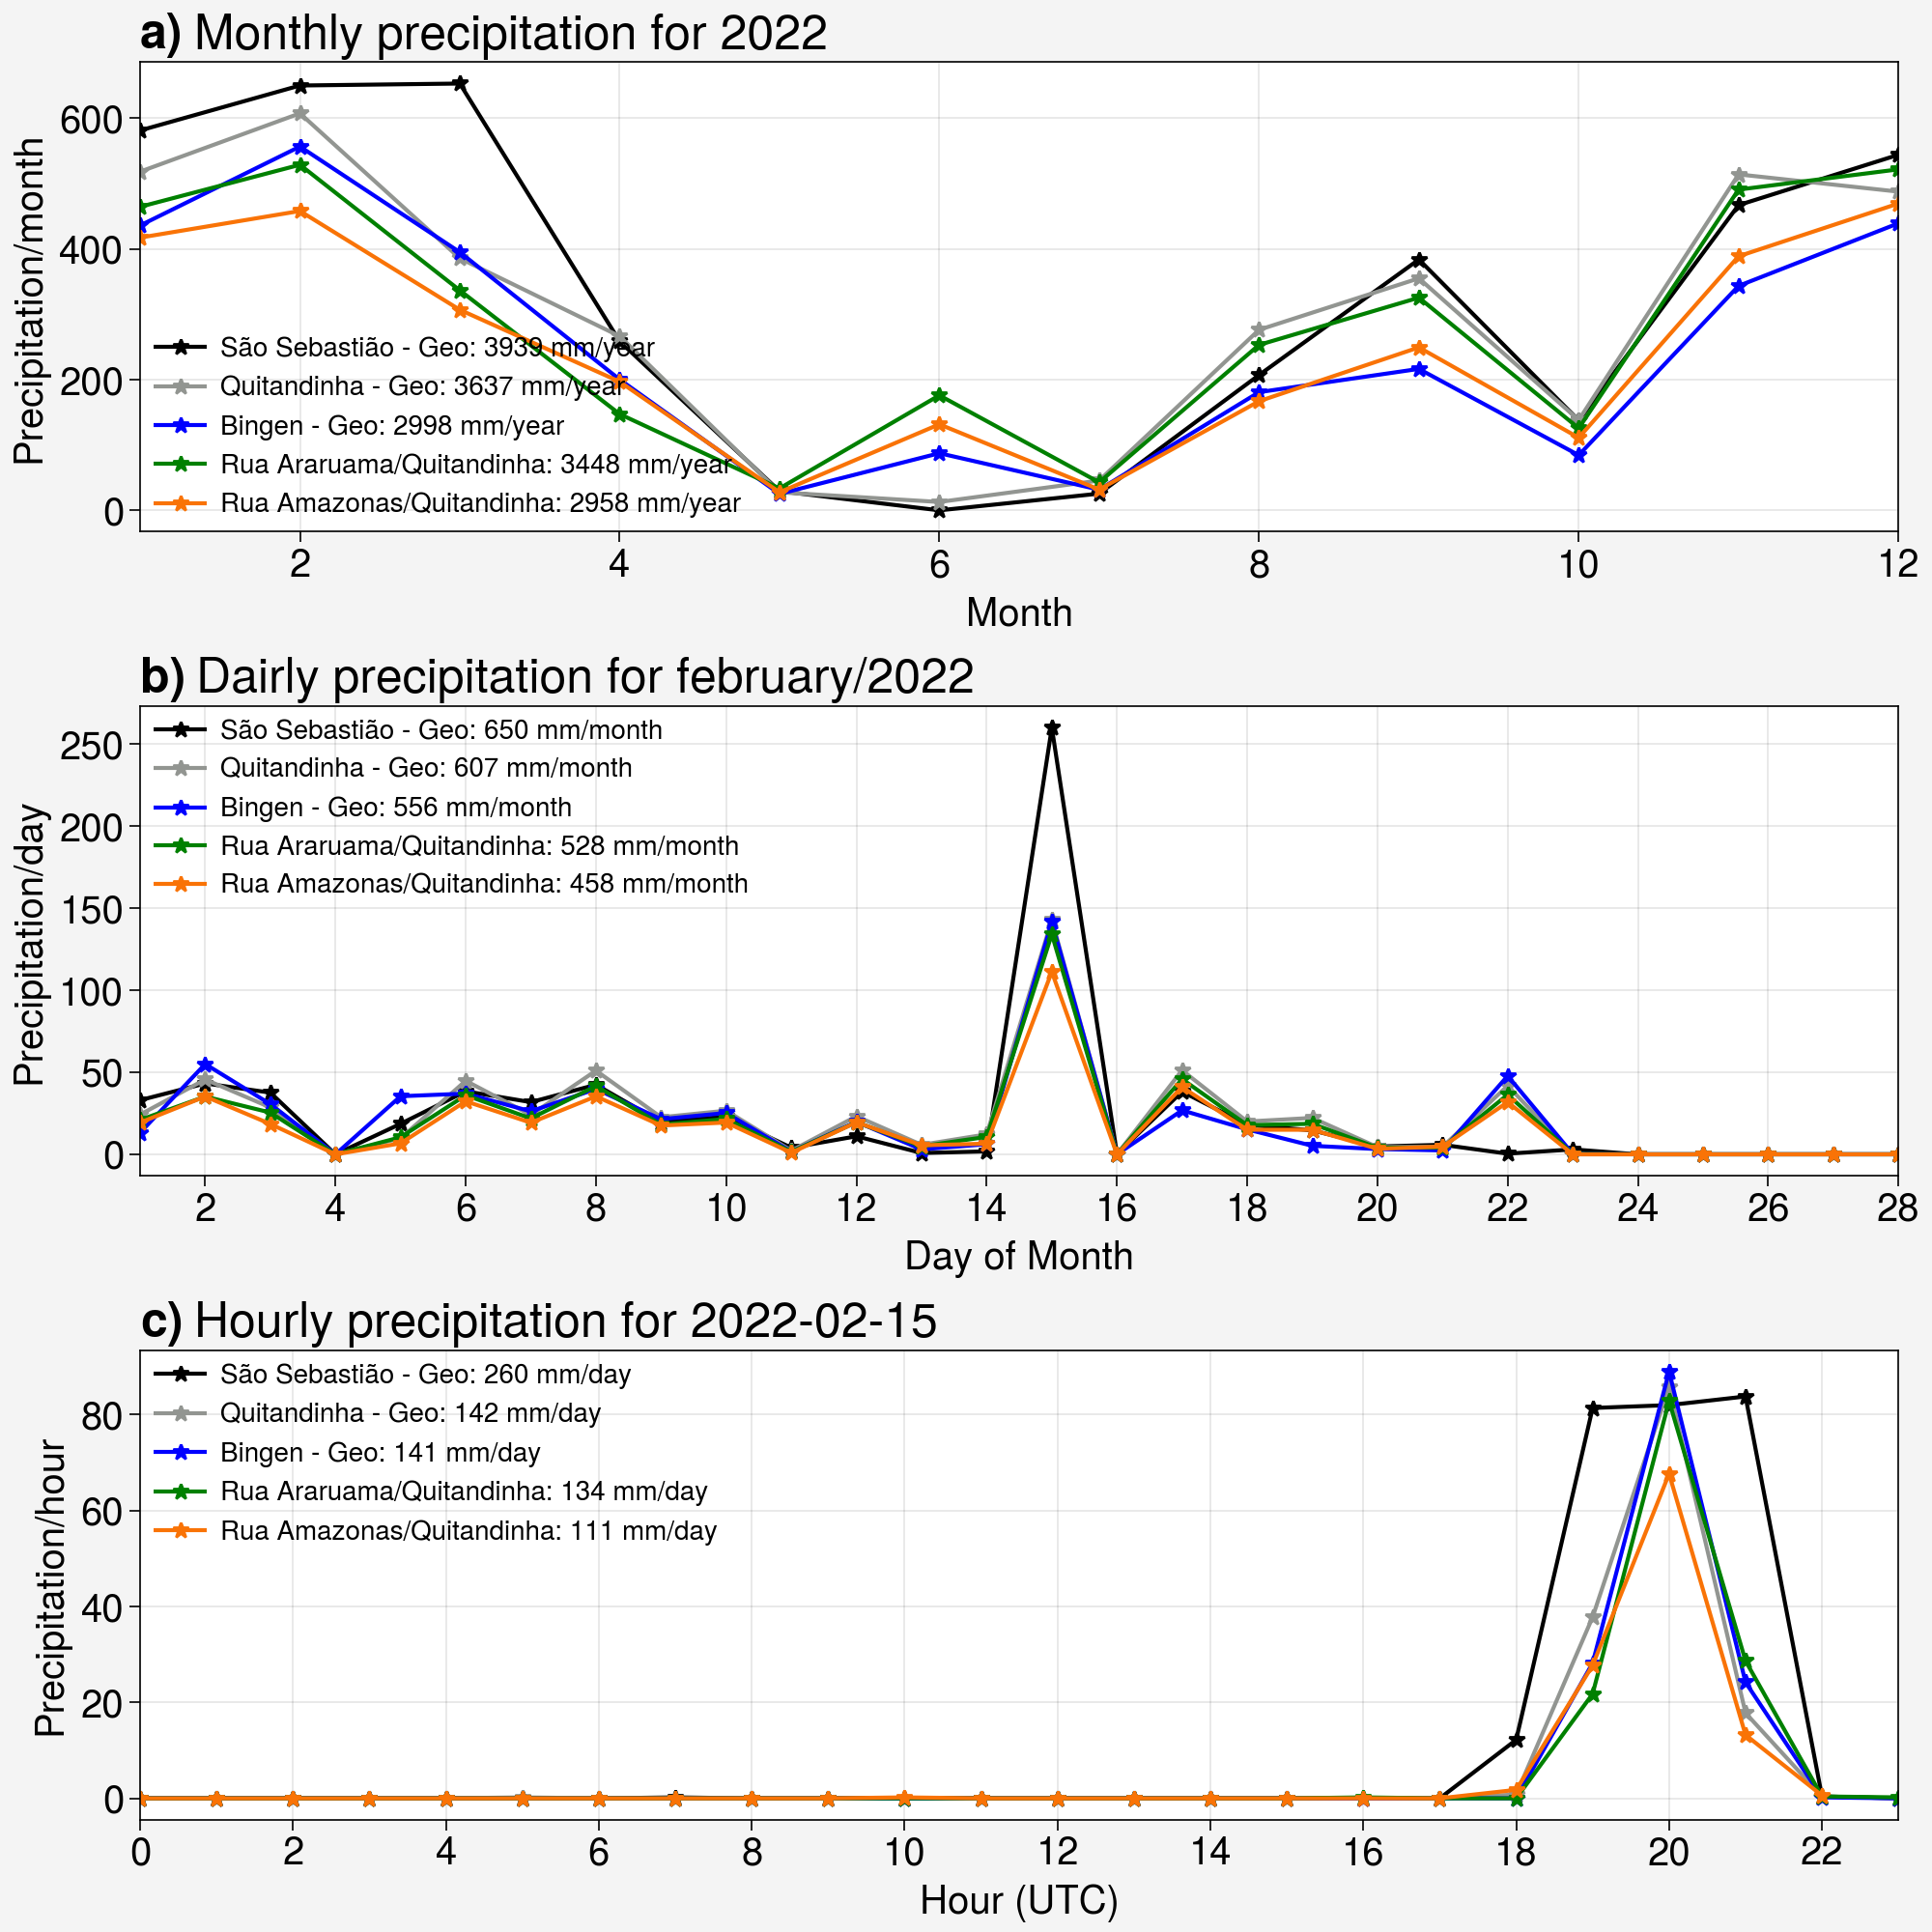

In [104]:
# cores das curvas das estações no gráfico
cor = ['black', 'gray', 'blue', 'green', 'orange', 'red', 'magenta']

# cria moldura da figura
fig, ax = plot.subplots(figsize=(10, 10), ncols=1, nrows=3, sharey=False, sharex=False, tight=True)

# formatação dos eixos X e Y
ax.format(abc=True,
          abcstyle='a)',
          abcsize=5,
          small='20px',
          large='25px',
          xticks=2,
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

#=====================================================================================================================#
#                                                1) MENSAL
#=====================================================================================================================#
# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df_2022[ df_2022['nome_estacao'] == estacao]

    # faz agrupamento
    df_agrupado = df_estacao['chuva'].groupby(pd.Grouper(freq='1M')).sum()

    # total de chuva para o mês todo para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[0].plot(df_agrupado.index.month,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/year')

# formatação dos eixos
ax[0].format(ltitle='Monthly precipitation for 2022',
             ylabel='Precipitation/month',
             xlabel='Month',
             xrotation=0)

# legenda
ax[0].legend(loc='ll', ncols=1, frameon=False, prop={'size':10})

#=====================================================================================================================#
#                                                2) DIÁRIA
#=====================================================================================================================#
# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df[ df['nome_estacao'] == estacao]

    # faz agrupamento
    df_agrupado = df_estacao['chuva'].groupby(pd.Grouper(freq='1D')).sum()

    # total de chuva para o mês todo para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[1].plot(df_agrupado.index.day,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/month')

# legenda
ax[1].legend(loc='ul', ncols=1, frameon=False, prop={'size':10})

# formatação dos eixos
ax[1].format(ltitle='Dairly precipitation for february/2022',
             ylabel='Precipitation/day',
             xlabel='Day of Month',
             xrotation=0)

#=====================================================================================================================#
#                                                3) HORÁRIA
#=====================================================================================================================#
# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df[ df['nome_estacao'] == estacao]

    # extrai os dados para o dia 15/fev
    df15 = df_estacao [ df_estacao.index.day == 15]

    # faz agrupamento
    df_agrupado = df15['chuva'].groupby(pd.Grouper(freq='1H')).sum()

    # total de chuva para o dia 15 para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[2].plot(df_agrupado.index.hour,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/day')

# legenda
ax[2].legend(loc='ul', ncols=1, frameon=False, prop={'size':10})

# formatação dos eixos
ax[2].format(ltitle='Hourly precipitation for 2022-02-15', ylabel='Precipitation/hour', xlabel='Hour (UTC)')
#-----------------------------------#

# salva figura
fig.save(f'{dir}output/5_chuvapor_mes_dia_hora/Fig6_chuvapor_mes_dia_hora.jpg', dpi=300)

# exibe na tela
plot.show()

# **PARTE 8:** Gráfico mensal + diário + horário + climatologia

##**Encontra a melhor estação do INMET na localidades das estações do CEMADEN**


- O INMET possui uma base de dados de [Normais Climatológicas pelo Brasil](https://portal.inmet.gov.br/normais), tanto nos períodos de 1981-2010 quanto 1961-1990.

- Uma das funcionalidades mais interessantes do `Pandas` é poder acessar tabelas de dados sem precisar baixar o arquivo, apenas usando os seus links.

- No caso das Normais do INMET, basta copiar o link da tabela que você quiser no site e abrir a url como uma `string` usando a função `pd.read_excel()`. Por exemplo, vamos acessar a tabela de dados das Normais Climatológicas de Precipitação entre 1981-2010:

In [105]:
# tabela de precipitação
df_normal = pd.read_excel(f'{dir}input/Normal-Climatologica-PREC_1991_2020.xlsx',
                          skiprows=2)

# seleciona estações do RJ
df_normal_rj = df_normal[ df_normal['UF'] == 'RJ']

# quantidade de estações do RJ
print(df_normal_rj.shape[0])

# exibe na tela
display(df_normal_rj.head(2))

11


Código         Nome da Estação  UF Janeiro Fevereiro  Março  Abril   Maio  \
3     83007      ALTO DA BOA VISTA  RJ   228.6     177.8    252  201.1  180.8   
13    83049  AVELAR (P.DO ALFERES)  RJ   213.5     135.1  133.2   56.1   40.6   

    Junho  Julho Agosto Setembro Outubro Novembro Dezembro     Ano  
3   154.1  179.9  150.5    219.5   194.7      239    236.8  2414.8  
13   21.3   14.1   16.2     53.2    86.5    173.4    215.3  1158.5

In [106]:
# tabela da localidade das estações
df_local = pd.read_excel(f'{dir}input/Normal-Climatologica-ESTAÇÕES.xlsx', skiprows=2)

# seleciona estações do RJ
df_local_rj = df_local[ df_local['UF'] == 'RJ']

# quantidade de estações do RJ
print(df_local_rj.shape[0])

# exibe na tela
display(df_local_rj)

17


Nº  Código         Nome da Estação  UF   Latitude  Longitude  Atitude  \
3      4   83007       ALTO DA BOA VISTA  RJ -22.965833 -43.279167   347.10   
5      6   83788          ANGRA DOS REIS  RJ -23.015833 -44.329722    17.04   
15    16   83049   AVELAR (P.DO ALFERES)  RJ -22.347500 -43.417778   507.00   
47    48   83698                  CAMPOS  RJ -21.742500 -41.332778    11.20   
61    62   83807                   CARMO  RJ -21.935833 -42.606111   342.19   
76    77   83718                CORDEIRO  RJ -22.022222 -42.364444   505.90   
111  112   83114           IGUABA GRANDE  RJ -22.846944 -42.185556     5.60   
124  125   83695               ITAPERUNA  RJ -21.204444 -41.905556   123.60   
154  155   83089                  MARICA  RJ -22.920653 -42.830000     4.18   
208  209   83801                REALENGO  RJ -22.871111 -43.441389    42.00   
211  212   83738                 RESENDE  RJ -22.451111 -44.444722   439.90   
212  213   83048              RIO BONITO  RJ -22.712500 -42.646667    62.00   
214  215   83743          RIO DE JANEIRO  RJ -22.895556 -43.184722    37.50   
221  222   83789              SANTA CRUZ  RJ -22.921944 -43.686944    63.00   
223  224   83696    SANTA MARIA MADALENA  RJ -21.968056 -42.003056   640.00   
225  226   83805  SANTO ANTONIO DE PADUA  RJ -21.536944 -42.160833    95.00   
255  256   83744             TERESOPOLIS  RJ -22.417222 -42.972222   874.20   

    Inicio Operação Fim Operação    Situação  
3        1966-06-01          NaT    Operante  
5        1913-07-01   2017-05-01  Desativada  
15       1971-04-01          NaT    Operante  
47       1911-06-17          NaT    Operante  
61       1913-12-27   2019-04-01  Desativada  
76       1971-07-16          NaT    Operante  
111      1970-01-01          NaT    Operante  
124      1922-01-01          NaT    Operante  
154      1986-11-01   2018-06-01  Desativada  
208      1971-03-01          NaT    Operante  
211      1944-05-22          NaT    Operante  
212      1977-02-01   2019-05-06  Desativada  
214      1917-01-01   2017-04-05  Desativada  
221      1922-01-01   2019-12-19  Desativada  
223      1921-12-21          NaT    Operante  
225      1924-04-01          NaT    Operante  
255      1913-01-01          NaT    Operante

In [107]:
# une as duas tabelas usando como referência a coluna "Nome da Estação"
df_normal_merge = pd.merge(df_normal_rj,
                           df_local_rj,
                           on='Nome da Estação')

# elimina colunas desnecessárias
df_normal_merge.drop(columns=['UF_x','Nº','Atitude','Inicio Operação','Fim Operação','UF_y','Código'],
                     inplace=True)

# seleciona apenas estações que estão operante
df_normal_merge = df_normal_merge[ df_normal_merge['Situação'] == "Operante"]

# seleciona apenas estações que tem dados na coluna ano. Ou seja, estão como "-"
df_normal_merge = df_normal_merge[ df_normal_merge['Ano'] != "-"]

# exibe na tela
display(df_normal_merge)

Código         Nome da Estação Janeiro Fevereiro  Março  Abril   Maio  \
0     83007      ALTO DA BOA VISTA   228.6     177.8    252  201.1  180.8   
1     83049  AVELAR (P.DO ALFERES)   213.5     135.1  133.2   56.1   40.6   
2     83698                 CAMPOS   127.7      64.4  120.4   66.6   62.6   
4     83718               CORDEIRO   255.9       128    153   64.9   41.8   
5     83114          IGUABA GRANDE   103.6        61  109.4   65.3   74.8   
6     83695              ITAPERUNA   189.9       120  150.7   68.8   41.5   
7     83738                RESENDE     307     223.1  220.9   89.4   48.1   
10    83744            TERESOPOLIS   285.1     179.1  216.9  106.3     69   

    Junho  Julho Agosto Setembro Outubro Novembro Dezembro     Ano   Latitude  \
0   154.1  179.9  150.5    219.5   194.7      239    236.8  2414.8 -22.965833   
1    21.3   14.1   16.2     53.2    86.5    173.4    215.3  1158.5 -22.347500   
2    31.1   34.9   29.6     57.5    78.7    159.9    148.2   981.6 -21.742500   
4    19.2   17.4   20.8     53.5      90    214.6    244.8  1303.9 -22.022222   
5    40.6   52.8   35.5       62    64.6    112.1    111.6   893.3 -22.846944   
6    21.3   15.4   21.3     61.3    89.8    197.1    227.5  1204.6 -21.204444   
7    25.9   29.6   24.4     61.8   117.6    219.8    253.2  1620.8 -22.451111   
10   37.3   35.3   32.5     73.1   106.4    231.5    277.4  1649.9 -22.417222   

    Longitude  Situação  
0  -43.279167  Operante  
1  -43.417778  Operante  
2  -41.332778  Operante  
4  -42.364444  Operante  
5  -42.185556  Operante  
6  -41.905556  Operante  
7  -44.444722  Operante  
10 -42.972222  Operante

In [108]:
# calcula distância entre a localização das estações do INMET e do CEMADEN
dis = (np.sqrt( (df_normal_merge['Latitude'].values - latx)**2 + (df_normal_merge['Longitude'].values - lonx)**2 ) ) * 111.195

# insere a diatância no dataframe
df_normal_merge['distancia'] = dis

# seleciona as estações do INMET mais próximas das estações do CEMADEN
df_normal_merge_near = df_normal_merge[ df_normal_merge['distancia'] <= 50. ] # 30km

# exibe na tela
df_normal_merge_near

Código         Nome da Estação Janeiro Fevereiro  Março  Abril   Maio  \
0     83007      ALTO DA BOA VISTA   228.6     177.8    252  201.1  180.8   
1     83049  AVELAR (P.DO ALFERES)   213.5     135.1  133.2   56.1   40.6   
10    83744            TERESOPOLIS   285.1     179.1  216.9  106.3     69   

    Junho  Julho Agosto Setembro Outubro Novembro Dezembro     Ano   Latitude  \
0   154.1  179.9  150.5    219.5   194.7      239    236.8  2414.8 -22.965833   
1    21.3   14.1   16.2     53.2    86.5    173.4    215.3  1158.5 -22.347500   
10   37.3   35.3   32.5     73.1   106.4    231.5    277.4  1649.9 -22.417222   

    Longitude  Situação  distancia  
0  -43.279167  Operante  49.241833  
1  -43.417778  Operante  30.559116  
10 -42.972222  Operante  29.263048

In [109]:
# escolhe a estação do Alto da Boa Vista pois tem a maior quantidade de chuva
df_normal_merge_near2 = df_normal_merge_near[df_normal_merge_near['Nome da Estação'] == 'TERESOPOLIS']
df_normal_merge_near2

Código  Nome da Estação Janeiro Fevereiro  Março  Abril Maio Junho Julho  \
10    83744     TERESOPOLIS   285.1     179.1  216.9  106.3   69  37.3  35.3   

   Agosto Setembro Outubro Novembro Dezembro     Ano   Latitude  Longitude  \
10   32.5     73.1   106.4    231.5    277.4  1649.9 -22.417222 -42.972222   

    Situação  distancia  
10  Operante  29.263048

In [110]:
df_normal_merge_near2.columns

Index(['Código ', 'Nome da Estação', 'Janeiro', 'Fevereiro', 'Março', 'Abril',
       'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro',
       'Dezembro', 'Ano', 'Latitude', 'Longitude', 'Situação', 'distancia'],
      dtype='object')

In [111]:
# remove algumas colunas na tela
df_normal_merge_near2.drop(columns=['Código ', 'Nome da Estação', 'Ano', 'Latitude', 'Longitude', 'Situação', 'distancia'],
                          inplace=True)

# renomear colunas
df_normal_merge_near2.rename(columns={'Janeiro':'Jan',
                                     'Fevereiro':'Feb',
                                     'Março':'Mar',
                                     'Abril':'Apr',
                                     'Maio':'May',
                                     'Junho':'Jun',
                                     'Julho':'Jul',
                                     'Agosto':'Aug',
                                     'Setembro':'Sep',
                                     'Outubro':'Oct',
                                     'Novembro':'Nov',
                                     'Dezembro':'Dec'},
                            inplace=True)

# exibe na tela
df_normal_merge_near2

Jan    Feb    Mar    Apr May   Jun   Jul   Aug   Sep    Oct    Nov  \
10  285.1  179.1  216.9  106.3  69  37.3  35.3  32.5  73.1  106.4  231.5   

      Dec  
10  277.4

##**Plota o gráfico**

In [112]:
df_normal_merge_near2

Jan    Feb    Mar    Apr May   Jun   Jul   Aug   Sep    Oct    Nov  \
10  285.1  179.1  216.9  106.3  69  37.3  35.3  32.5  73.1  106.4  231.5   

      Dec  
10  277.4

In [113]:
df_normal_merge_near2.T

10
Jan  285.1
Feb  179.1
Mar  216.9
Apr  106.3
May     69
Jun   37.3
Jul   35.3
Aug   32.5
Sep   73.1
Oct  106.4
Nov  231.5
Dec  277.4

In [114]:
df_normal_merge_near2.T.values

array([[285.1],
       [179.1],
       [216.9],
       [106.3],
       [69],
       [37.3],
       [35.3],
       [32.5],
       [73.1],
       [106.4],
       [231.5],
       [277.4]], dtype=object)

In [115]:
plot.arange(0, 30, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [116]:
plot.arange(1, 12, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

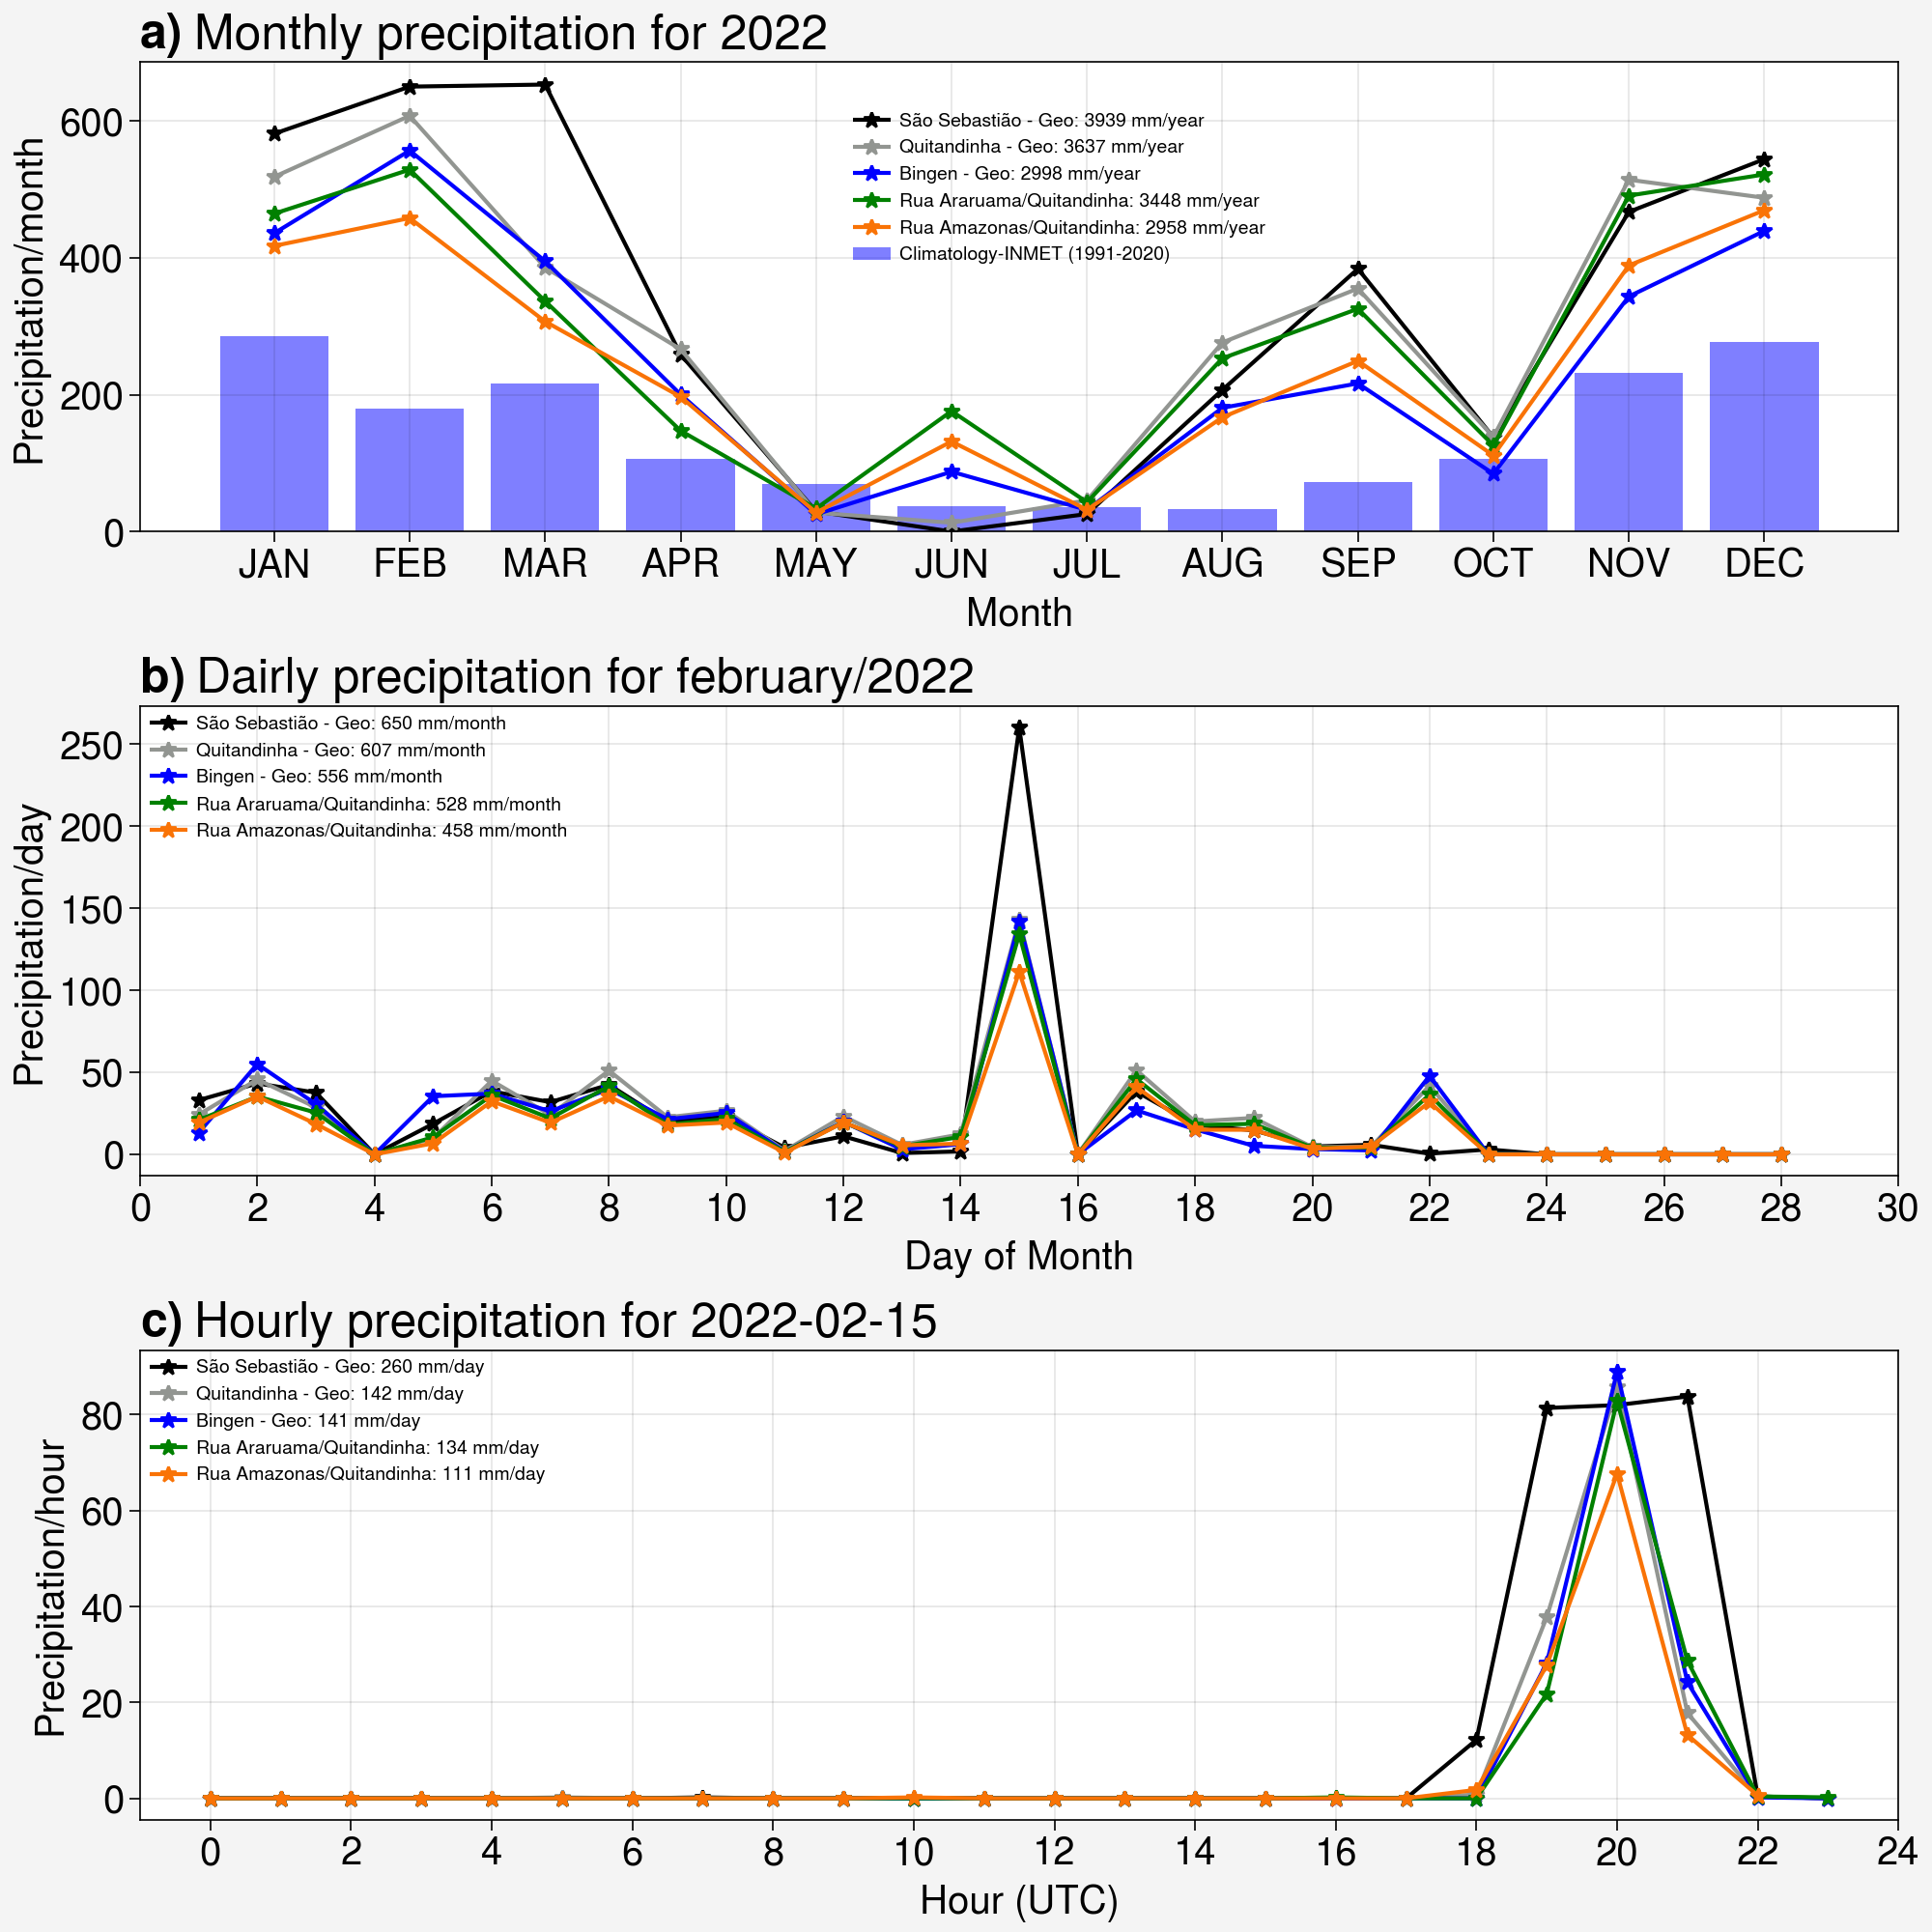

In [117]:
# cores das curvas das estações no gráfico
cor = ['black', 'gray', 'blue', 'green', 'orange', 'red', 'magenta']

# cria moldura da figura
fig, ax = plot.subplots(figsize=(10, 10), ncols=1, nrows=3, sharey=False, sharex=False, tight=True)

# formatação dos eixos X e Y
ax.format(abc=True,
          abcstyle='a)',
          abcsize=5,
          small='20px',
          large='25px',
          xticks=2,
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

#=====================================================================================================================#
#                                                1) MENSAL
#=====================================================================================================================#
# gráfico de barras da normal climatológica
ax[0].bar(plot.arange(1, 12, 1), df_normal_merge_near2.T.values, color='blue', alpha=0.5, label='Climatology-INMET (1991-2020)')

# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df_2022[ df_2022['nome_estacao'] == estacao]

    # faz agrupamento
    df_agrupado = df_estacao['chuva'].groupby(pd.Grouper(freq='1M')).sum()

    # total de chuva para o mês todo para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[0].plot(df_agrupado.index.month,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/year')

# formatações
ax[0].format(ltitle='Monthly precipitation for 2022',
             xlabel='Month',
             ylabel='Precipitation/month',
             xticklabels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
             xticks=plot.arange(1, 12, 1),
             xtickminor=False,
             ytickminor=False)

# legenda
ax[0].legend(bbox_to_anchor=(0.4, 0.55), ncols=1, frameon=False, prop={'size':7})

#=====================================================================================================================#
#                                                2) DIÁRIA
#=====================================================================================================================#
# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df[ df['nome_estacao'] == estacao]

    # faz agrupamento
    df_agrupado = df_estacao['chuva'].groupby(pd.Grouper(freq='1D')).sum()

    # total de chuva para o mês todo para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[1].plot(df_agrupado.index.day,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/month')

# legenda
ax[1].legend(loc='ul', ncols=1, frameon=False, prop={'size':7})

# formatação dos eixos
# xticklabels=hormin,
# xticks=plot.arange(1,len(hormin),1),
# xlim=(0,len(hormin)+1 ))

ax[1].format(ltitle='Dairly precipitation for february/2022',
             ylabel='Precipitation/day',
             xlabel='Day of Month',
             xrotation=0,
             xlim=(0,30))

#=====================================================================================================================#
#                                                3) HORÁRIA
#=====================================================================================================================#
# loop das estações escolhidas
for i, estacao in enumerate(nome_estacoes_escolhidas2):

    # tabela daquela estação
    df_estacao = df[ df['nome_estacao'] == estacao]

    # extrai os dados para o dia 15/fev
    df15 = df_estacao [ df_estacao.index.day == 15]

    # faz agrupamento
    df_agrupado = df15['chuva'].groupby(pd.Grouper(freq='1H')).sum()

    # total de chuva para o dia 15 para uma determinada estação
    tot_chuva = df_agrupado.sum()

    # plota gráfico
    ax[2].plot(df_agrupado.index.hour,
               df_agrupado.values,
               color=cor[i],
               marker='*',
               label=f'{estacao}: {int(tot_chuva)} mm/day')

# legenda
ax[2].legend(loc='ul', ncols=1, frameon=False, prop={'size':7})

# formatação dos eixos
ax[2].format(ltitle='Hourly precipitation for 2022-02-15',
             ylabel='Precipitation/hour',
             xlabel='Hour (UTC)',
             xlim=(-1,24))
#-----------------------------------#

# salva figura
fig.save(f'{dir}output/5_chuvapor_mes_dia_hora/Fig7_chuvapor_mes_dia_hora_climatologia.jpg', dpi=300)

# exibe na tela
plot.show()